In [583]:
import matplotlib.pyplot as plt
from scipy import stats
from __future__ import division
import datetime as dt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import svm, linear_model, datasets
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [584]:
def num_counts(data):      
    #Filter categorical variables
    numerical_columns = [x for x in data.dtypes.index if data.dtypes[x]<>'object']
    #Print frequency of categories
    for col in numerical_columns:
        print '\nContinuous or discrete for varible %s'%col
        print data[col].value_counts(10)

In [585]:
def cat_freq(data):      
    #Filter categorical variables
    categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']
    #Print frequency of categories
    for col in categorical_columns:
        print '\nFrequency of Categories for varible %s'%col
        print data[col].value_counts()

In [586]:
def num_skew(data):      
    #Filter numerical variables
    numerical_columns = [ x for x in data.dtypes.index if data.dtypes[x]<>'object']
    #categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']
    #Print frequency of categories
    for col in numerical_columns:   
        print '\nSkew for varible %s'%col
        print data[col].skew()

In [587]:
## Percentage of nulls per total on each column
def df_null_percent(df):
    print 'shape: %d rows, %d cols\n' % df.shape
    total = df.shape[0]
    print 'column info:'
    for col in df.columns:
        total_null = df[col].isnull().sum()
        percent_null = (float(total_null)/total) * 100.0
        print '* %s: %d nulls, %d percent nulls' % (col, total_null,percent_null)      
        if(percent_null > 35.0):
            print 'converting column'
            df[col].fillna(0,inplace=True)
            df[col] = df[col].map(lambda x: 1 if x <> 0 else 0)
    print '\n------\n'

In [588]:
## Number of nulls, distinct values, and counts per column
def df_counts(df):
    print 'shape: %d rows, %d cols\n' % df.shape 
    print 'column info:'
    for col in df.columns:
        print '* %s: %d nulls, %d unique vals, most common: %s' % (
            col, 
            df[col].isnull().sum(),
            df[col].nunique(),
            df[col].value_counts().head(2).to_dict()
            
        )
    print '\n------\n'## Number of nulls, distinct values, and counts per column


In [589]:
import timeit
start_time = timeit.default_timer()
######## INSERT YOUR PIECE OF CODE THAT YOU WANT TO TIME ######
print('Overall Time to run was: %0.2f seconds' %(timeit.default_timer() - start_time))

Overall Time to run was: 0.00 seconds


In [590]:
cat_cols = ['C1', 'C2', 'C3', 'C4', 'C5',
       'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22','C23',
       'C24', 'C25', 'C26']

In [591]:
int_cols = ["I1","I2","I3","I4","I5","I6","I7","I8","I9","I10","I11","I12","I13"]

In [637]:
int_cols9 = ["I1","I2","I3","I4","I5","I6","I7","I8","I10","I11","I12","I13"]

In [592]:
## I am loading 7 million records from day 21 of the criteo data.

In [593]:
start_time = timeit.default_timer()

In [594]:
day_21 = pd.read_csv('day_21.tsv', header = None, encoding = 'utf-8', sep = "\t", index_col = None, nrows =7000000,names = ["Label","I1","I2","I3","I4","I5","I6","I7","I8","I9","I10","I11","I12","I13","C1","C2","C3","C4","C5","C6","C7","C8","C9","C10","C11","C12","C13","C14","C15","C16","C17","C18","C19","C20","C21","C22","C23","C24","C25","C26"])

In [595]:
print('Overall Time to run was: %0.2f seconds' %(timeit.default_timer() - start_time))

Overall Time to run was: 110.39 seconds


In [596]:
## Overall Time was 104.88 seconds which is 1 min and 45 secounds
## Overall Time: 159.15, 143.84

In [597]:
day_21.Label.value_counts()

0    6776418
1     223582
Name: Label, dtype: int64

In [598]:
## I can see the data is unbalanced. So many more 0's than 1's. 

In [599]:
## Lets do a quick histogram on 'Label'

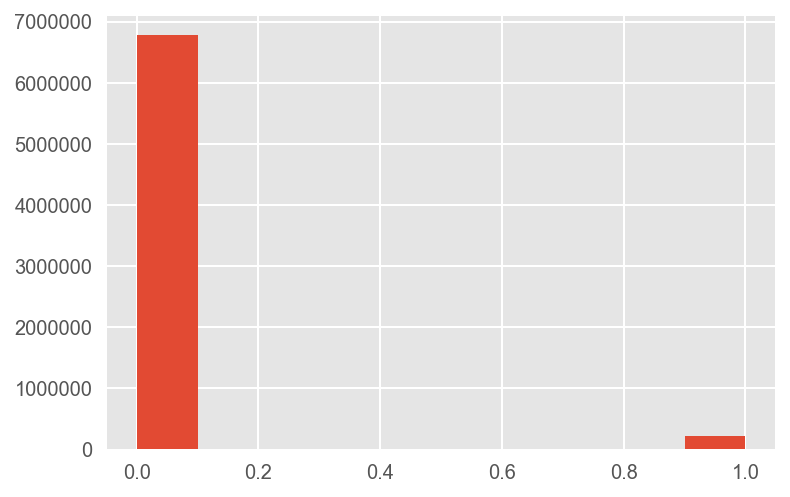

In [600]:
day_21.Label.hist()

In [601]:
## From the data description, lets look at the data types. We are expecting to find 13 numerical
## columns with count data and 26 columns of hashed categorical columns along with a column
## containing click (1) and no click (0) in a column called 'Label'

In [602]:
day_21.dtypes

Label      int64
I1       float64
I2       float64
I3       float64
I4       float64
I5       float64
I6       float64
I7       float64
I8         int64
I9         int64
I10      float64
I11      float64
I12      float64
I13      float64
C1        object
C2        object
C3        object
C4        object
C5        object
C6        object
C7        object
C8        object
C9        object
C10       object
C11       object
C12       object
C13       object
C14       object
C15       object
C16       object
C17       object
C18       object
C19       object
C20       object
C21       object
C22       object
C23       object
C24       object
C25       object
C26       object
dtype: object

In [603]:
## Ok, This looks as expected. Lets look at the numerical columns.  

In [490]:
num_counts(day_21)


Continuous or discrete for varible Label
0    0.96806
1    0.03194
Name: Label, dtype: float64

Continuous or discrete for varible I1
1.0       1.396027e-01
2.0       9.570459e-02
3.0       7.382239e-02
4.0       5.890067e-02
5.0       4.963000e-02
6.0       4.115050e-02
7.0       3.602000e-02
8.0       3.108972e-02
9.0       2.766679e-02
10.0      2.454208e-02
11.0      2.200566e-02
12.0      1.950391e-02
13.0      1.834554e-02
14.0      1.656084e-02
15.0      1.501175e-02
16.0      1.414046e-02
17.0      1.308945e-02
18.0      1.206109e-02
19.0      1.141265e-02
20.0      1.055816e-02
21.0      9.852773e-03
22.0      9.267309e-03
23.0      8.661150e-03
24.0      8.097796e-03
25.0      7.716802e-03
26.0      7.270010e-03
27.0      7.100208e-03
28.0      6.741147e-03
29.0      6.339813e-03
30.0      5.971377e-03
              ...     
4804.0    1.768773e-07
4805.0    1.768773e-07
4808.0    1.768773e-07
4809.0    1.768773e-07
4811.0    1.768773e-07
4812.0    1.768773e-07
4813.0    1.76

In [491]:
## There are definitely buckets of similiar values. Many of the top counts are a huge percentage
## of the data. Lets take a look at nulls, unique values and most common

In [492]:
df_counts(day_21)

shape: 7000000 rows, 40 cols

column info:
* Label: 0 nulls, 2 unique vals, most common: {0: 6776418, 1: 223582}
* I1: 1346363 nulls, 5558 unique vals, most common: {1.0: 789263, 2.0: 541079}
* I2: 687115 nulls, 7566 unique vals, most common: {1.0: 74535, 2.0: 59918}
* I3: 1849897 nulls, 350 unique vals, most common: {1.0: 942798, 2.0: 701312}
* I4: 2875415 nulls, 12581 unique vals, most common: {0.0: 222530, 1.0: 125117}
* I5: 2798897 nulls, 2152 unique vals, most common: {1.0: 729454, 2.0: 495629}
* I6: 780460 nulls, 369 unique vals, most common: {0.0: 4752736, 1.0: 476493}
* I7: 240762 nulls, 214 unique vals, most common: {0.0: 6384893, 1.0: 230916}
* I8: 0 nulls, 5839 unique vals, most common: {0: 1286188, 1: 905513}
* I9: 0 nulls, 126 unique vals, most common: {0: 1666709, 1: 671717}
* I10: 780460 nulls, 12 unique vals, most common: {0.0: 4921328, 1.0: 1125033}
* I11: 2798897 nulls, 170 unique vals, most common: {1.0: 1789481, 2.0: 788342}
* I12: 70901 nulls, 255842 unique vals, m

In [493]:
## With discrete numerical variables I will look at binning and other relationships. ## There are 
## some categorial columns with high number of nulls.

In [494]:
### I'm going to collect my data and oversample the Label feature so the model can learn better.

In [495]:
### I'm also going to take a look at the categorical columns.

In [496]:
## Examining the unique values and their length for patterns
for i in cat_cols:
    length = len(day_21[i].unique())
    if length < 100:
        print 'Length: ', length
        print 'Integer Column: ',i
        #print day_21[i].unique()
        print
        print '####################'
        print
    elif length > 99 & length <500:
        print 'Length:', length
        print 'Integer Column: ',i
        #print day_21[i].unique()
        print
        print '####################'
        print
    

Length: 1011445
Integer Column:  C1

####################

Length: 19772
Integer Column:  C2

####################

Length: 13650
Integer Column:  C3

####################

Length: 6944
Integer Column:  C4

####################

Length: 18729
Integer Column:  C5

####################

Length:  3
Integer Column:  C6

####################

Length: 6527
Integer Column:  C7

####################

Length: 1248
Integer Column:  C8

####################

Length:  48
Integer Column:  C9

####################

Length: 704153
Integer Column:  C10

####################

Length: 116672
Integer Column:  C11

####################

Length: 71012
Integer Column:  C12

####################

Length:  10
Integer Column:  C13

####################

Length: 2154
Integer Column:  C14

####################

Length: 7563
Integer Column:  C15

####################

Length:  61
Integer Column:  C16

####################

Length:  4
Integer Column:  C17

####################

Length: 927
Integer Column:  C18

##

In [497]:
## Some categorical columns have many unique values (high dimentionality) and some have few.

In [604]:
day_21.shape

(7000000, 40)

In [605]:
## To oversample on the 1's I will pick out all the ones from the current dataset.

In [606]:
day_21_1 = day_21[day_21.Label == 1 ]
day_21_1.shape

(223582, 40)

In [607]:
# Save that dataset to df1
df1 = day_21_1

In [608]:
# Pick a random 200K from a million
import numpy as np
chosen_idx = np.random.choice(1000000, replace=False, size=200000)
df2 = day_21.iloc[chosen_idx]


In [609]:
df2.shape

(200000, 40)

In [610]:
## Taking a look at the unique values in the integer columns

In [505]:
for i in int_cols:
    length = len(df2[i].unique())
    if length < 100:
        print 'Length: ', length
        print 'Integer Column: ',i
        #print df2[i].unique()
        print
        print '####################'
        print
    elif length > 99 & length <500:
        print 'Length:', length
        print 'Integer Column: ',i
        #print df2[i].unique()
        print
        print '####################'
        print
    
    

Length: 1241
Integer Column:  I1

####################

Length: 4225
Integer Column:  I2

####################

Length: 138
Integer Column:  I3

####################

Length: 2907
Integer Column:  I4

####################

Length: 805
Integer Column:  I5

####################

Length: 166
Integer Column:  I6

####################

Length:  84
Integer Column:  I7

####################

Length: 3293
Integer Column:  I8

####################

Length:  61
Integer Column:  I9

####################

Length:  10
Integer Column:  I10

####################

Length: 126
Integer Column:  I11

####################

Length: 38665
Integer Column:  I12

####################

Length: 246
Integer Column:  I13

####################



In [611]:
## Another view of the data where we can see the numbers are clustered into buckets

In [612]:
df3 = pd.concat([df1,df2])

In [613]:
df3.shape

(423582, 40)

In [614]:
df3.to_csv('BDay.csv', index=False)

In [534]:
## Find number columns that are skewed
num_skew(df3)


Skew for varible I1
112.365244687

Skew for varible I10
2.14463148485

Skew for varible I11
4.79625359533

Skew for varible I12
9.58360012996

Skew for varible I13
14.5674115355

Skew for varible I2
4.57802147733

Skew for varible I3
5.07364148959

Skew for varible I4
60.1787204838

Skew for varible I5
14.3936236147

Skew for varible I6
14.7690816676

Skew for varible I7
52.2959737704

Skew for varible I8
6.67346289265

Skew for varible I9
1.77408249275

Skew for varible Label
-0.170797220751

Skew for varible new_feat
2.27029425743

Skew for varible new_feat2
3.95857535236

Skew for varible new_feat3
2.91880379079

Skew for varible new_feat4
3.74728720372

Skew for varible new_feat5
0.723539362515

Skew for varible new_feat6
31.8157916138


In [535]:
## Transforming Integer Data and columns with Outliers

In [536]:
df3.head()

C1       C10       C11       C12       C13       C14       C15  \
34        NaN       NaN       NaN  2dc365bb  00c5ffb7  e5141477  ee9113d4   
105  265366bf  e63d98b4  c939136f  7257c9f1  00c5ffb7       NaN  1de734ba   
161  21db0e63  7dc1d02d  b22df3c9  ba36fe21  f4fc3c5e       NaN  2bcd428b   
193  a484dc7a  eab715af  d19bd6bf  53b03139  d49eb1df       NaN  95718317   
231  794b20f2  920d5bc0  21bdccb4  ac7e4945  a77a4a56       NaN  a800d3e9   

          C16       C17       C18    ...      I7    I8  I9 Label new_feat  \
34   2d45f65c  1f7fc70b  3c328ca5    ...     0.0     4  19     1      NaN   
105       NaN       NaN  b8170bba    ...     0.0    22   2     1      NaN   
161       NaN       NaN  b8170bba    ...     0.0    -1   2     1      NaN   
193       NaN       NaN  7232d217    ...     1.0    12   5     1      NaN   
231       NaN       NaN  b8170bba    ...     0.0  2892  35     1      NaN   

    new_feat2 new_feat3 new_feat4 new_feat5 new_feat6  
34        NaN       NaN       NaN       NaN       NaN  
105       NaN       NaN       NaN       NaN       NaN  
161       NaN       NaN       NaN       NaN       NaN  
193       NaN       NaN       NaN       NaN       NaN  
231       NaN       NaN       NaN       NaN       NaN  

[5 rows x 46 columns]

In [537]:
df3.I1.value_counts()

1.0        55923
2.0        35830
3.0        26846
4.0        20751
5.0        17107
6.0        13946
7.0        12111
8.0        10251
9.0         9064
10.0        8079
11.0        6912
12.0        6230
13.0        5729
14.0        5109
15.0        4561
16.0        4229
17.0        3891
18.0        3575
19.0        3368
20.0        3161
21.0        2782
22.0        2694
23.0        2524
24.0        2349
25.0        2157
26.0        2138
27.0        2061
28.0        1932
29.0        1821
30.0        1637
           ...  
1443.0         1
1431.0         1
5757.0         1
5748.0         1
3895.0         1
4696.0         1
5862.0         1
733.0          1
1494.0         1
971.0          1
5958.0         1
3344.0         1
874.0          1
1486.0         1
767.0          1
47463.0        1
1483.0         1
973.0          1
2963.0         1
1060.0         1
2884.0         1
737.0          1
1588.0         1
4124.0         1
2943.0         1
1471.0         1
1732.0         1
5873.0        

In [538]:
df3.I7.value_counts()

0.0      381229
1.0       15234
2.0        4587
3.0        2028
4.0        1150
5.0         733
6.0         568
7.0         408
8.0         309
9.0         229
10.0        198
11.0        155
12.0        154
14.0        128
13.0        120
15.0         99
17.0         83
16.0         76
18.0         55
19.0         54
22.0         50
20.0         46
21.0         44
28.0         43
26.0         41
23.0         39
25.0         32
24.0         32
27.0         31
29.0         20
          ...  
133.0         1
288.0         1
145.0         1
172.0         1
153.0         1
158.0         1
452.0         1
100.0         1
128.0         1
111.0         1
110.0         1
109.0         1
80.0          1
148.0         1
214.0         1
213.0         1
422.0         1
105.0         1
78.0          1
99.0          1
97.0          1
98.0          1
63.0          1
178.0         1
130.0         1
177.0         1
87.0          1
165.0         1
123.0         1
182.0         1
Name: I7, dtype: int64

In [539]:
df3.I7_s = df3.I7

In [615]:
df3.shape

(423582, 40)

In [616]:
## Remove outliers

In [618]:
## Here I am capping and flooring using Tukey's method.
for i in int_cols:
    Q1 = df3[i].quantile(0.05)
    Q3 = df3[i].quantile(0.95)
    IQR = Q3 - Q1
    print ((df3[i] < (Q1 - 1.5 * IQR)) | (df3[i] > (Q3 + 1.5 * IQR))).sum()
    high_mask = (df3[i] > (Q3 + 1.5 * IQR))
    low_mask = (df3[i] < (Q1 - 1.5 * IQR))
    df3[i][high_mask] = (Q3 + 1.5 * IQR)
    df3[i][low_mask] = (Q1 - 1.5 * IQR)

0


/Users/marthawhite/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/marthawhite/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0
0
0
0
0
0
0
0
0
0
0
0


In [619]:
df3.I7.value_counts()

0.0    381158
1.0     15308
2.5      7369
2.0      4575
Name: I7, dtype: int64

In [620]:
#From the histogram there are a few integer predictors that are canidates to be binned. There distribution is distributed
#into three chunks quite nicely. Since I'll be using a Random Forest, binning in decision tree models works well.
#
df3['I9_bin'] = pd.qcut(df3['I9'], 3, labels=False)

In [621]:
df3.I9_bin.value_counts()

0    143683
1    141388
2    138511
Name: I9_bin, dtype: int64

In [622]:
df3 = df3.drop(['I9'],axis = 1)

In [623]:
df3.I9

AttributeError: 'DataFrame' object has no attribute 'I9'

In [624]:
df3['I0_bin'] = pd.qcut(df3['I10'], 3, labels=False)

ValueError: Bin edges must be unique: array([ 0.,  0.,  0.,  5.])

In [625]:
## Binning with qcut doesn't work. Lets take a look.

In [626]:
df3.I10.count()

372474

In [627]:
df3.I10.value_counts()

0.0    265040
1.0     88637
2.0     14769
3.0      3135
4.0       696
5.0       197
Name: I10, dtype: int64

In [628]:
## There are too many zeros to bin. I'll leave this as is.

In [629]:
## Percentage of nulls per total on each column
## We make boolean column if nulls above 35%
df_null_percent(df3)


shape: 423582 rows, 40 cols

column info:
* Label: 0 nulls, 0 percent nulls
* I1: 97812 nulls, 23 percent nulls
* I2: 43815 nulls, 10 percent nulls
* I3: 120459 nulls, 28 percent nulls
* I4: 142488 nulls, 33 percent nulls
* I5: 146676 nulls, 34 percent nulls
* I6: 51108 nulls, 12 percent nulls
* I7: 15172 nulls, 3 percent nulls
* I8: 0 nulls, 0 percent nulls
* I10: 51108 nulls, 12 percent nulls
* I11: 146676 nulls, 34 percent nulls
* I12: 4279 nulls, 1 percent nulls
* I13: 120459 nulls, 28 percent nulls
* C1: 15198 nulls, 3 percent nulls
* C2: 0 nulls, 0 percent nulls
* C3: 0 nulls, 0 percent nulls
* C4: 0 nulls, 0 percent nulls
* C5: 0 nulls, 0 percent nulls
* C6: 0 nulls, 0 percent nulls
* C7: 0 nulls, 0 percent nulls
* C8: 0 nulls, 0 percent nulls
* C9: 0 nulls, 0 percent nulls
* C10: 15198 nulls, 3 percent nulls
* C11: 15198 nulls, 3 percent nulls
* C12: 0 nulls, 0 percent nulls
* C13: 0 nulls, 0 percent nulls
* C14: 166413 nulls, 39 percent nulls
converting column
* C15: 0 nulls, 

In [630]:
## Examining I8 above. There is only one type of negative value: -1. I'm going to assume this 
## should be 0.

In [631]:
df3.I8 = df3.I8.apply(lambda x: 0 if x ==-1 else x)

In [638]:
## Use the mean of the column to impute/replace Nan
for i in int_cols9:
    df3[i].fillna((df3[i].mean()), inplace=True)

In [639]:
## Use None to replace categories with Nan
#for c in cat_cols:
#    df3[c].fillna('None',inplace=True)

In [640]:
#### Simply Mode replacing code
for column in ['C1', 'C2', 'C3', 'C4', 'C5','C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13',
       'C15', 'C18', 'C19', 'C20', 'C21', 'C22','C24', 'C25', 'C26']:
    df3[column].fillna(df3[column].mode()[0], inplace=True)

In [641]:
## Lets check out df for nulls

In [642]:
df3.isnull().sum()

Label     0
I1        0
I2        0
I3        0
I4        0
I5        0
I6        0
I7        0
I8        0
I10       0
I11       0
I12       0
I13       0
C1        0
C2        0
C3        0
C4        0
C5        0
C6        0
C7        0
C8        0
C9        0
C10       0
C11       0
C12       0
C13       0
C14       0
C15       0
C16       0
C17       0
C18       0
C19       0
C20       0
C21       0
C22       0
C23       0
C24       0
C25       0
C26       0
I9_bin    0
dtype: int64

In [643]:
## Lets check our data types

In [644]:
df3.dtypes

Label       int64
I1        float64
I2        float64
I3        float64
I4        float64
I5        float64
I6        float64
I7        float64
I8          int64
I10       float64
I11       float64
I12       float64
I13       float64
C1         object
C2         object
C3         object
C4         object
C5         object
C6         object
C7         object
C8         object
C9         object
C10        object
C11        object
C12        object
C13        object
C14         int64
C15        object
C16         int64
C17         int64
C18        object
C19        object
C20        object
C21        object
C22        object
C23         int64
C24        object
C25        object
C26        object
I9_bin      int64
dtype: object

In [645]:
df3.to_csv('BDay2.csv', index=False)

In [647]:
# log all I columns...Log I1-twice. See skew numbers
for num in [int_cols9]:
    df3[num]= np.log(df3[num]+1)

In [648]:
df3['I1'] = np.log(df3['I1']+1)

In [649]:
## ready to save and send for modeling.
df3.to_csv('day_21_E.csv', index=False)

In [650]:
## Lets check the percentage of 1's now on our sample
len(df3[df3.Label==1])/df3.shape[0]

0.5424781978459897

In [567]:
df3.I7.head()

34     0.000000
105    0.000000
161    0.000000
193    0.693147
231    0.000000
Name: I7, dtype: float64

In [568]:
df3.corr('spearman')

C14       C16       C17       C23        I1       I10  \
C14        1.000000  1.000000  1.000000  1.000000  0.186059 -0.031690   
C16        1.000000  1.000000  1.000000  1.000000  0.186059 -0.031690   
C17        1.000000  1.000000  1.000000  1.000000  0.186059 -0.031690   
C23        1.000000  1.000000  1.000000  1.000000  0.186059 -0.031690   
I1         0.186059  0.186059  0.186059  0.186059  1.000000  0.001066   
I10       -0.031690 -0.031690 -0.031690 -0.031690  0.001066  1.000000   
I11       -0.060294 -0.060294 -0.060294 -0.060294  0.000110  0.179065   
I12       -0.106385 -0.106385 -0.106385 -0.106385 -0.060503 -0.503433   
I13        0.050578  0.050578  0.050578  0.050578  0.313623 -0.069862   
I2        -0.104050 -0.104050 -0.104050 -0.104050  0.062267  0.019392   
I3         0.020714  0.020714  0.020714  0.020714  0.277819  0.089520   
I4        -0.055601 -0.055601 -0.055601 -0.055601  0.074026 -0.554545   
I5        -0.040902 -0.040902 -0.040902 -0.040902  0.006622  0.180963   
I6        -0.035568 -0.035568 -0.035568 -0.035568 -0.005866  0.902379   
I7        -0.015184 -0.015184 -0.015184 -0.015184 -0.011712  0.209417   
I8         0.128052  0.128052  0.128052  0.128052 -0.044250 -0.059768   
I9        -0.158851 -0.158851 -0.158851 -0.158851  0.025972  0.022537   
Label     -0.027831 -0.027831 -0.027831 -0.027831 -0.070169  0.171151   
new_feat   0.016833  0.016833  0.016833  0.016833  0.023602 -0.068593   
new_feat2  0.022222  0.022222  0.022222  0.022222  0.011686 -0.043412   
new_feat3  0.041210  0.041210  0.041210  0.041210  0.021092 -0.061250   
new_feat4 -0.008593 -0.008593 -0.008593 -0.008593  0.006591 -0.004915   
new_feat5  0.036933  0.036933  0.036933  0.036933  0.034842 -0.098456   
new_feat6 -0.003765 -0.003765 -0.003765 -0.003765  0.001167  0.040899   
I9_bin    -0.144999 -0.144999 -0.144999 -0.144999  0.027844  0.019762   

                I11       I12       I13        I2    ...           I8  \
C14       -0.060294 -0.106385  0.050578 -0.104050    ...     0.128052   
C16       -0.060294 -0.106385  0.050578 -0.104050    ...     0.128052   
C17       -0.060294 -0.106385  0.050578 -0.104050    ...     0.128052   
C23       -0.060294 -0.106385  0.050578 -0.104050    ...     0.128052   
I1         0.000110 -0.060503  0.313623  0.062267    ...    -0.044250   
I10        0.179065 -0.503433 -0.069862  0.019392    ...    -0.059768   
I11        1.000000 -0.239969 -0.030266  0.299405    ...    -0.005098   
I12       -0.239969  1.000000  0.101962 -0.137284    ...    -0.060227   
I13       -0.030266  0.101962  1.000000  0.059355    ...    -0.090700   
I2         0.299405 -0.137284  0.059355  1.000000    ...     0.035454   
I3         0.009332 -0.038543  0.829663  0.061916    ...    -0.120910   
I4        -0.051896  0.449585  0.219099  0.187369    ...     0.027687   
I5         0.846202 -0.228044 -0.026811  0.227573    ...    -0.001723   
I6         0.177368 -0.454688 -0.038579  0.007106    ...    -0.075135   
I7         0.132725 -0.106533  0.013051  0.016598    ...    -0.048023   
I8        -0.005098 -0.060227 -0.090700  0.035454    ...     1.000000   
I9         0.118707 -0.266051  0.170012  0.213798    ...    -0.013760   
Label      0.081504 -0.186246 -0.096401 -0.006402    ...    -0.009221   
new_feat  -0.108511  0.048928  0.007889 -0.030608    ...     0.015047   
new_feat2  0.019678  0.015962  0.019782  0.050803    ...     0.016617   
new_feat3 -0.012656  0.029482  0.022092  0.032226    ...     0.023529   
new_feat4  0.097794 -0.028768  0.019924  0.096625    ...     0.007560   
new_feat5 -0.091109  0.036912  0.042169  0.060537    ...     0.034791   
new_feat6  0.028297 -0.024023 -0.004826  0.013988    ...    -0.000563   
I9_bin     0.108235 -0.254525  0.173299  0.197854    ...    -0.013025   

                 I9     Label  new_feat  new_feat2  new_feat3  new_feat4  \
C14       -0.158851 -0.027831  0.016833   0.022222   0.041210  -0.008593   
C16       -0.158851 -0.027831  0.016833   0.022222   0.041210  -0.

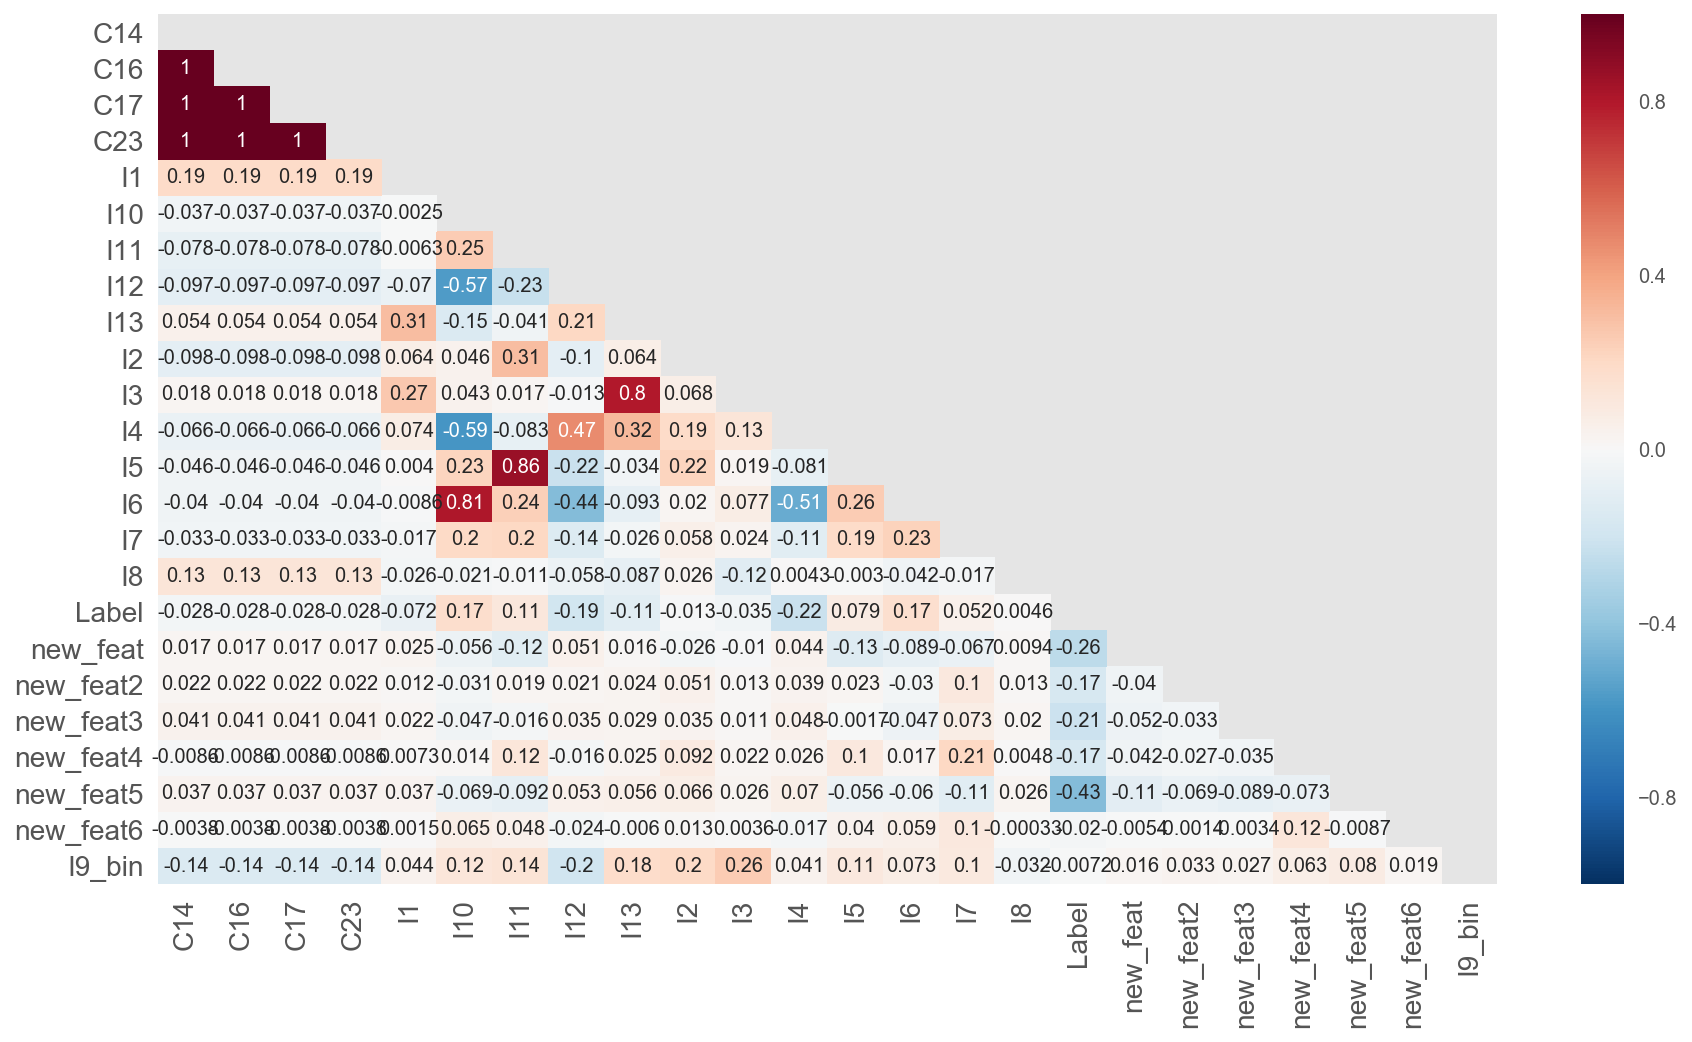

In [581]:
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(15,8))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=True)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()

correlation_heat_map(df3)

In [157]:
# make boolean: I4,I5,I11,C14,C16,C17,C23. Good: C6, C13, C17. Descrete 69% no value
# Impute: use spearment to correlate categories, use pearson for numbers.

In [582]:
for i in cat_cols:
    length = len(df3[i].unique())
    print 'Length: ', length
    print 'Integer Column: ',i
    #print df2[i].unique()
    print
    print '####################'
    print
    
    

Length:  26160
Integer Column:  C1

####################

Length:  5741
Integer Column:  C2

####################

Length:  6233
Integer Column:  C3

####################

Length:  2738
Integer Column:  C4

####################

Length:  6511
Integer Column:  C5

####################

Length:  3
Integer Column:  C6

####################

Length:  4051
Integer Column:  C7

####################

Length:  911
Integer Column:  C8

####################

Length:  28
Integer Column:  C9

####################

Length:  22044
Integer Column:  C10

####################

Length:  9096
Integer Column:  C11

####################

Length:  10842
Integer Column:  C12

####################

Length:  9
Integer Column:  C13

####################

Length:  2
Integer Column:  C14

####################

Length:  3082
Integer Column:  C15

####################

Length:  2
Integer Column:  C16

####################

Length:  2
Integer Column:  C17

####################

Length:  441
Integer Column:  C18

###

In [ ]:
##Scatter plots versus Label

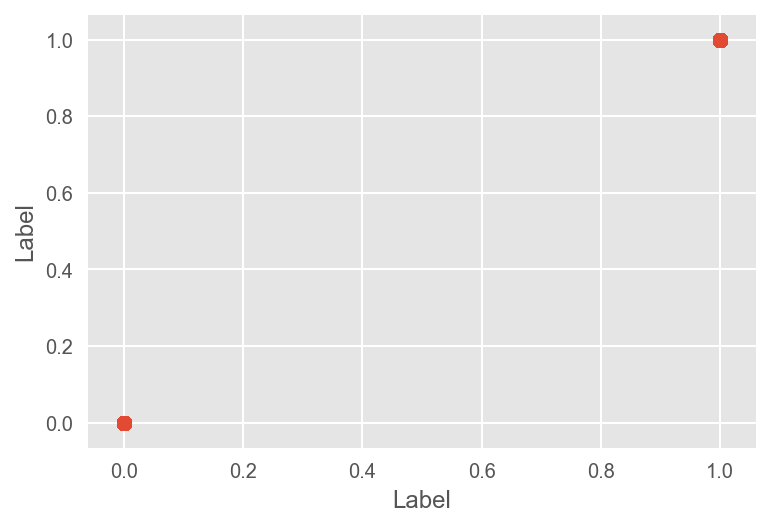

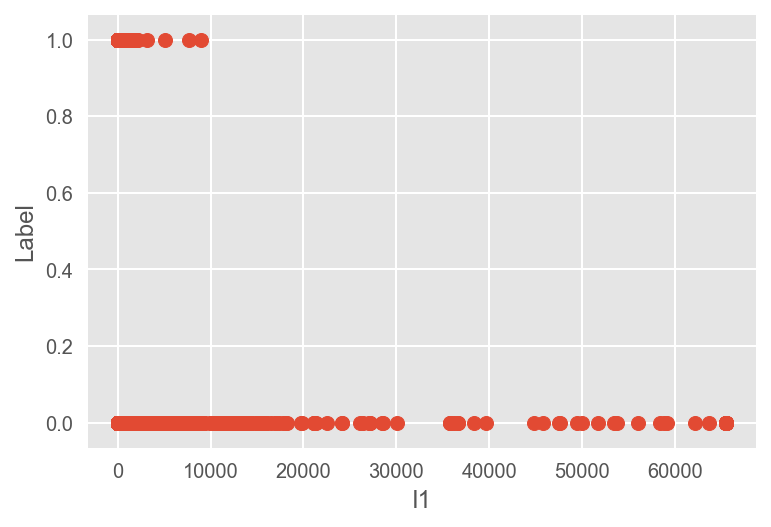

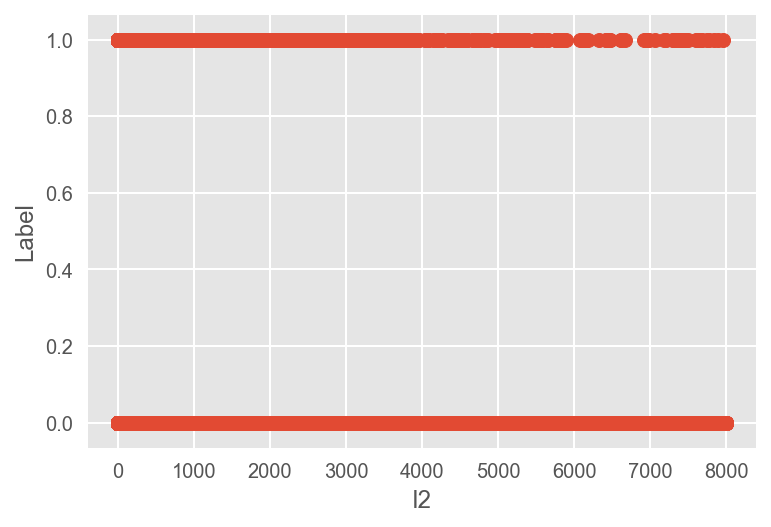

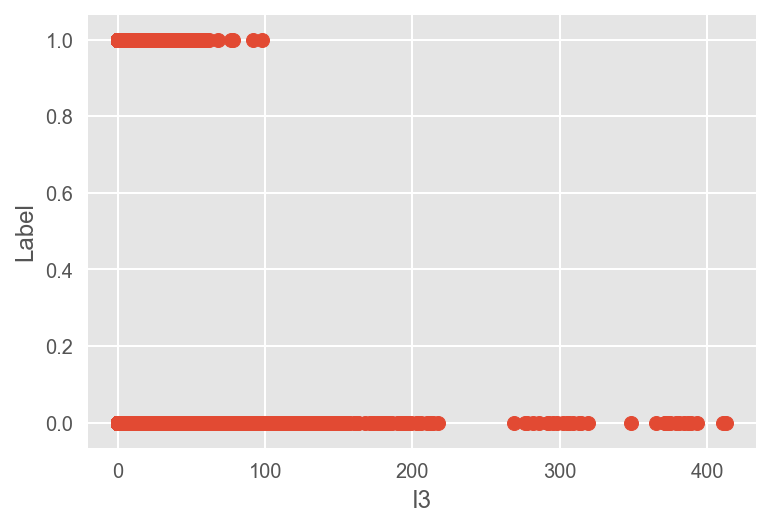

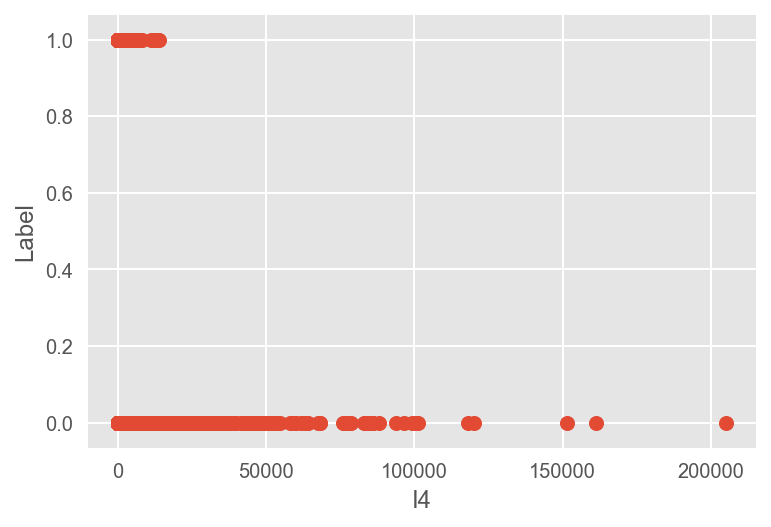

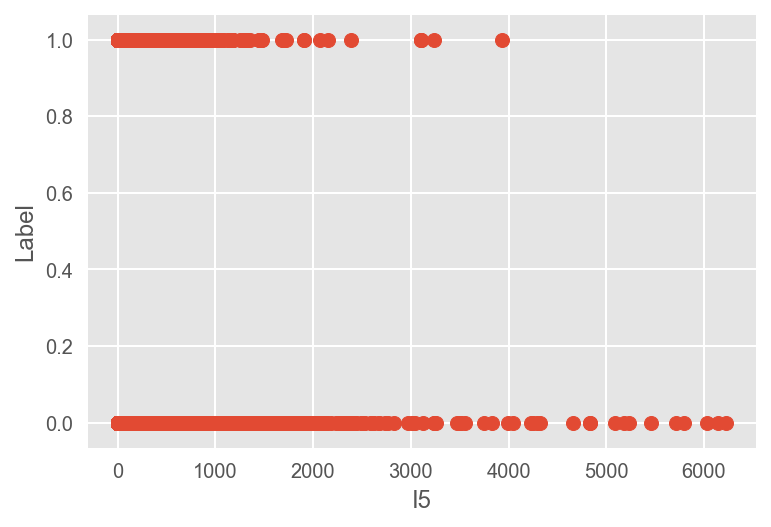

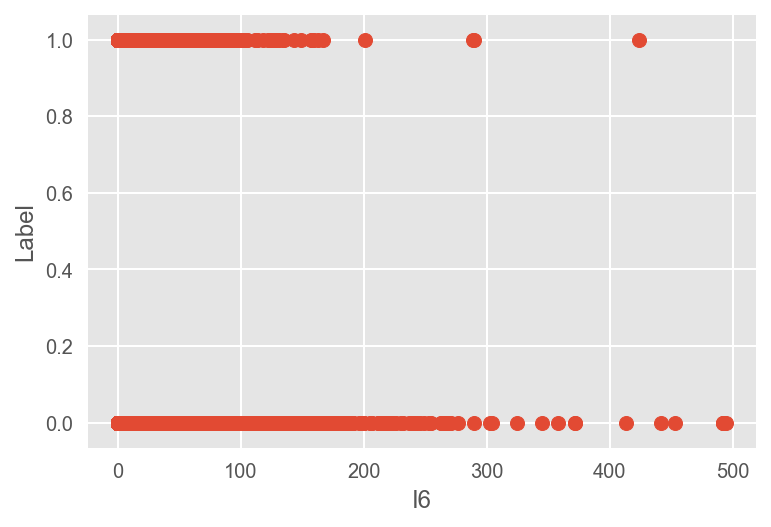

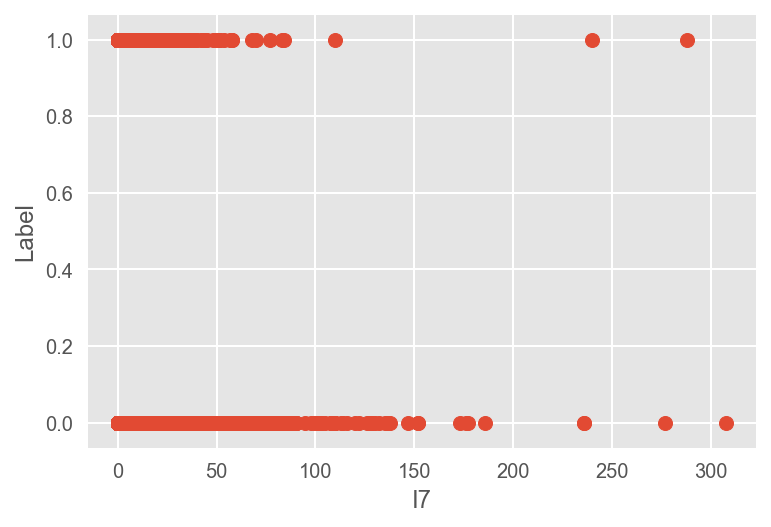

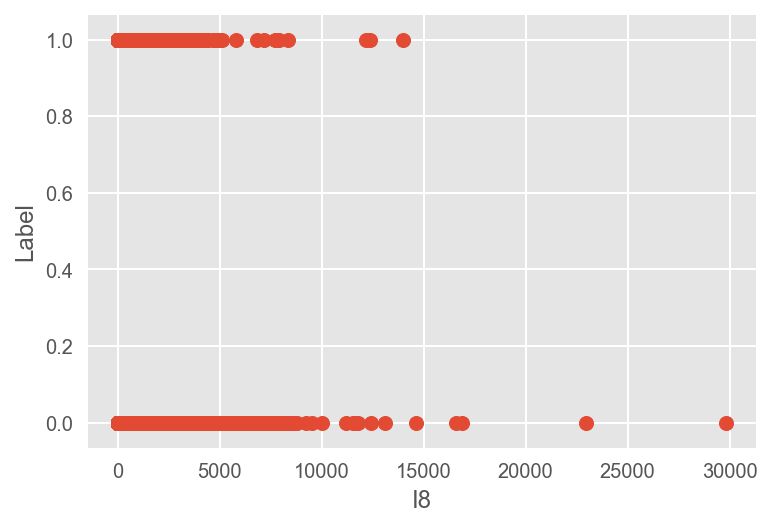

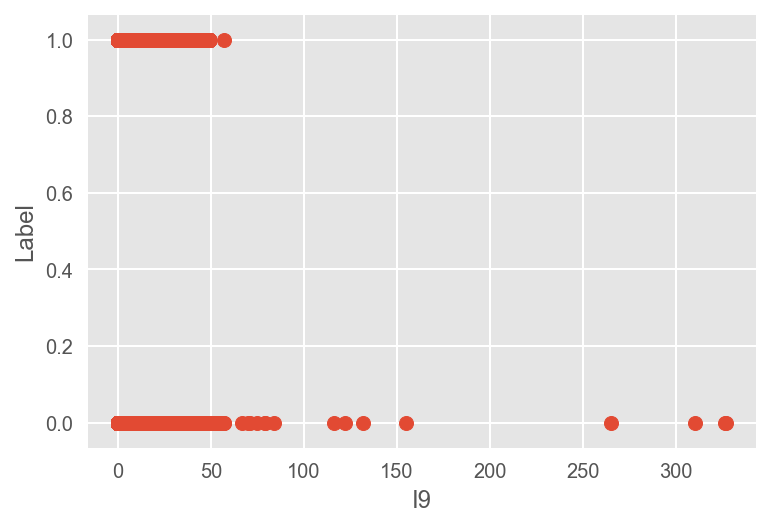

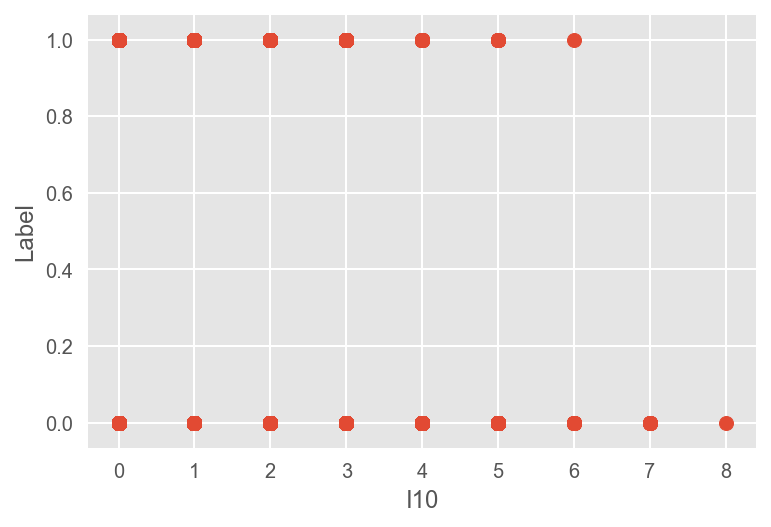

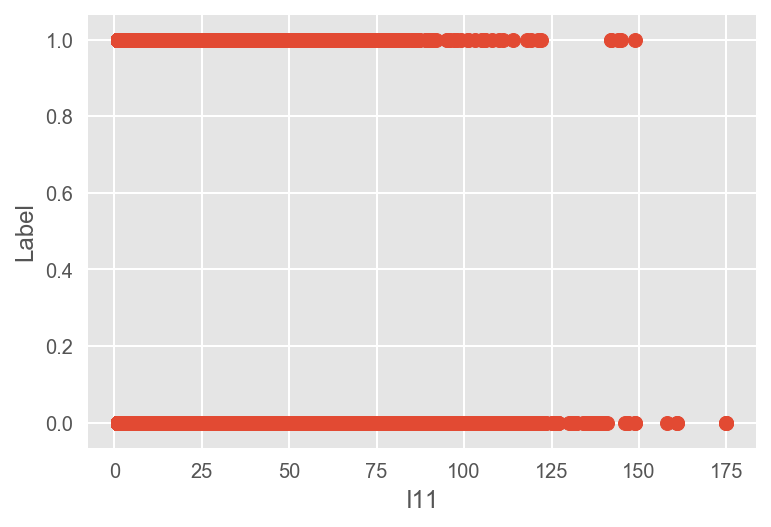

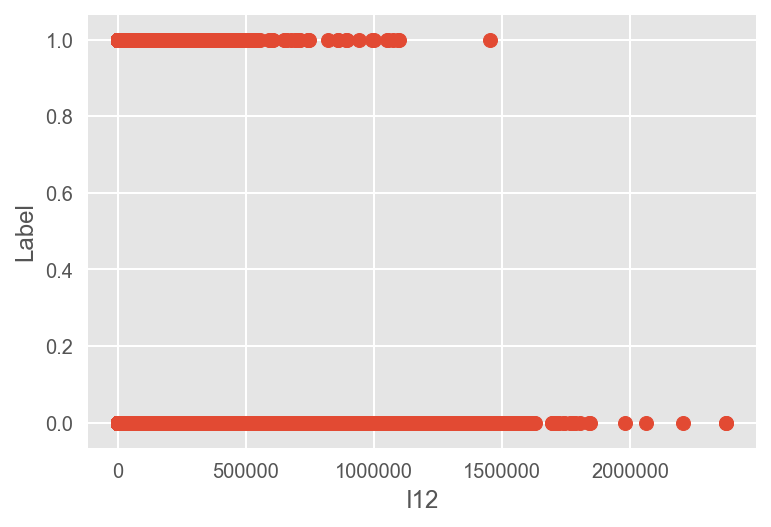

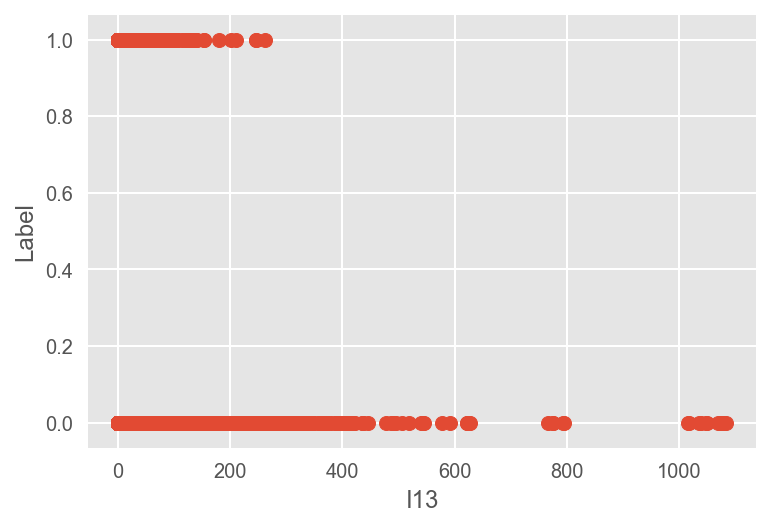

In [285]:
numerical_columns = [ x for x in day_21.dtypes.index if day_21.dtypes[x]<>'object']
for num in numerical_columns:
    plt.scatter(x=day_21[num], y=day_21.Label)
    plt.ylabel('Label')
    plt.xlabel(num)
    plt.show()

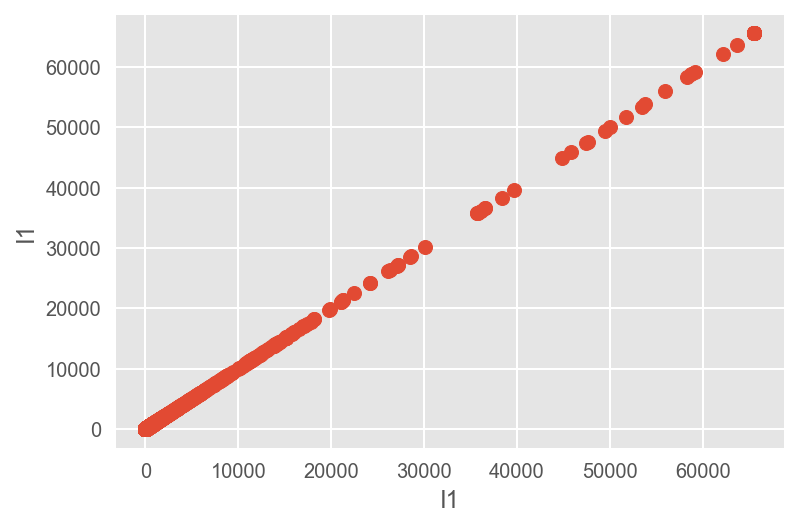

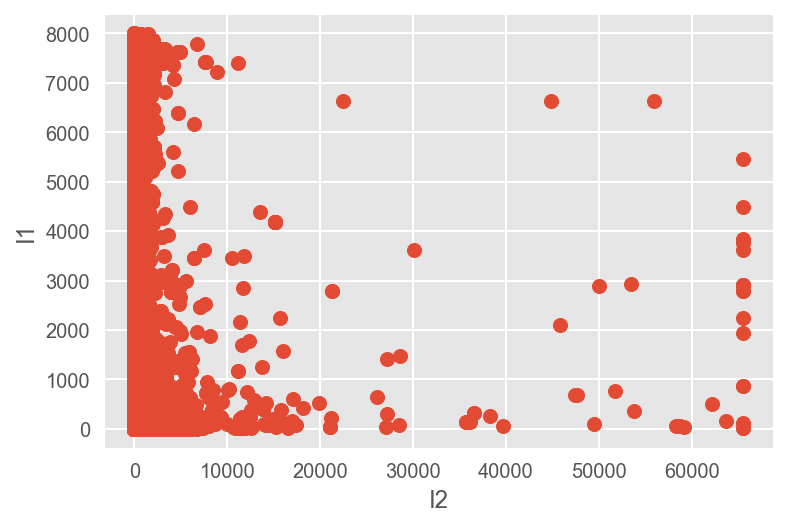

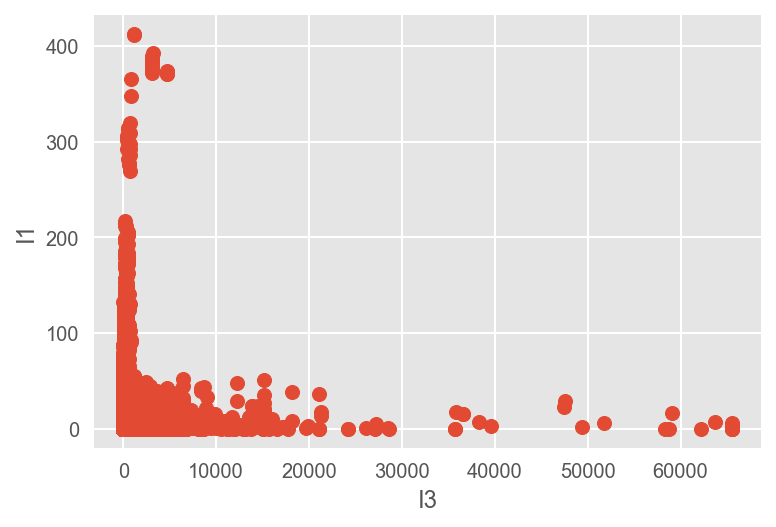

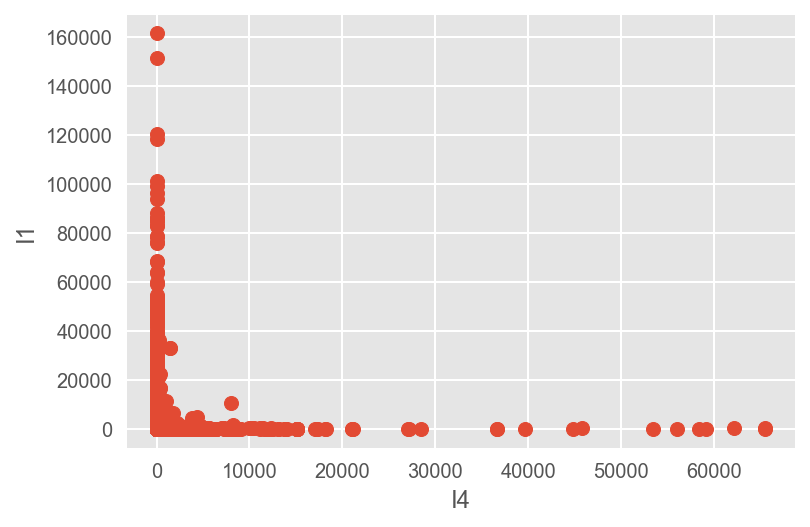

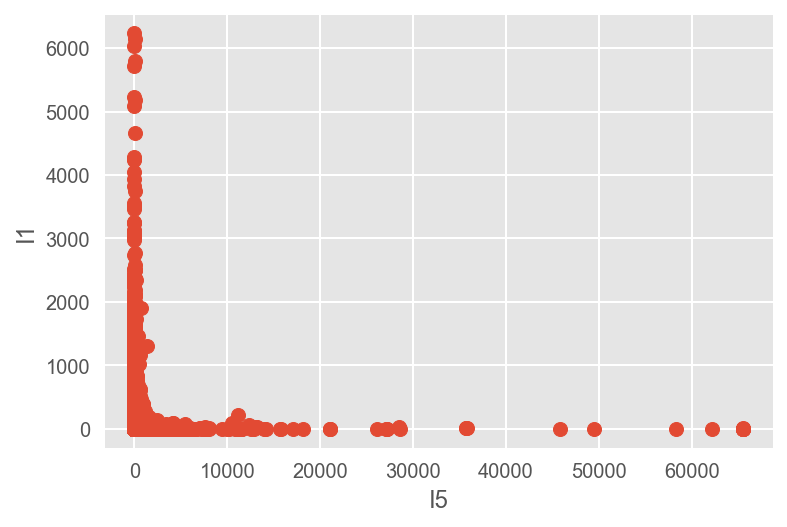

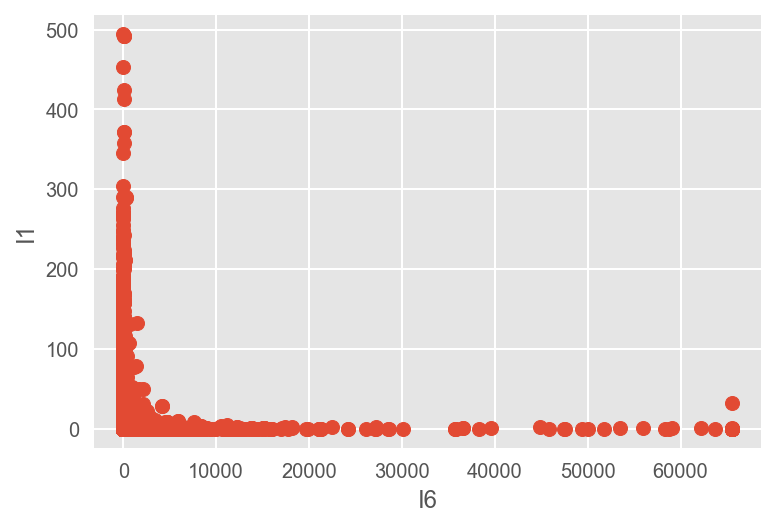

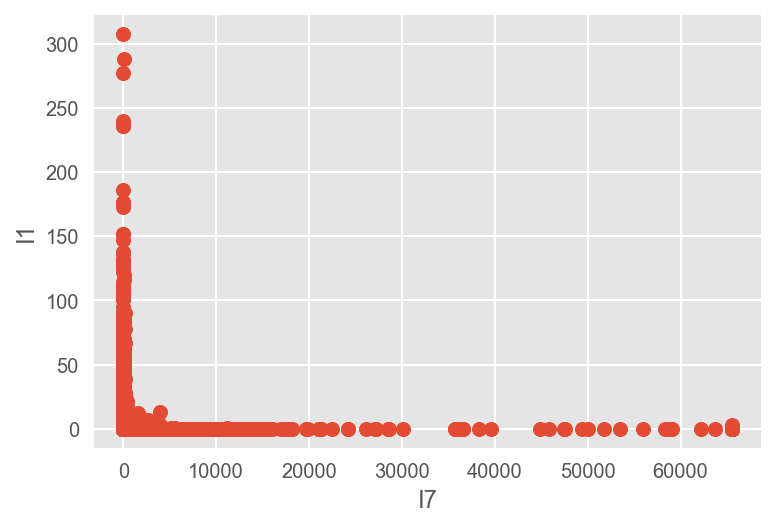

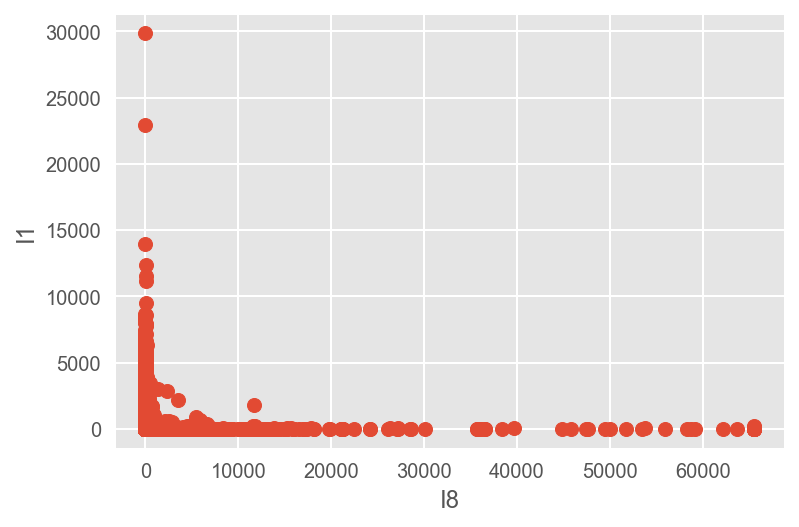

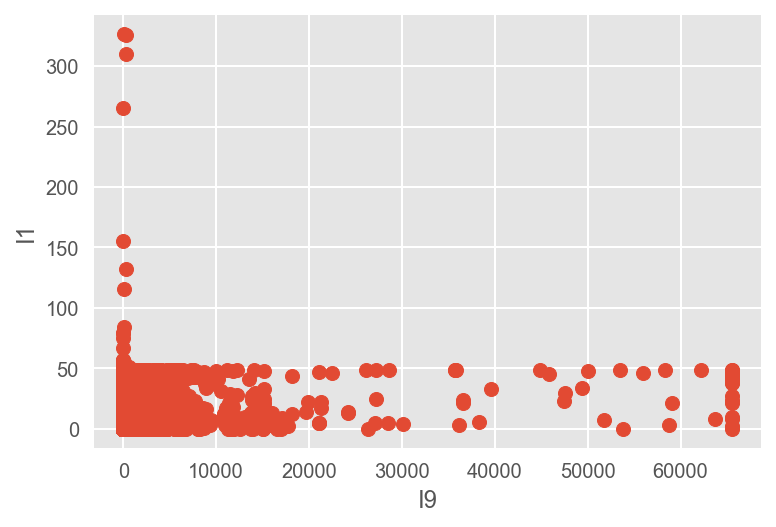

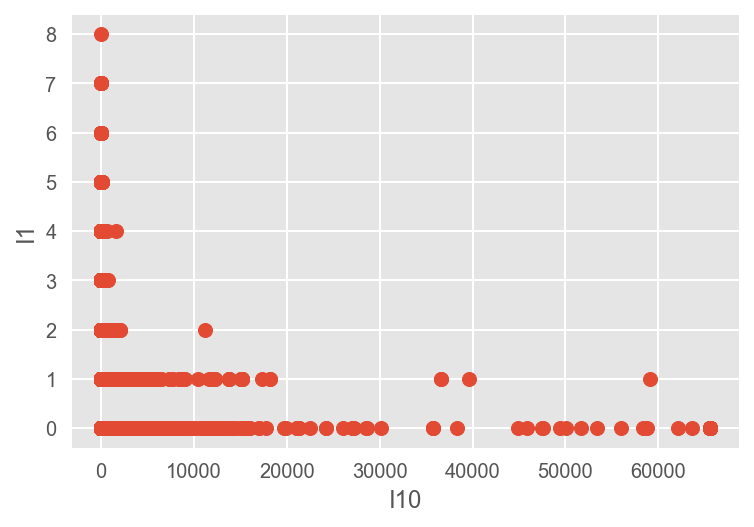

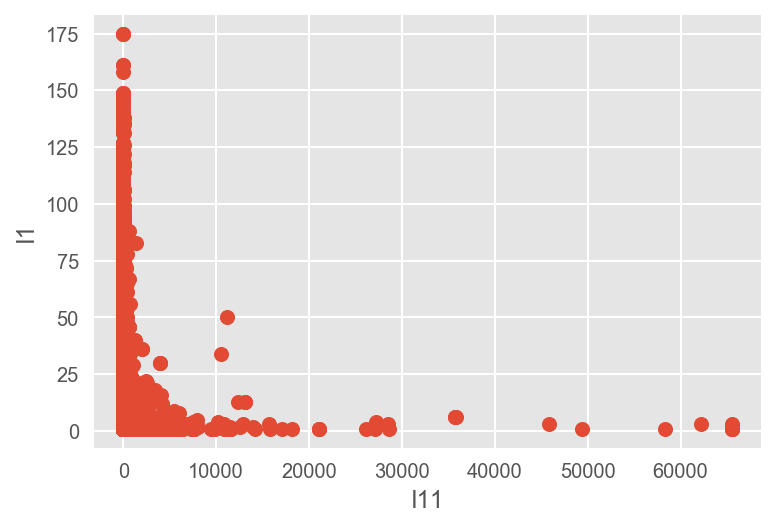

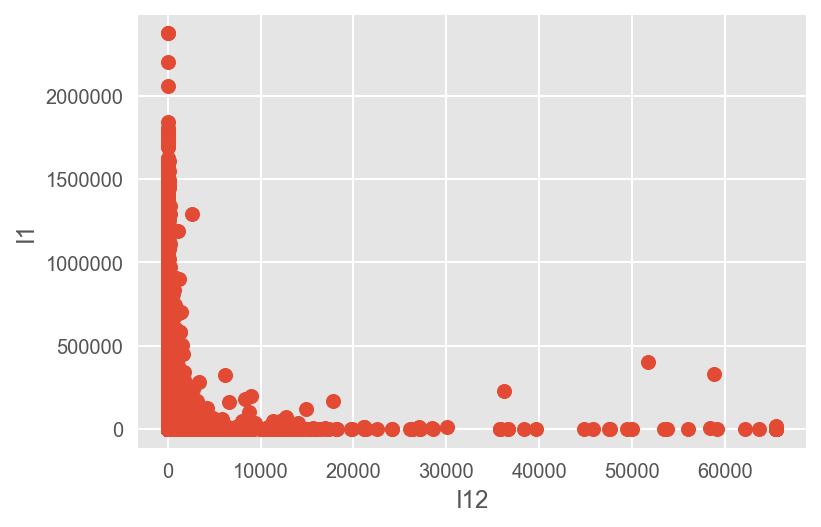

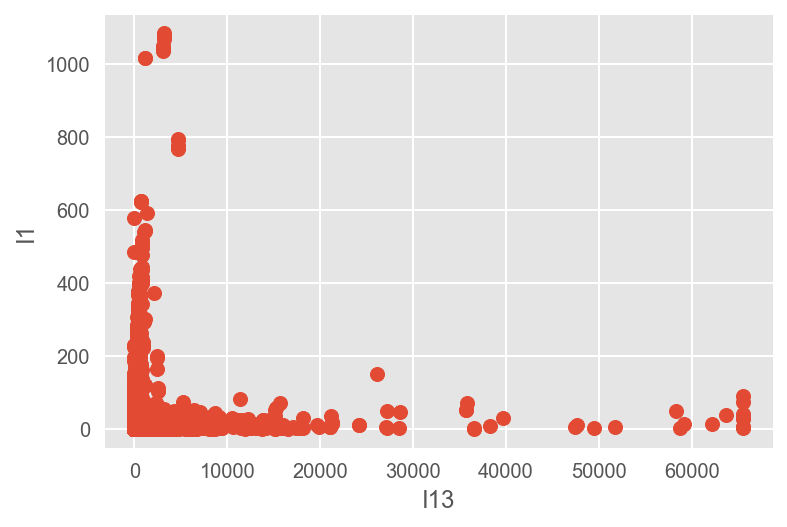

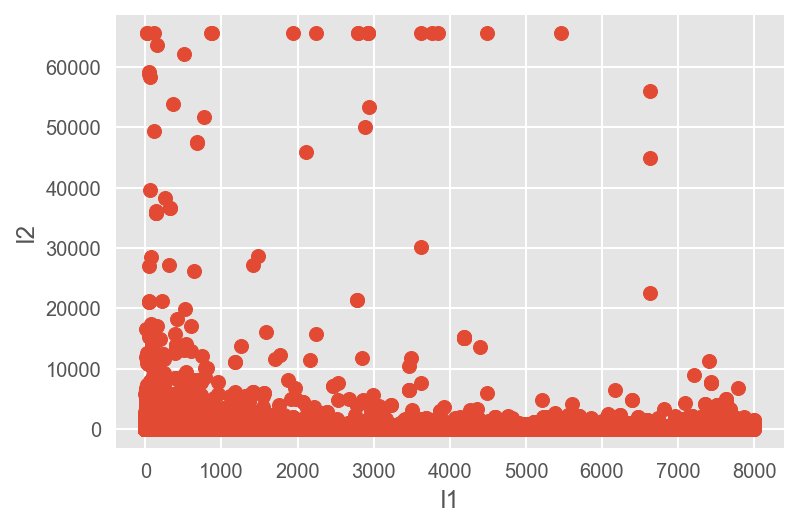

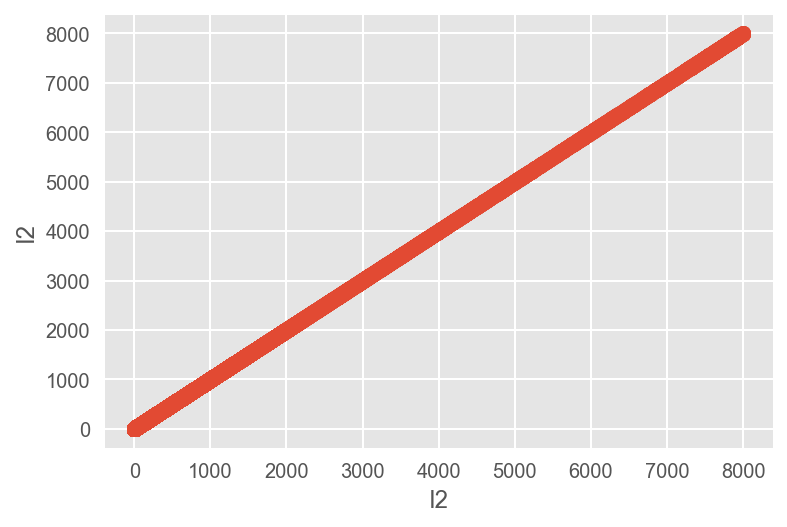

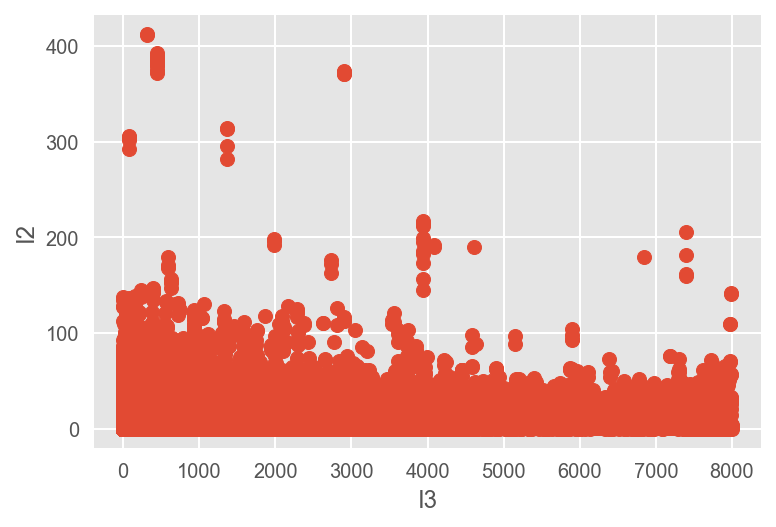

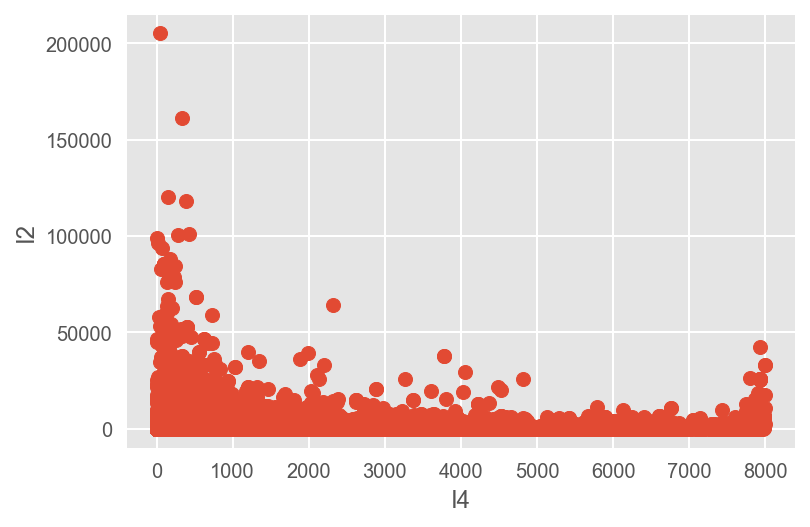

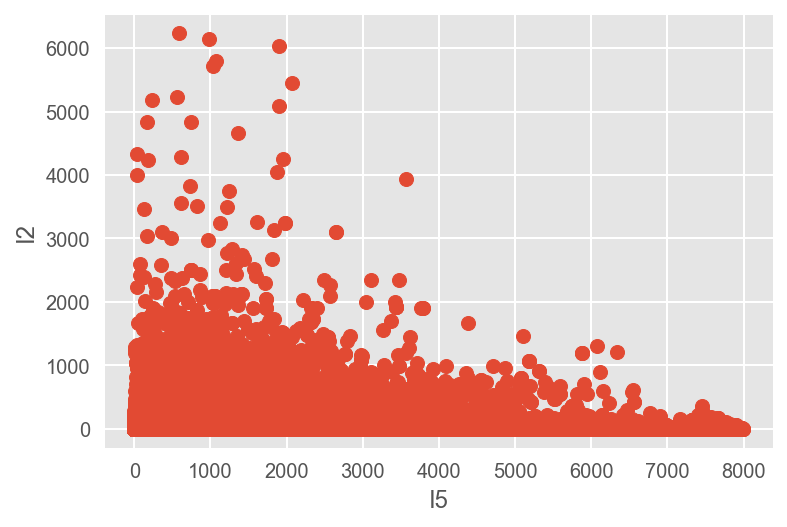

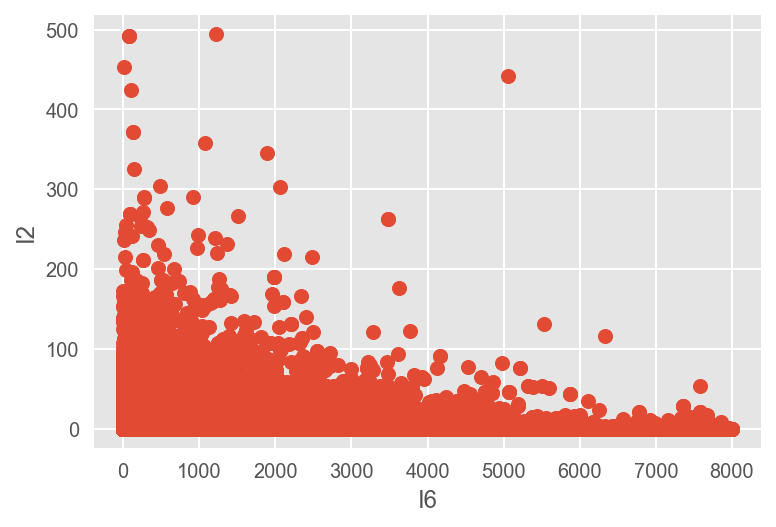

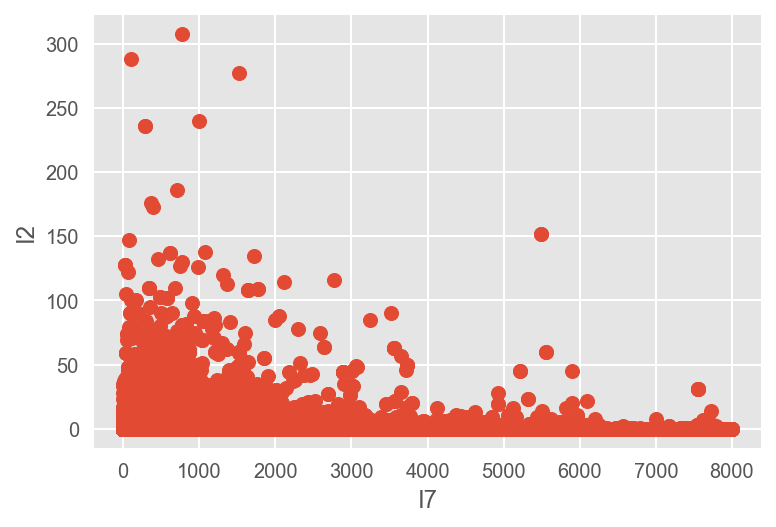

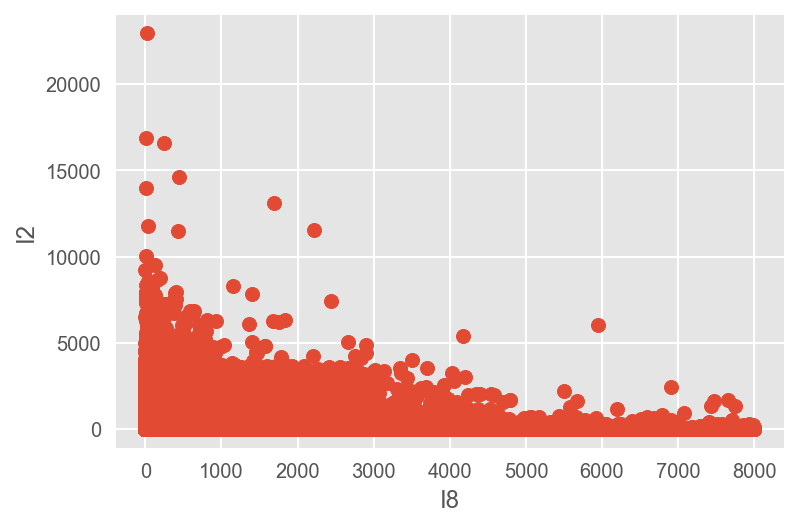

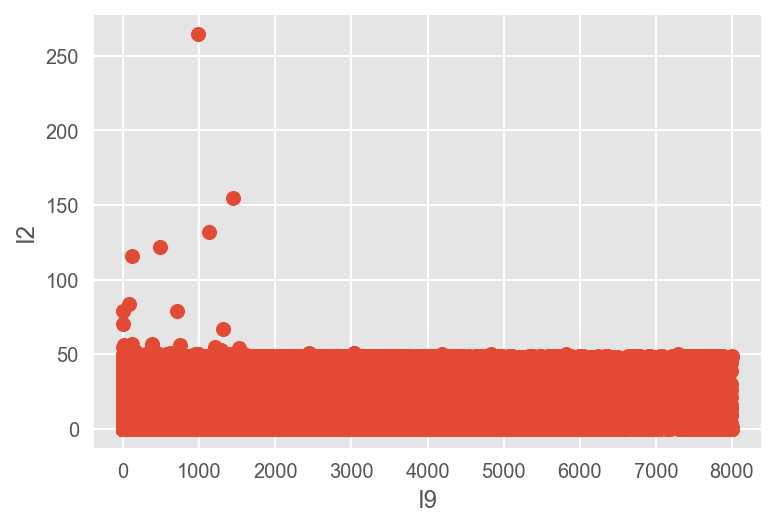

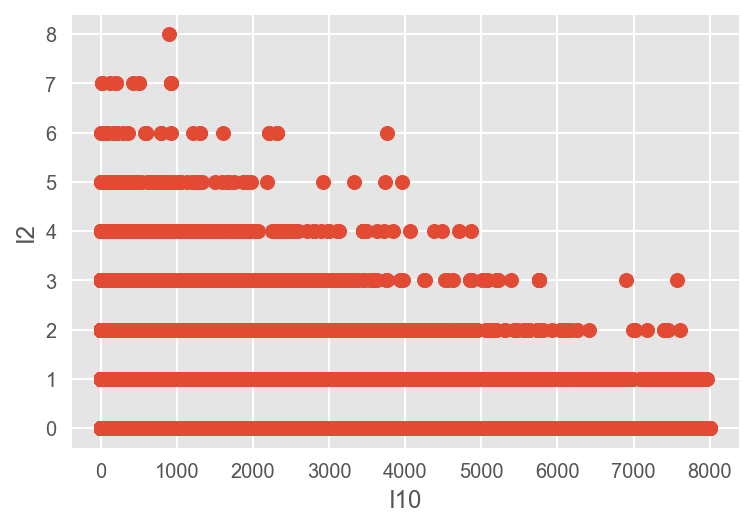

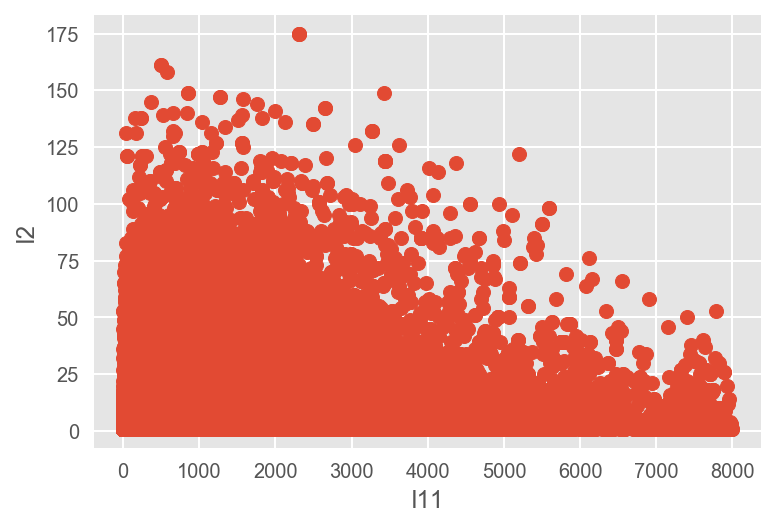

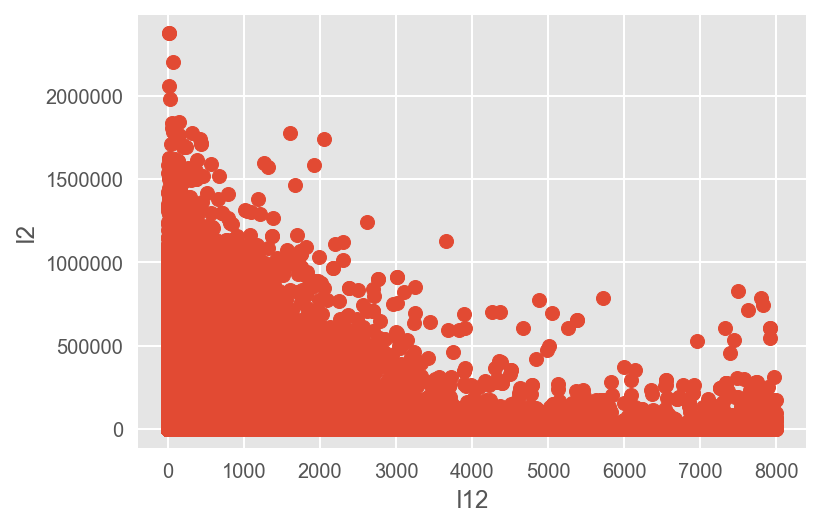

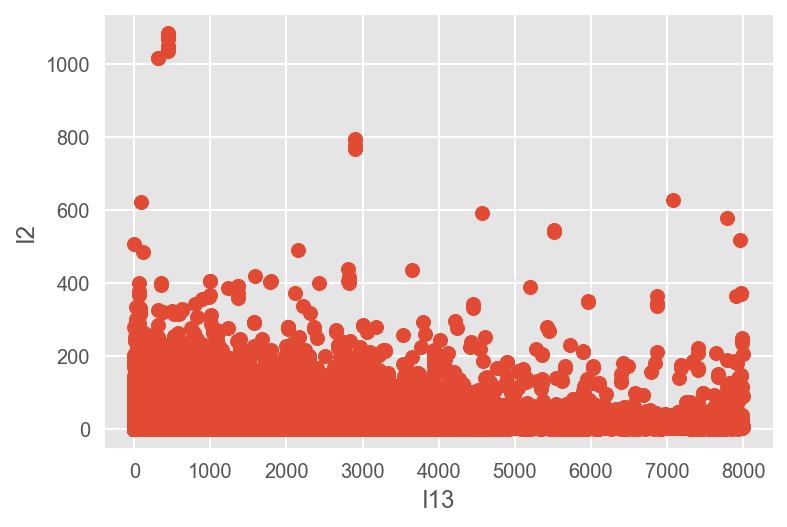

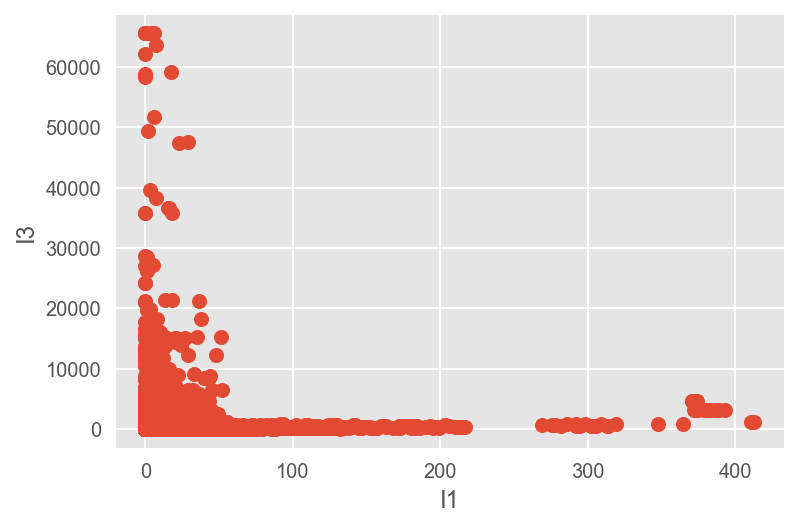

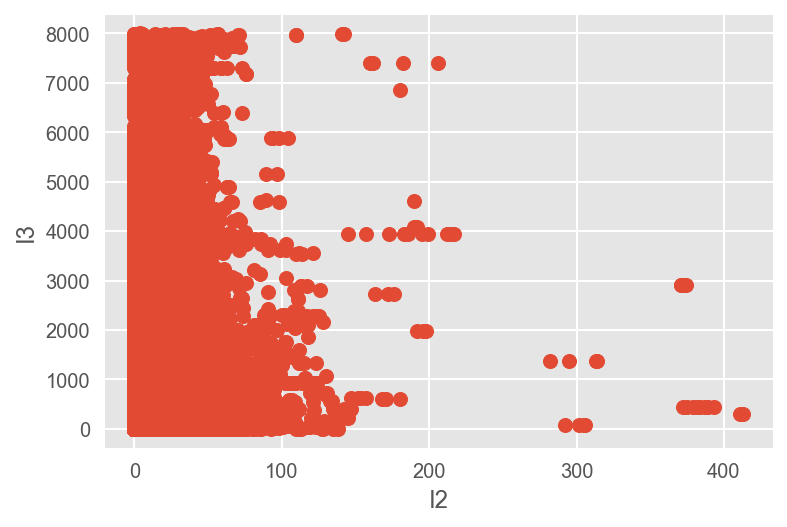

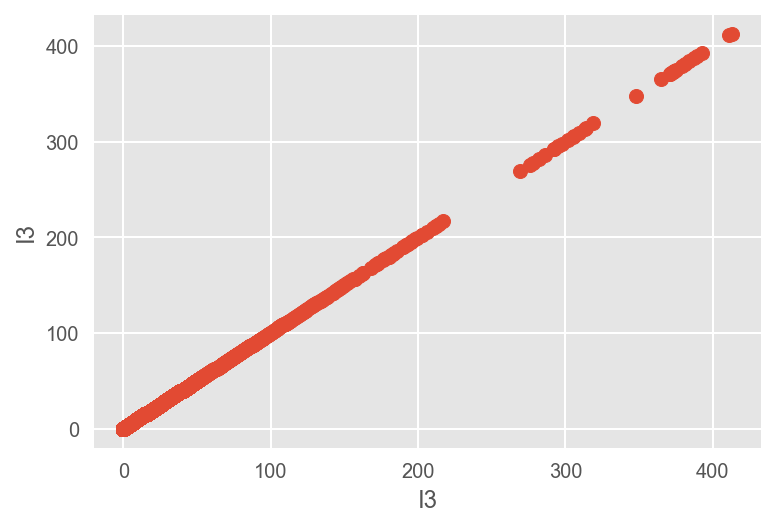

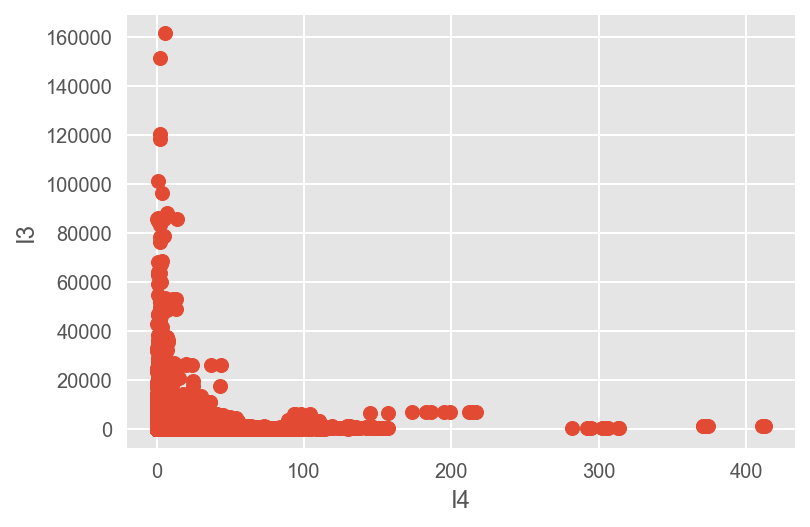

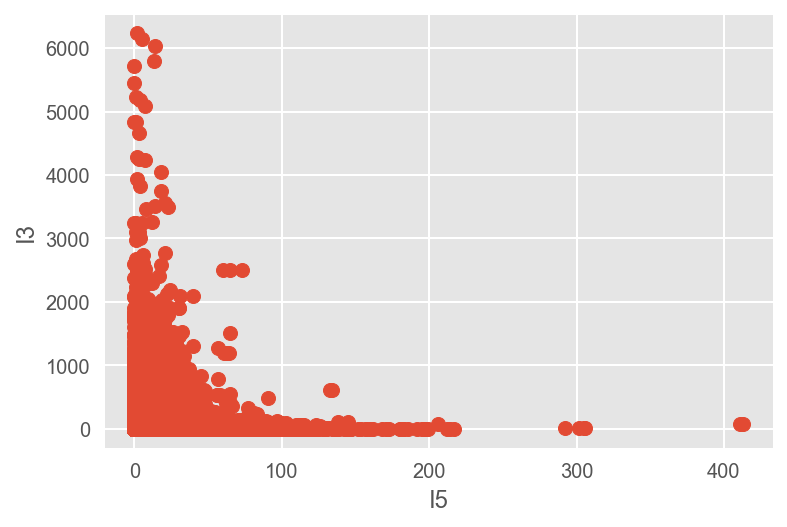

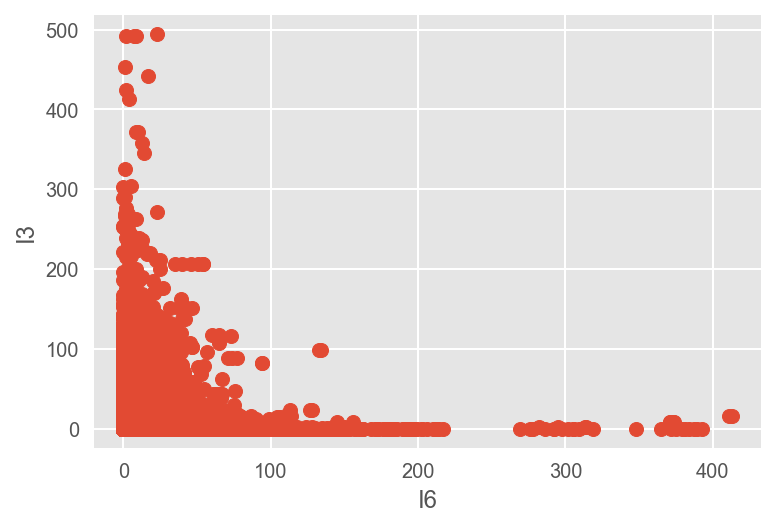

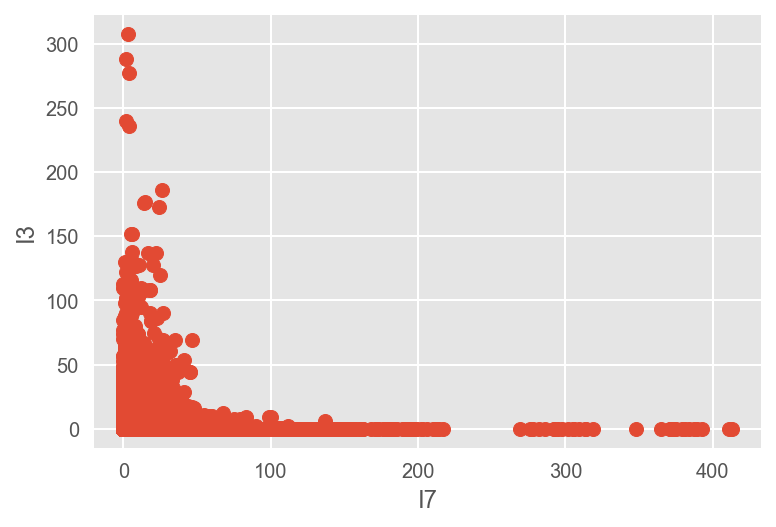

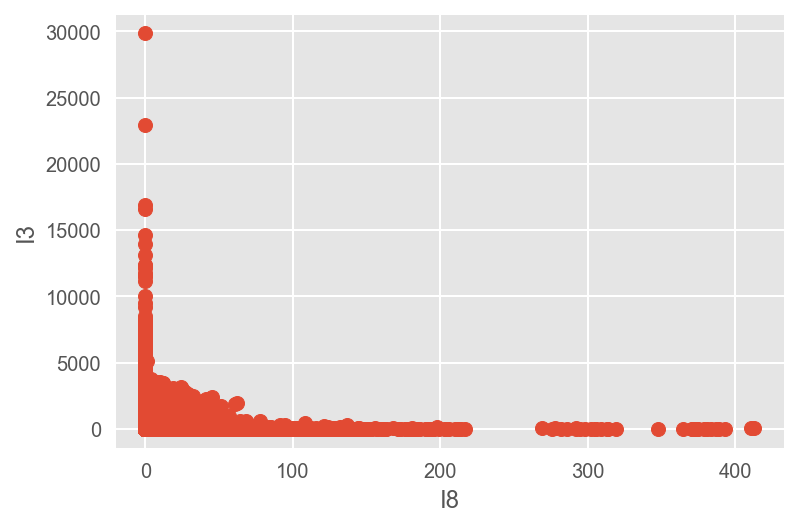

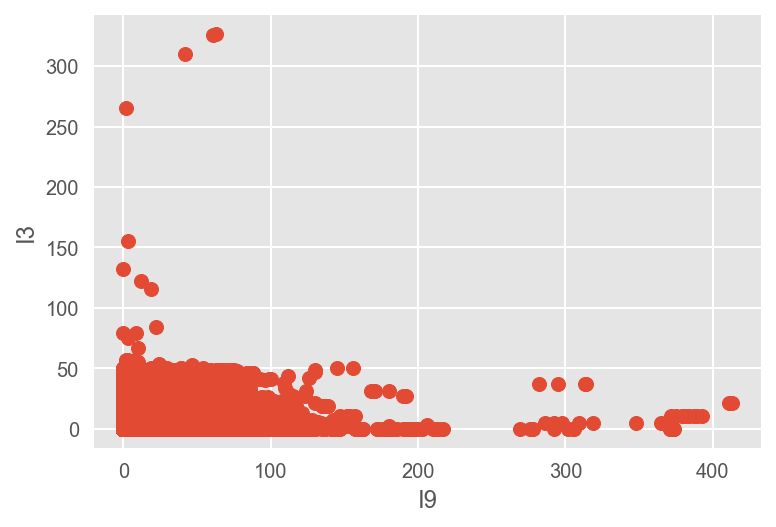

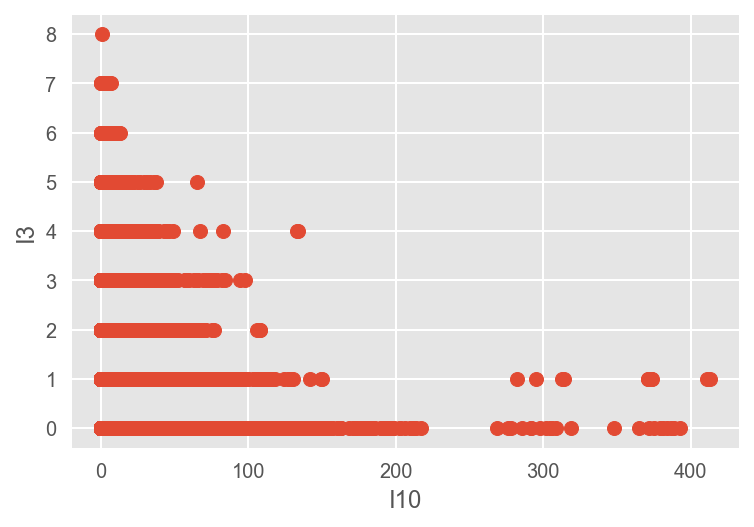

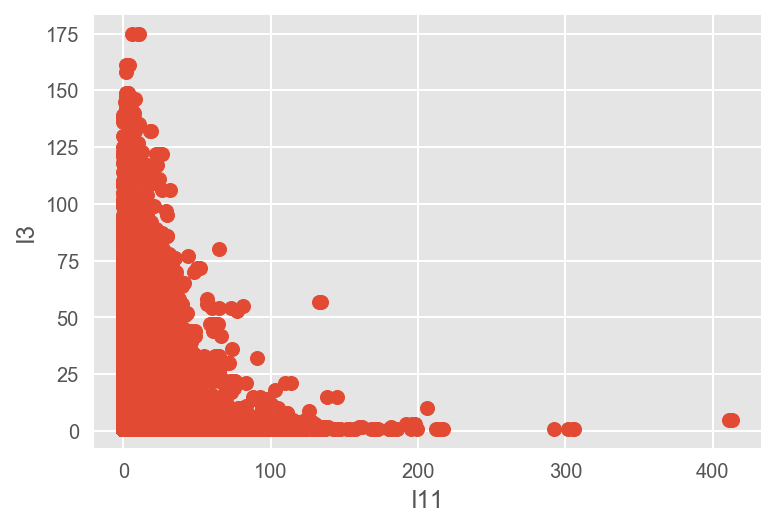

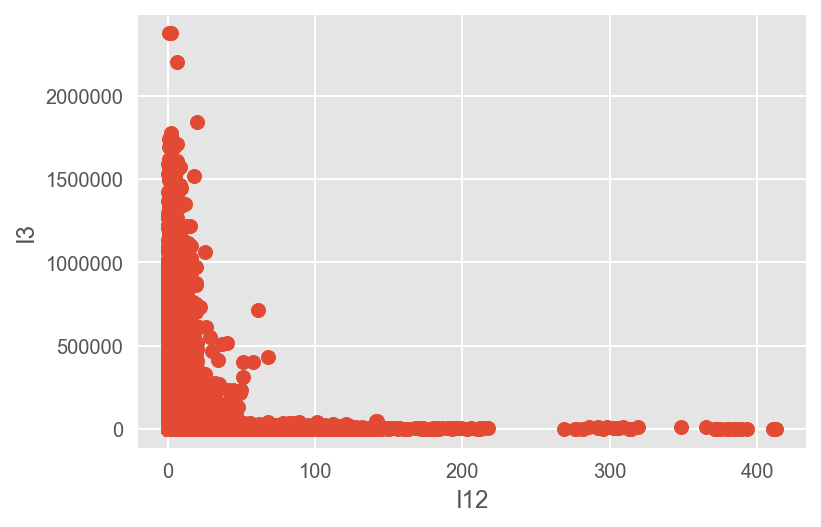

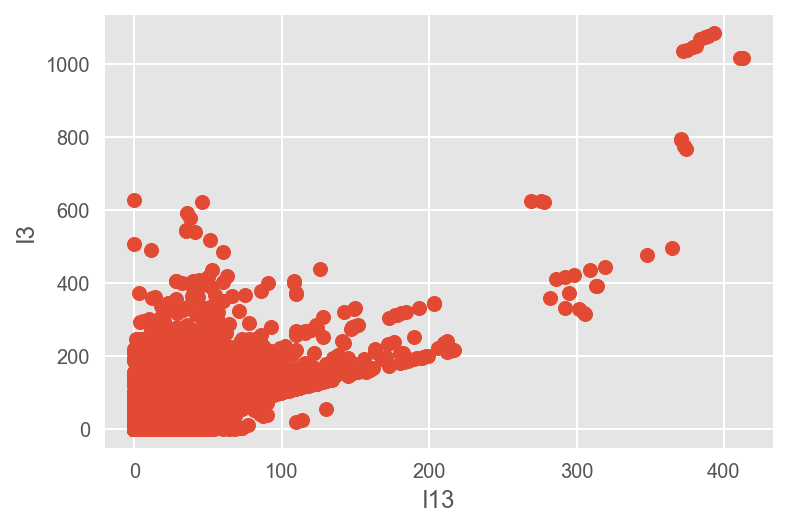

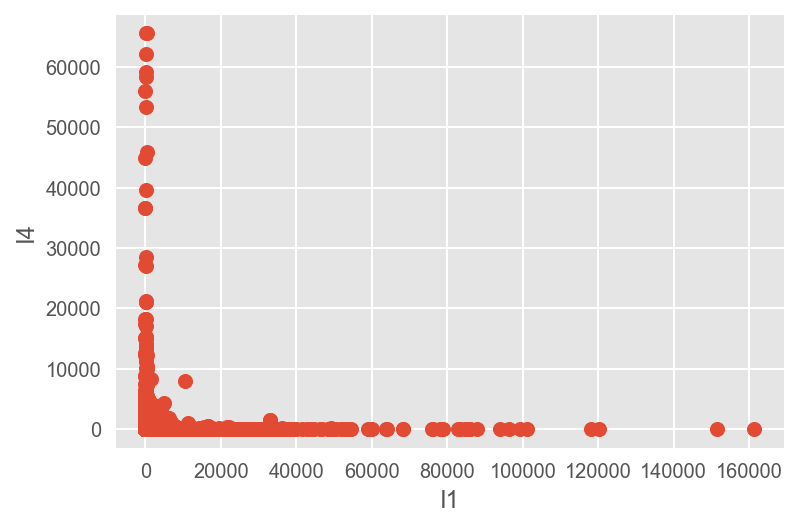

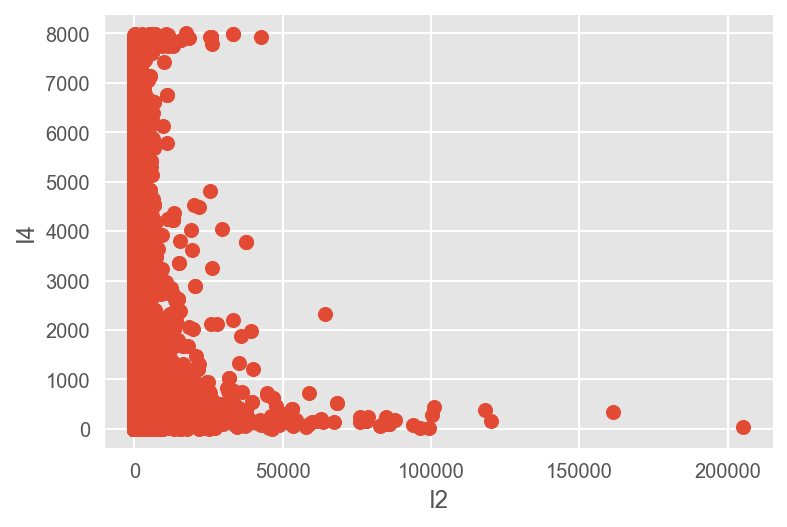

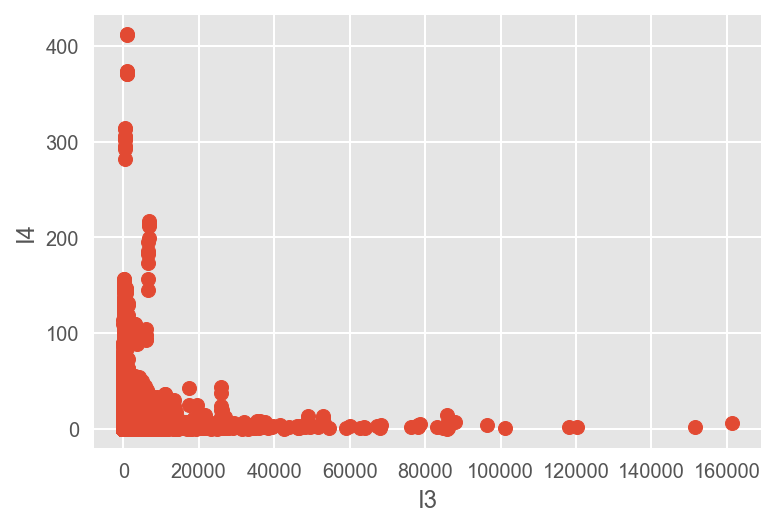

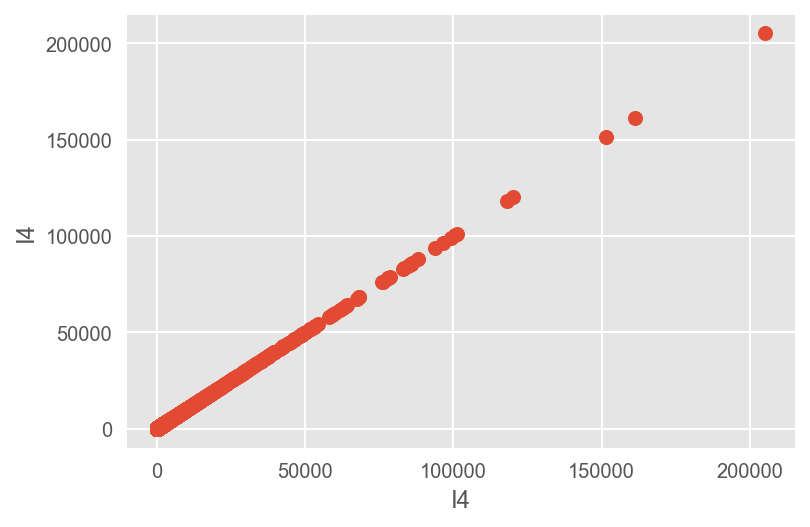

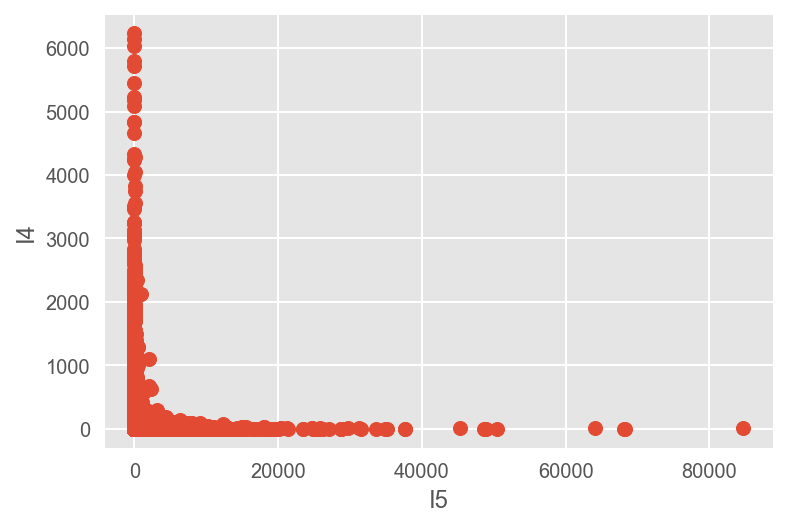

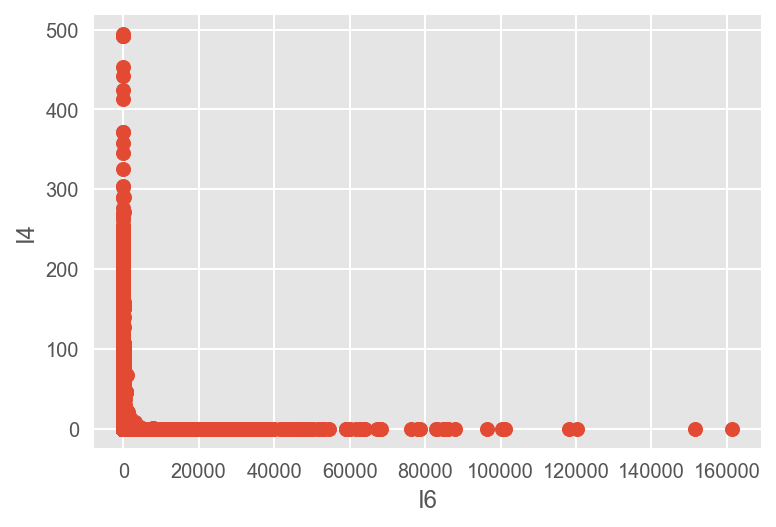

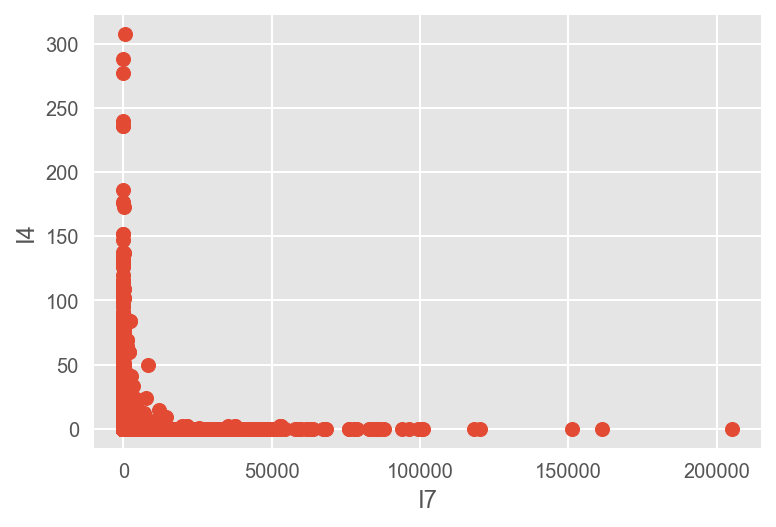

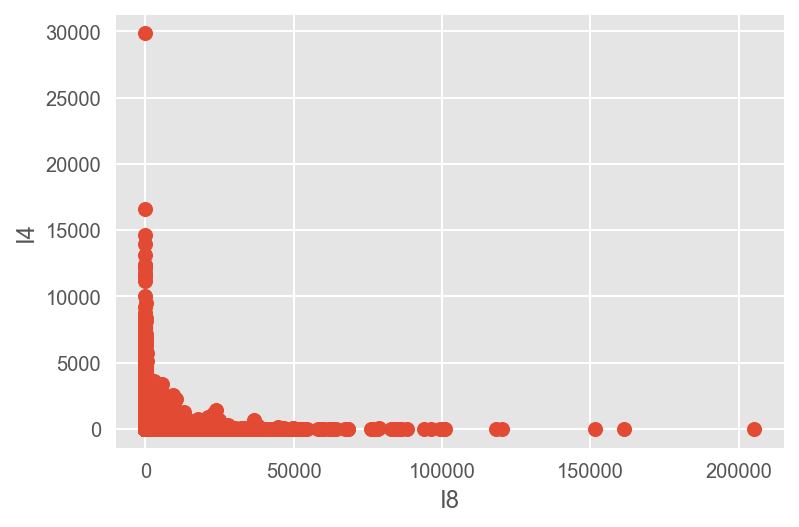

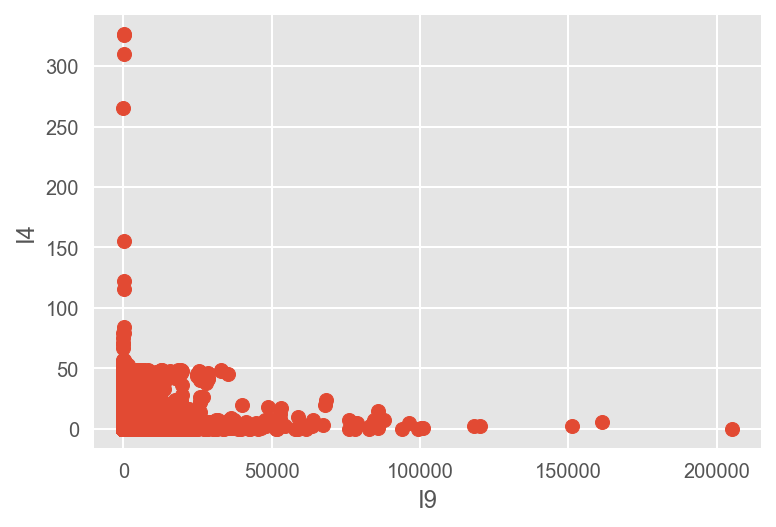

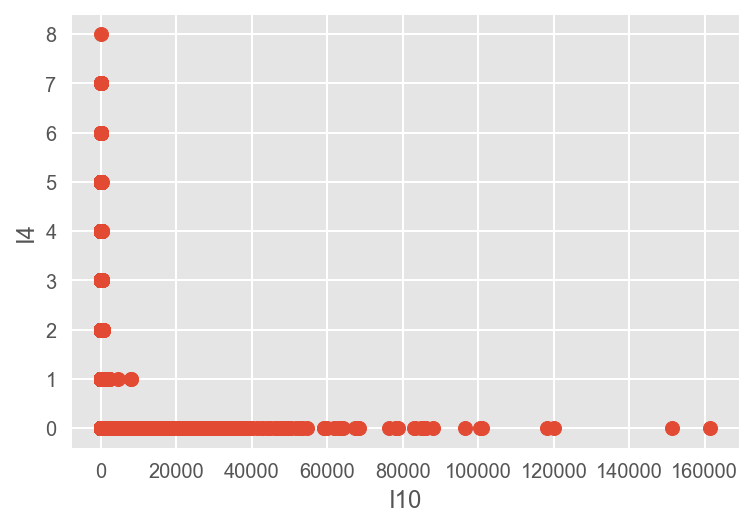

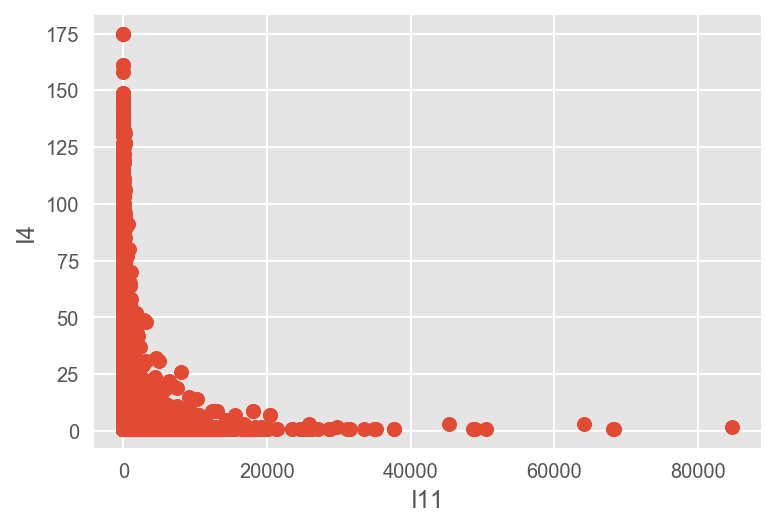

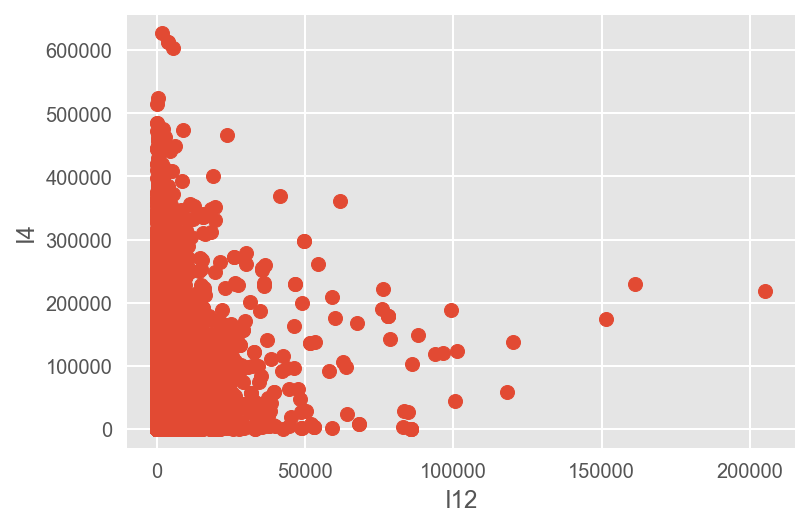

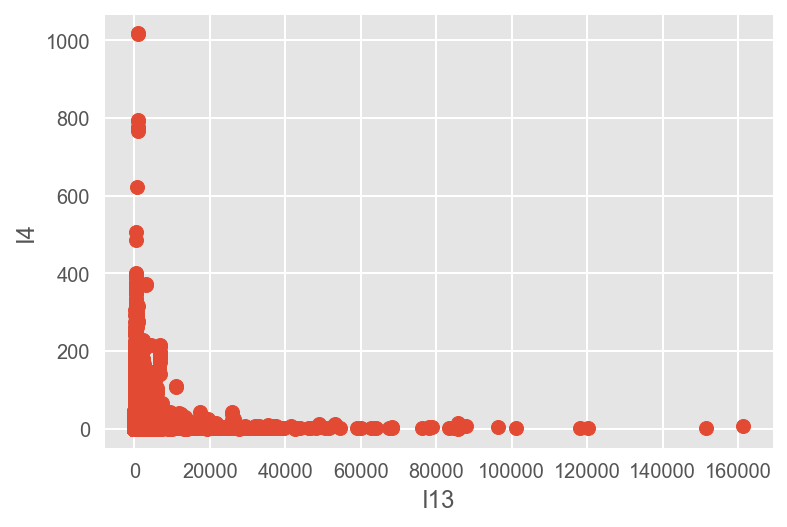

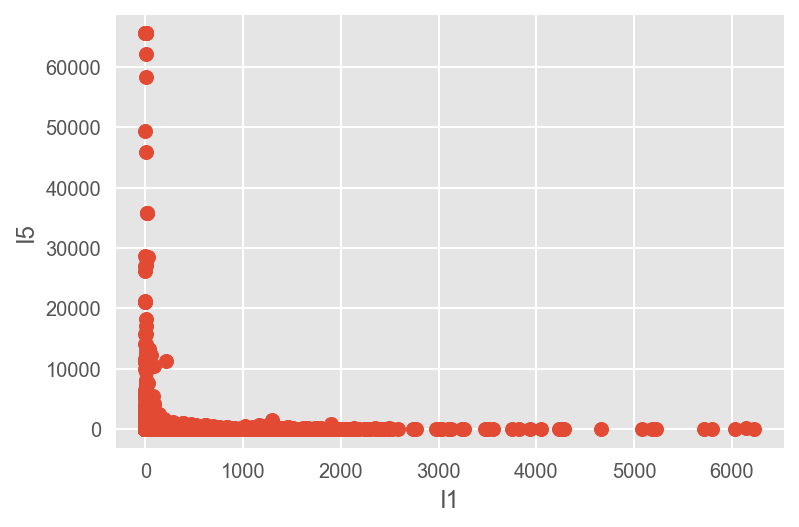

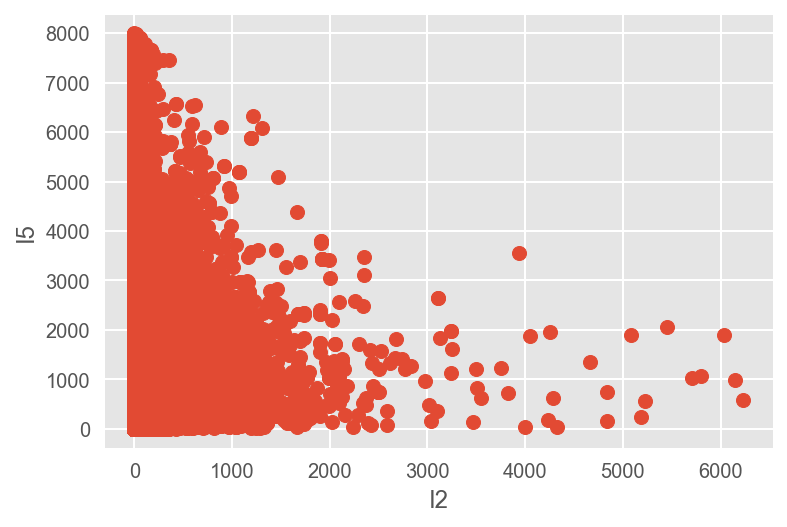

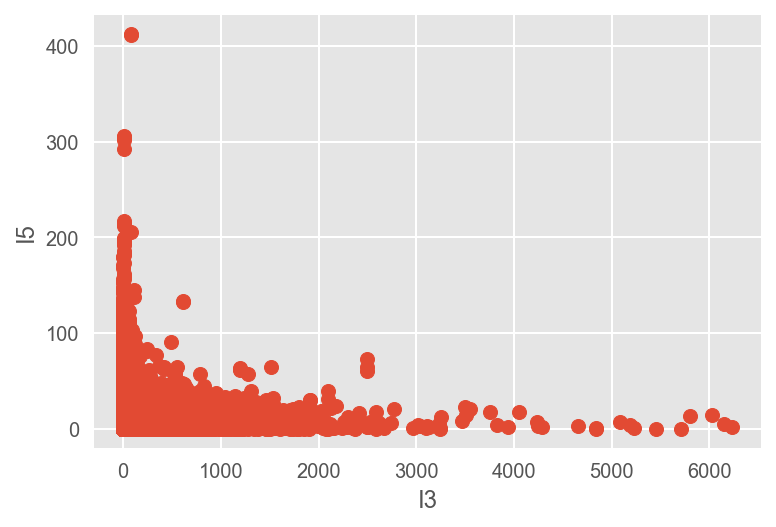

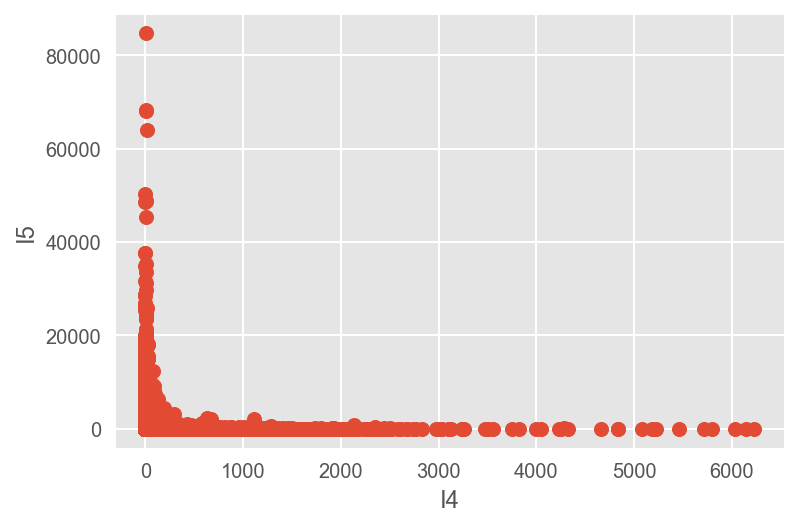

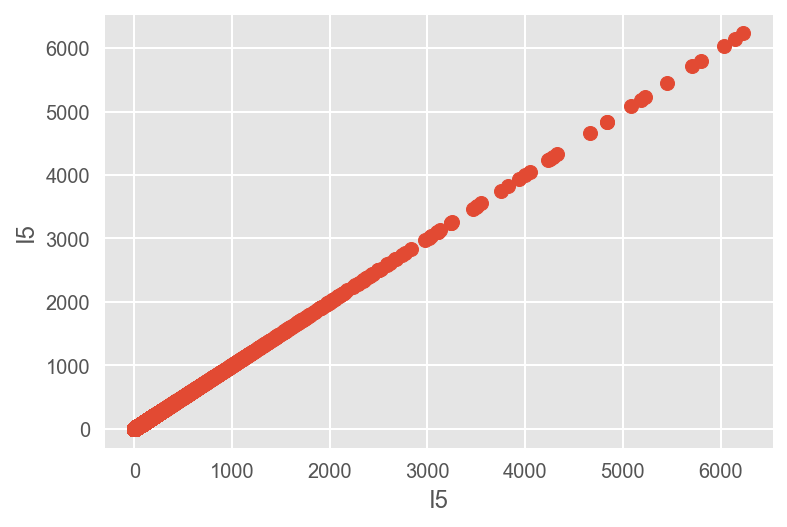

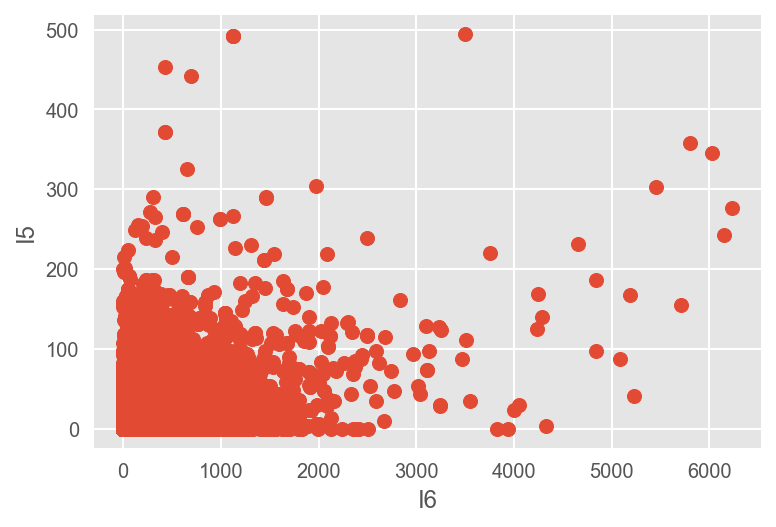

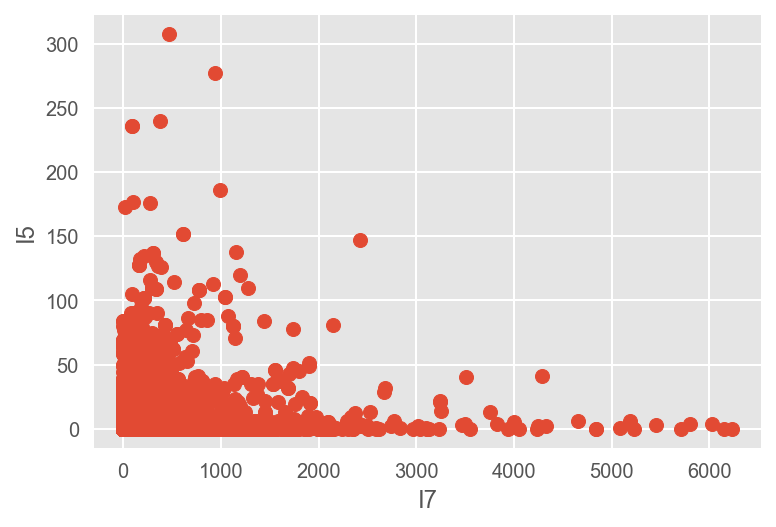

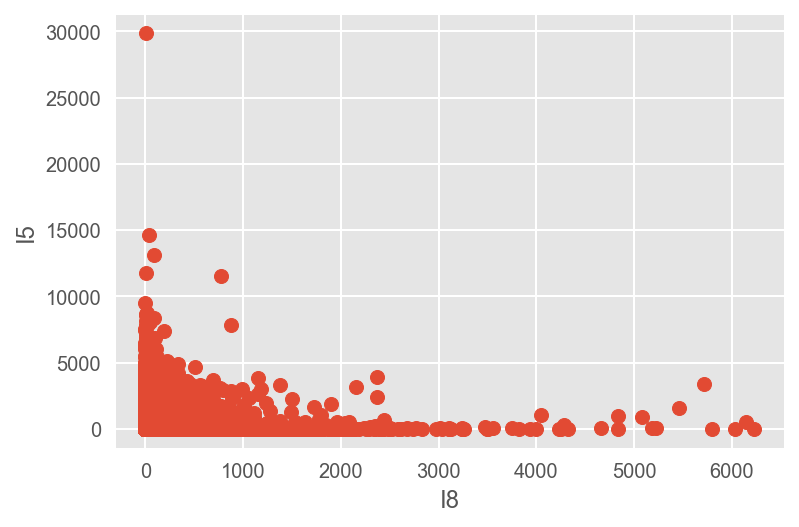

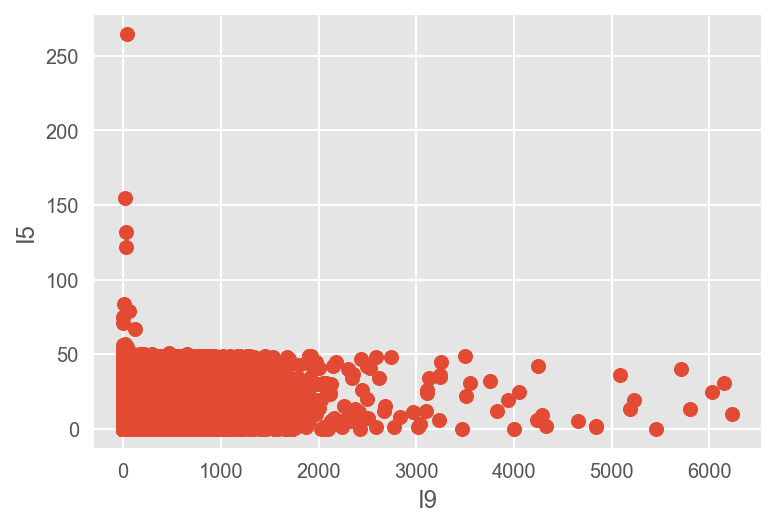

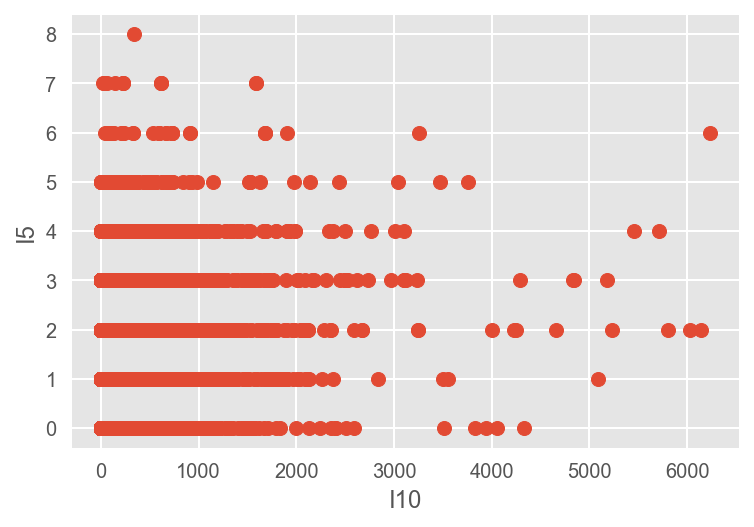

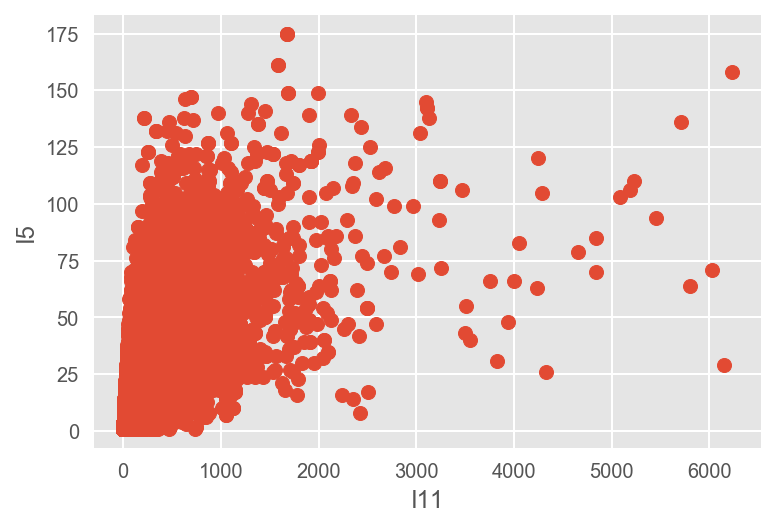

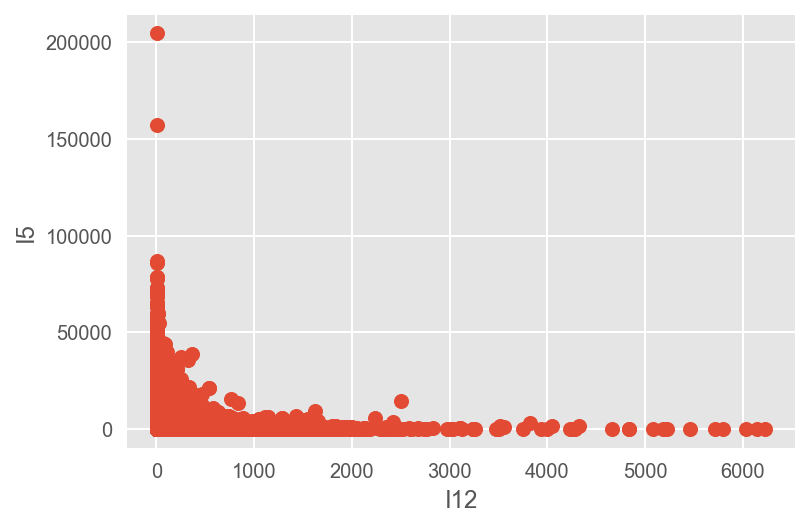

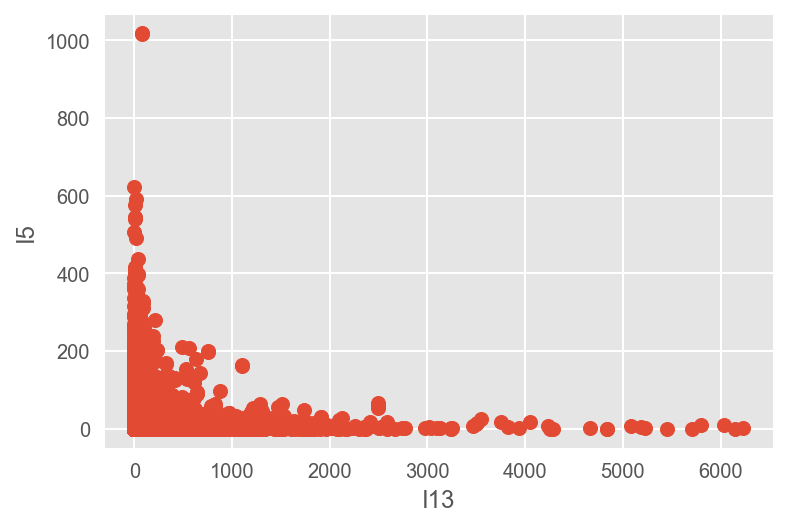

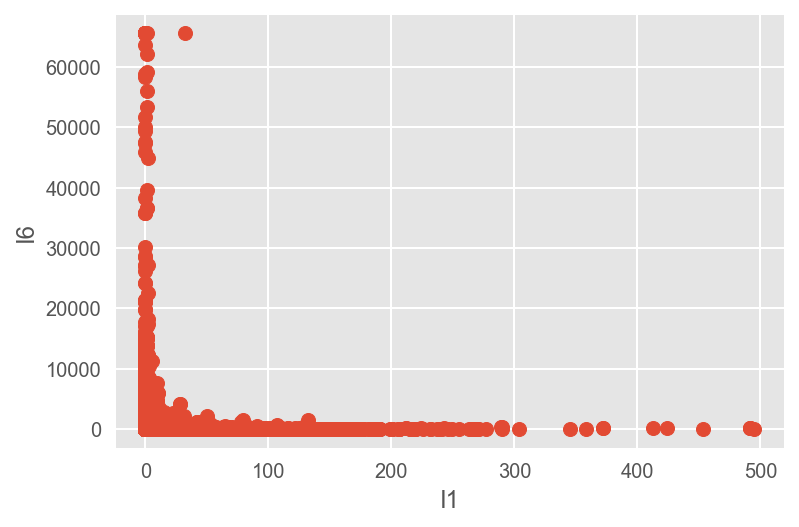

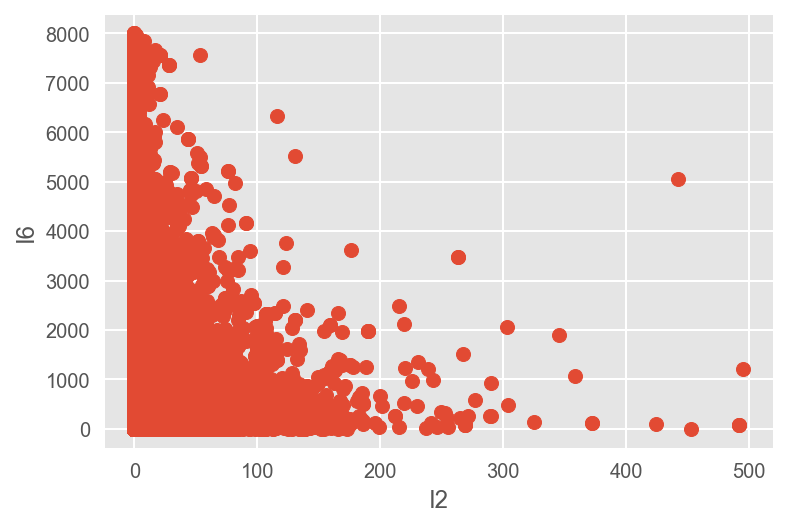

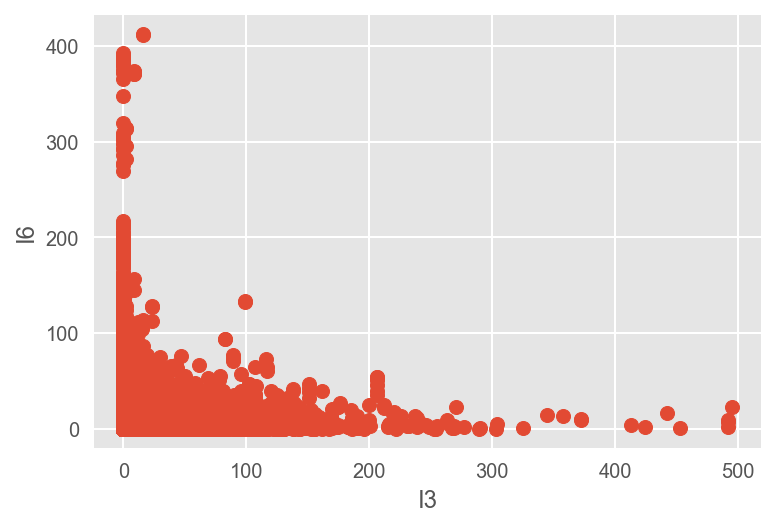

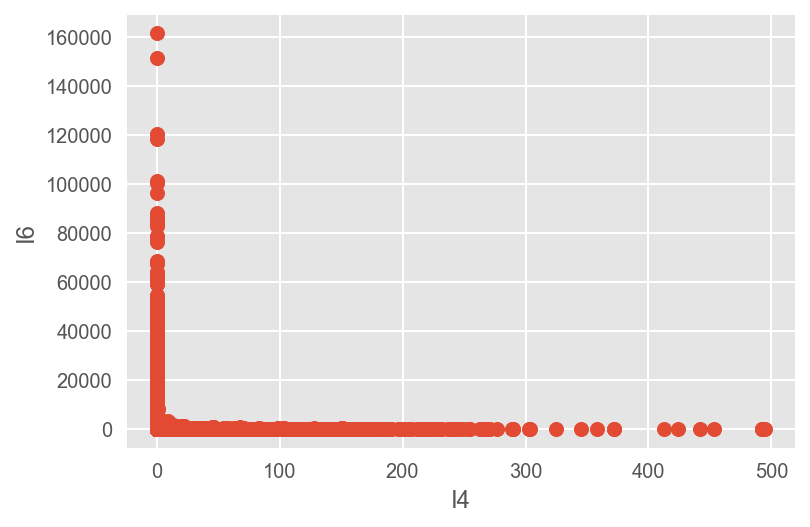

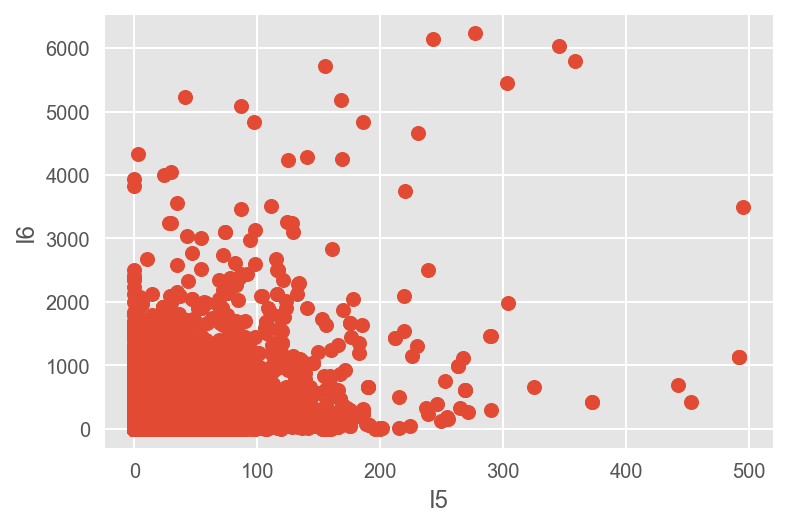

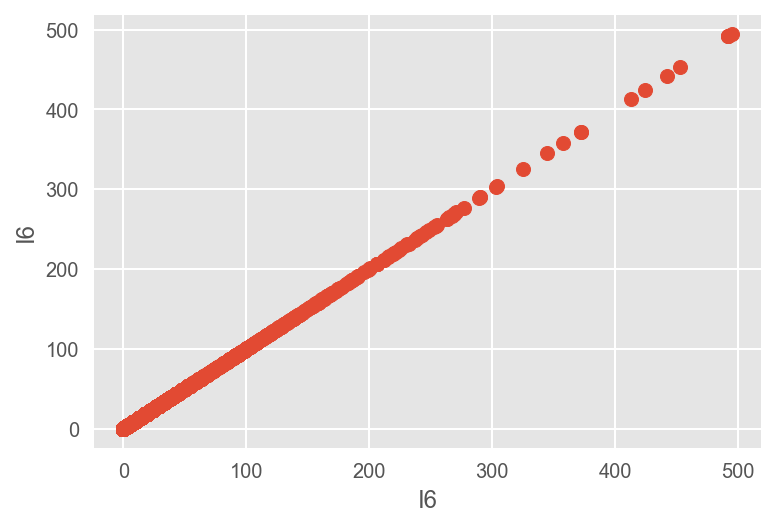

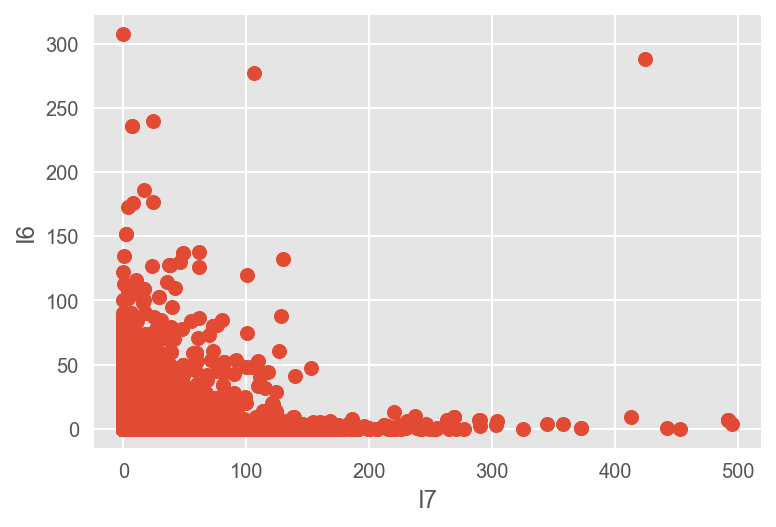

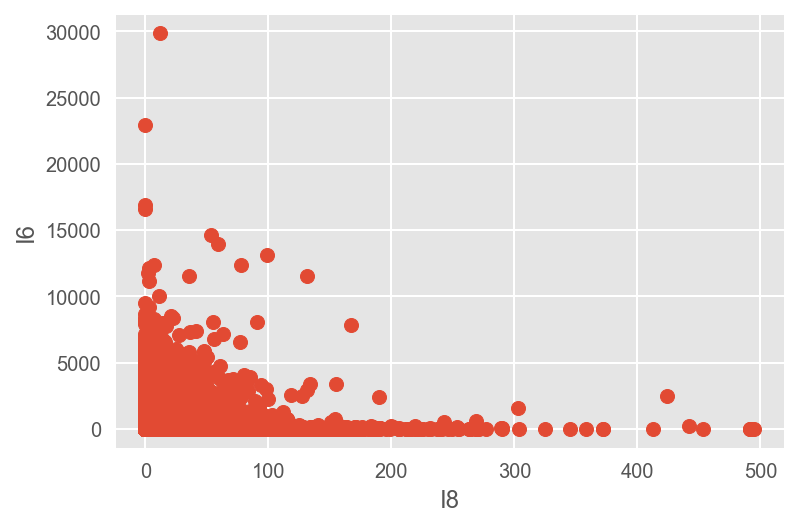

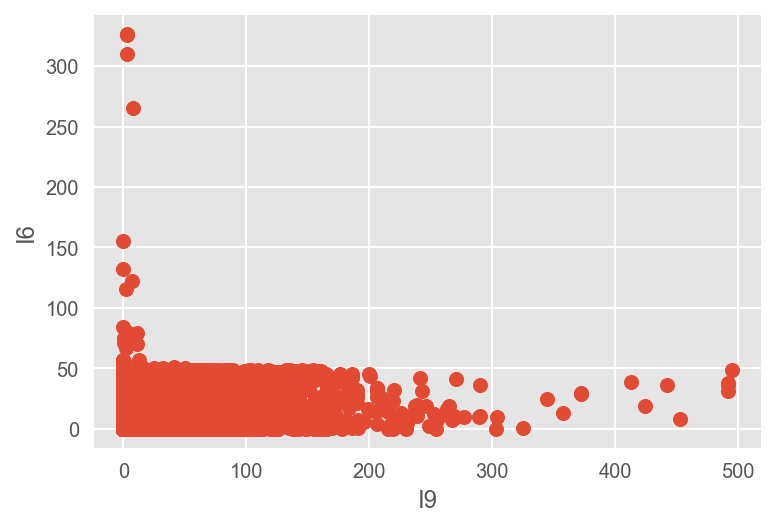

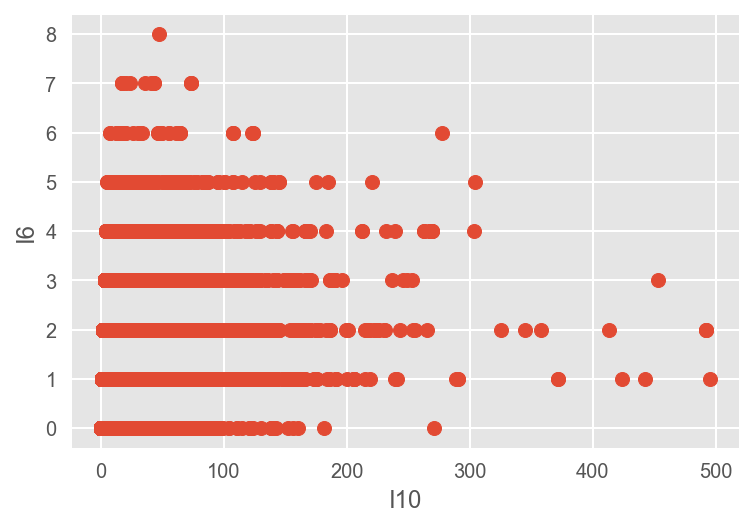

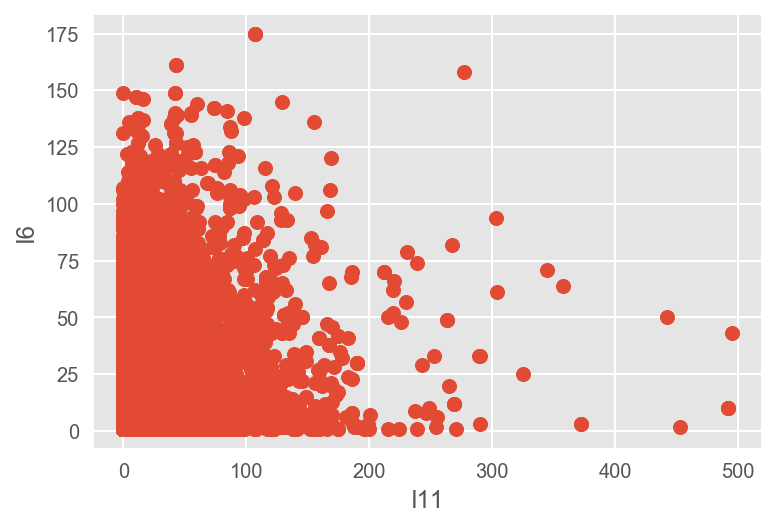

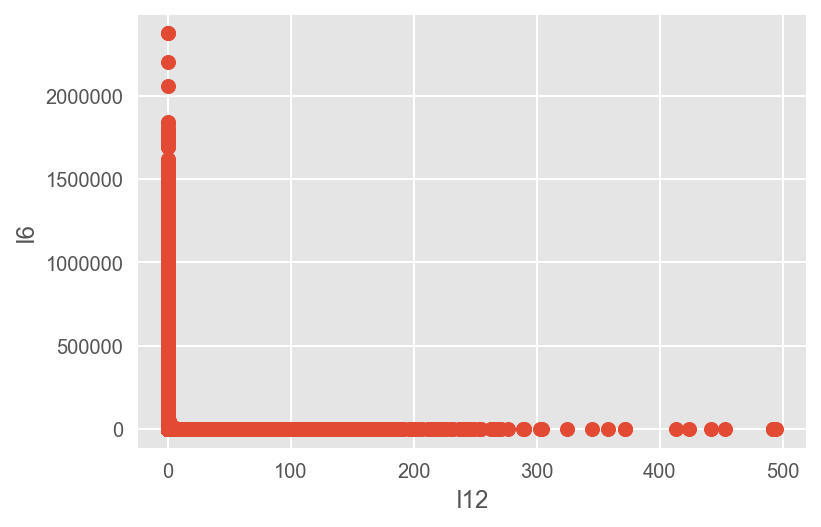

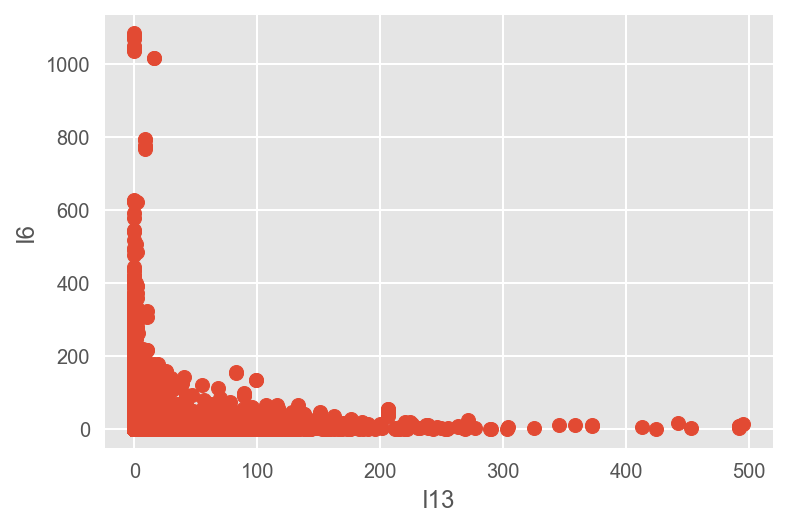

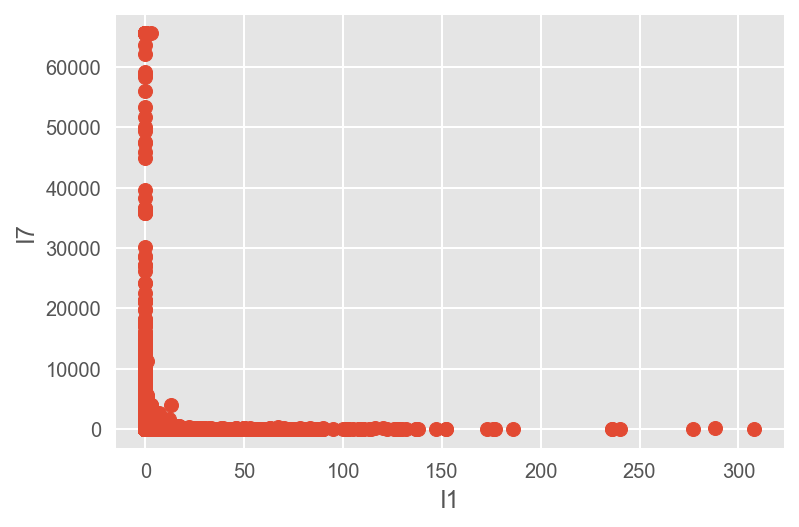

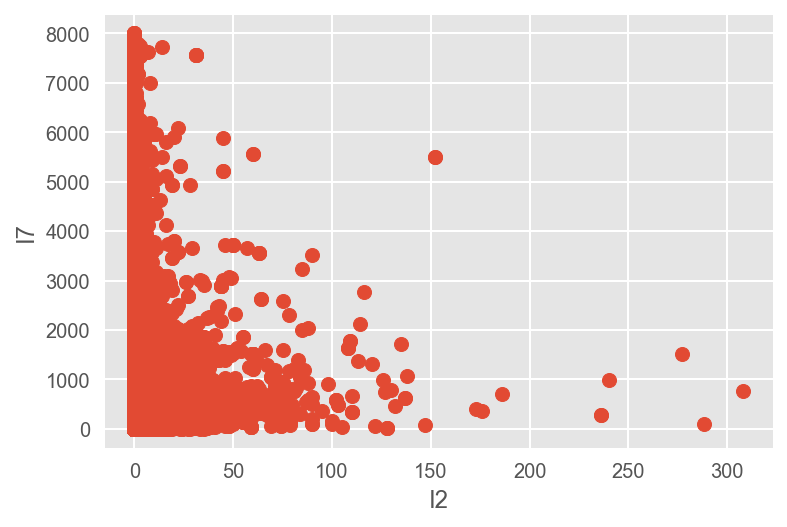

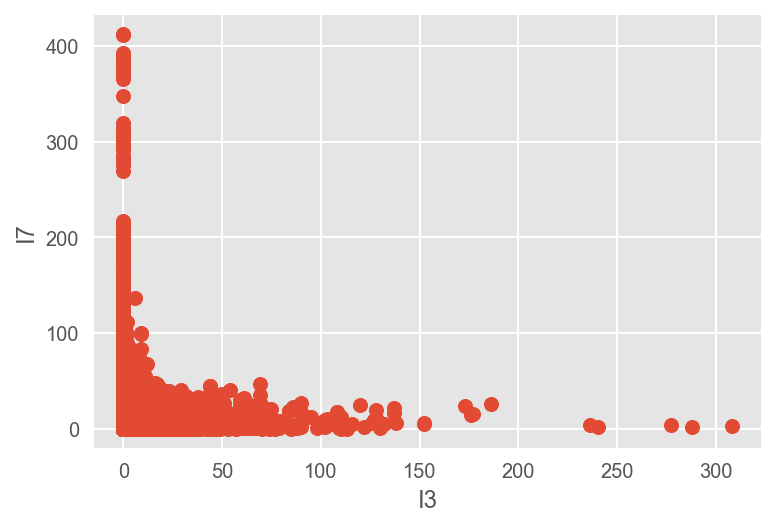

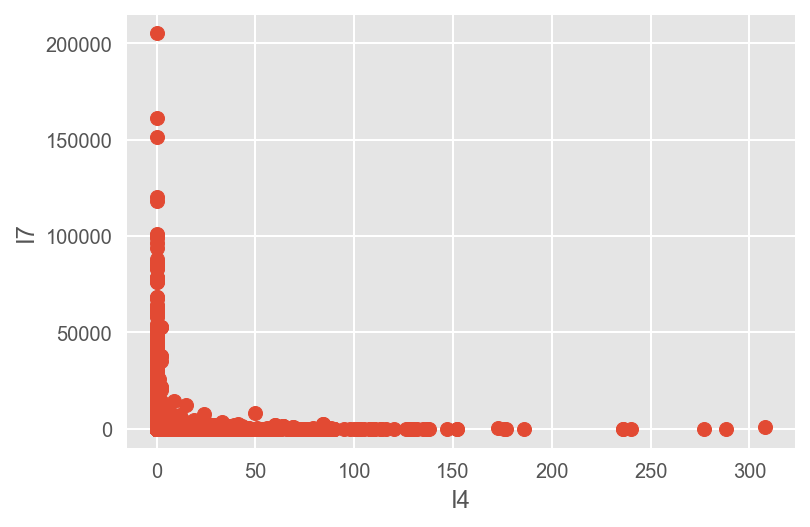

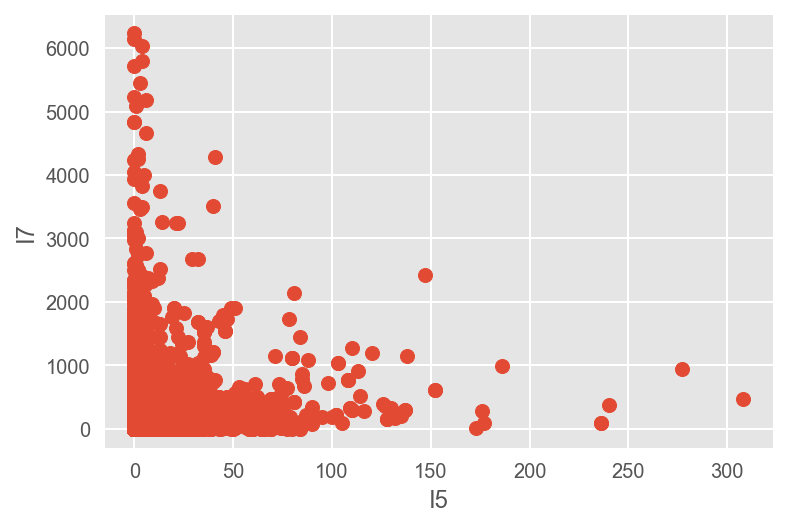

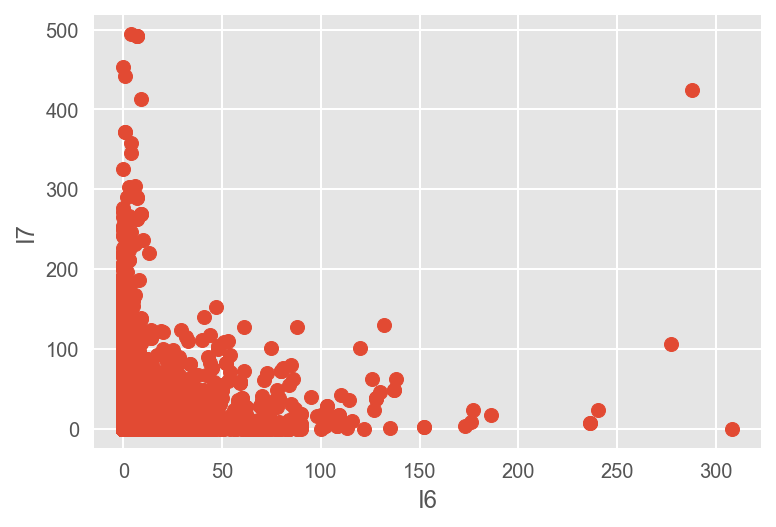

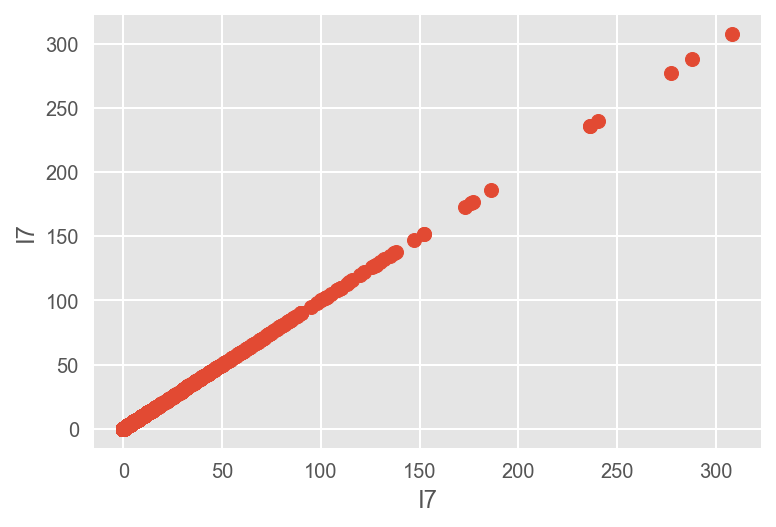

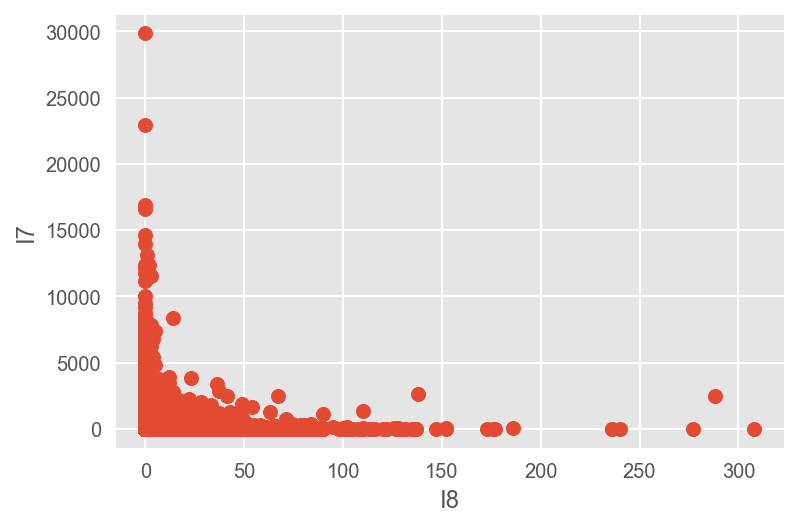

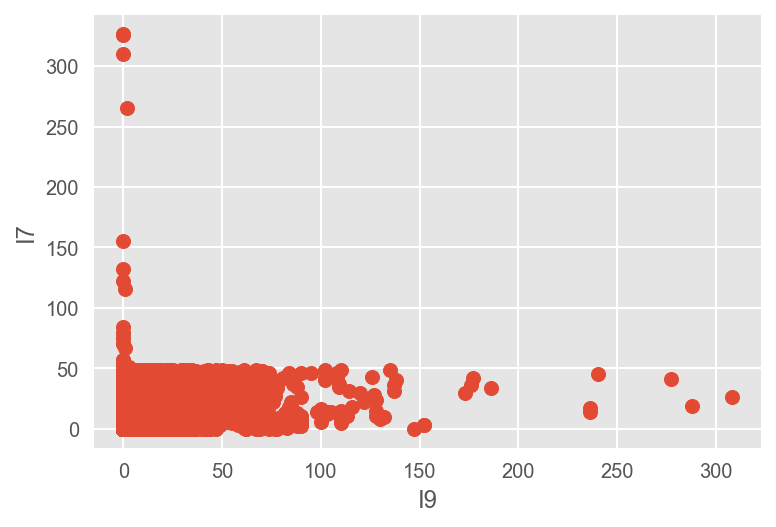

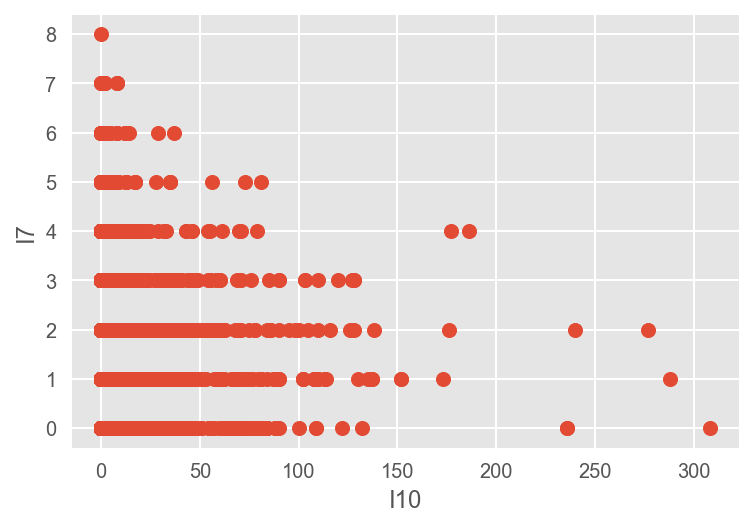

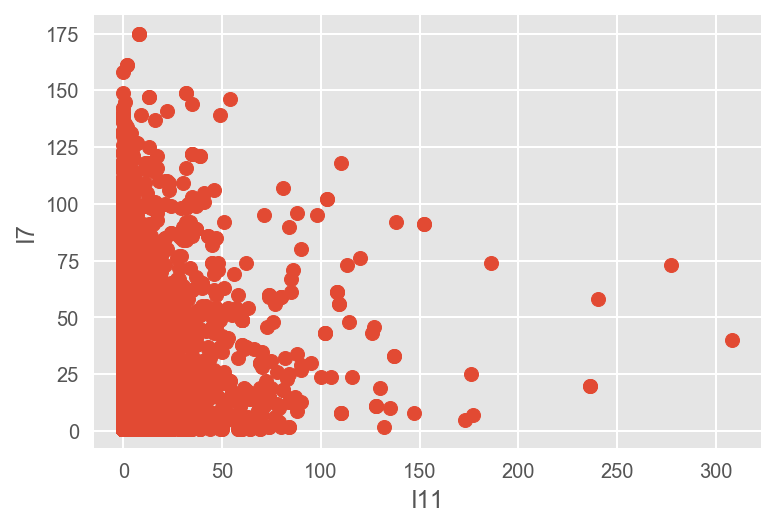

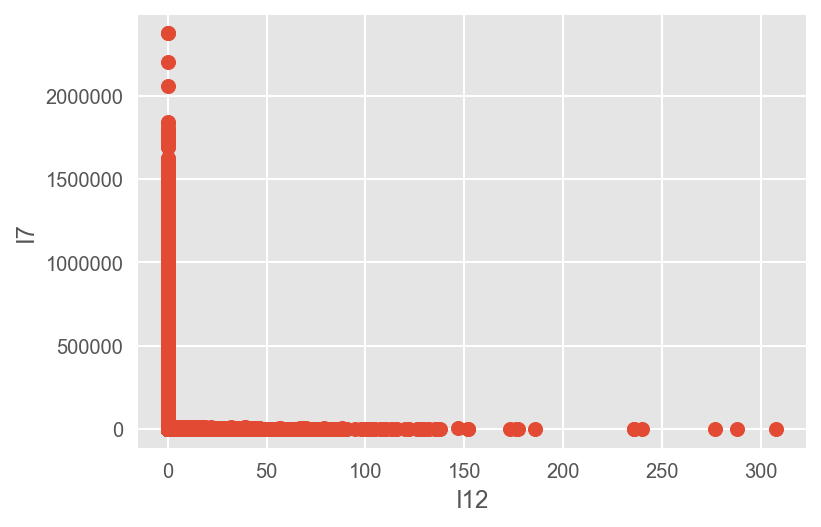

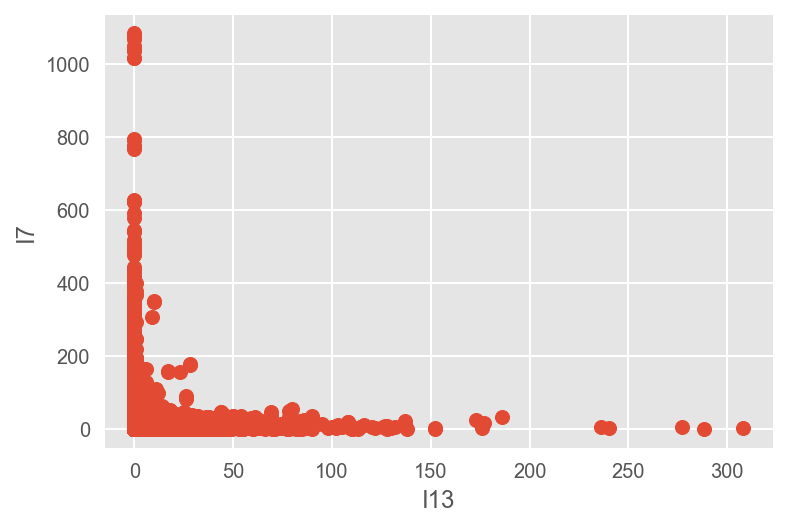

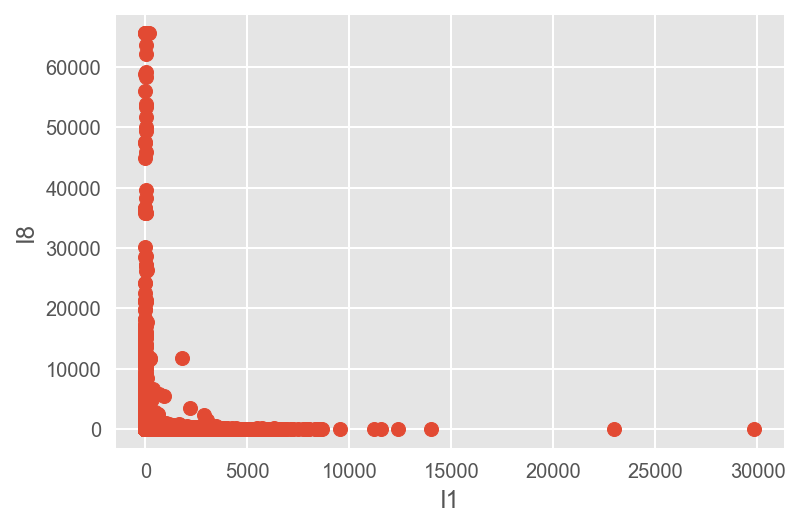

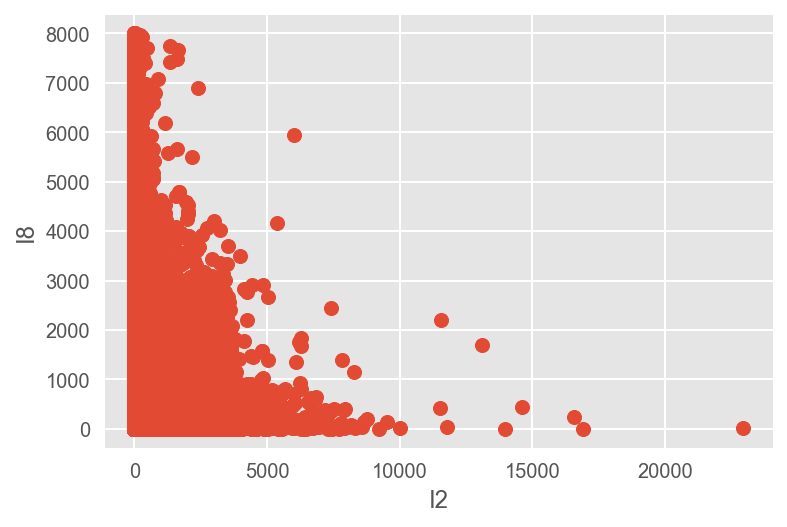

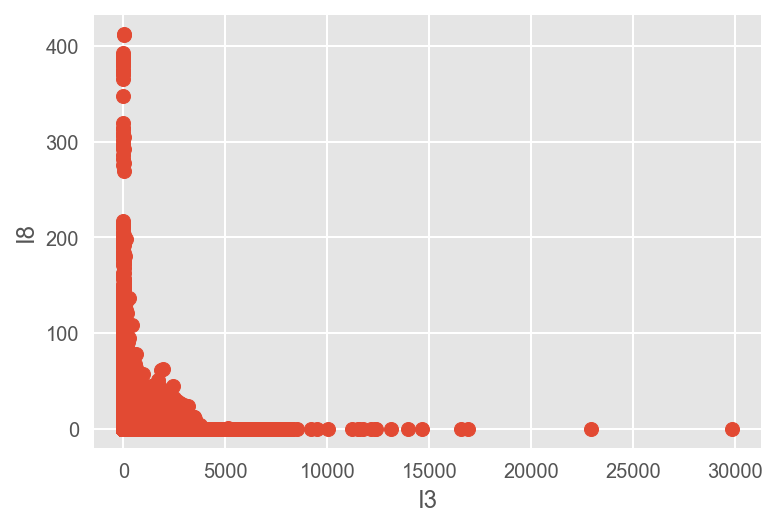

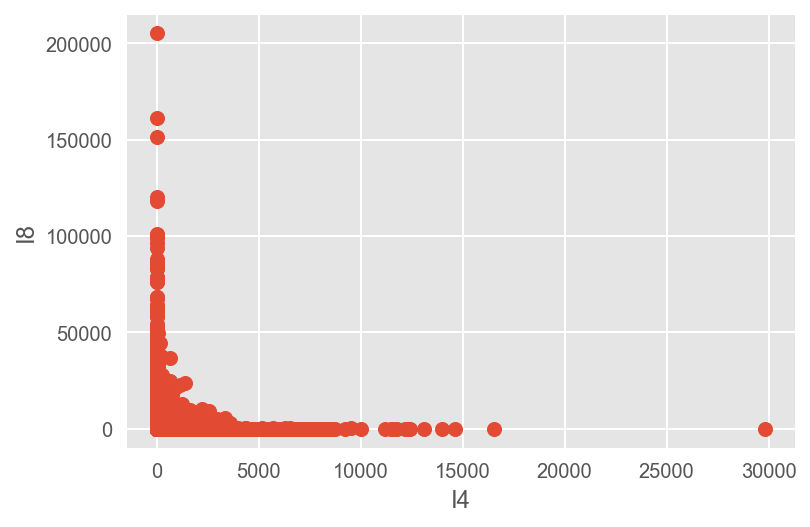

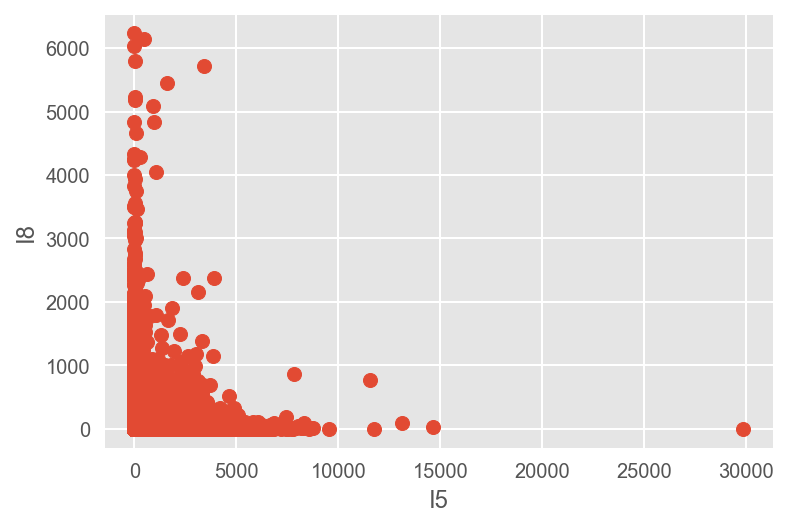

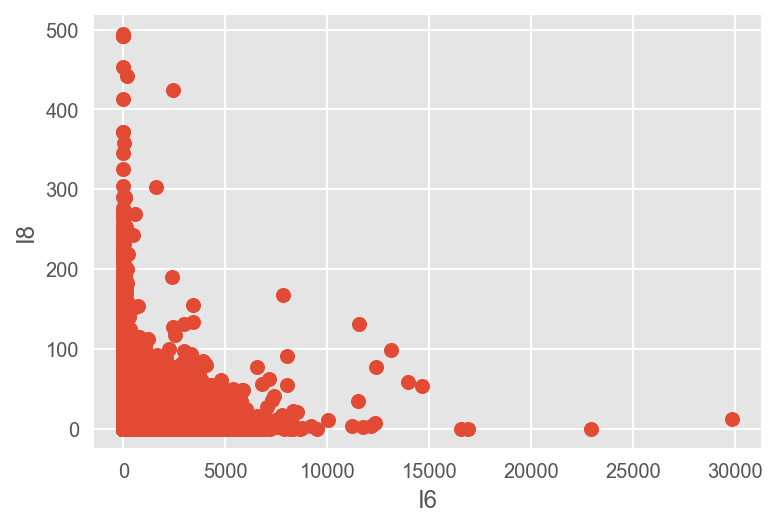

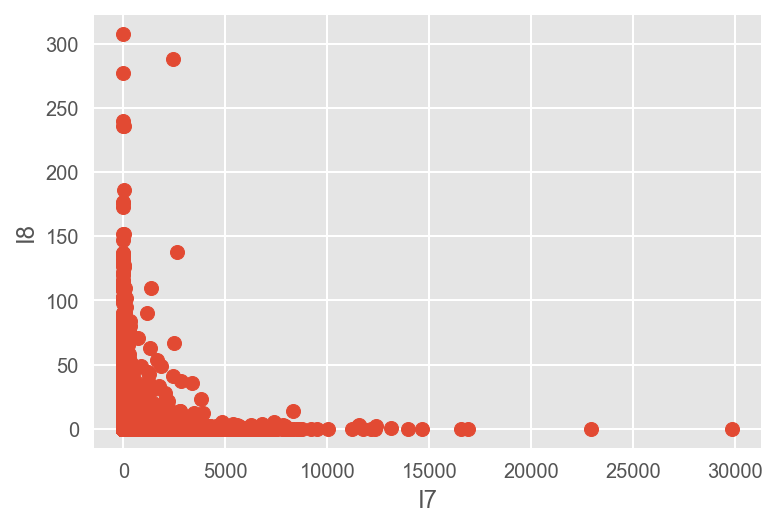

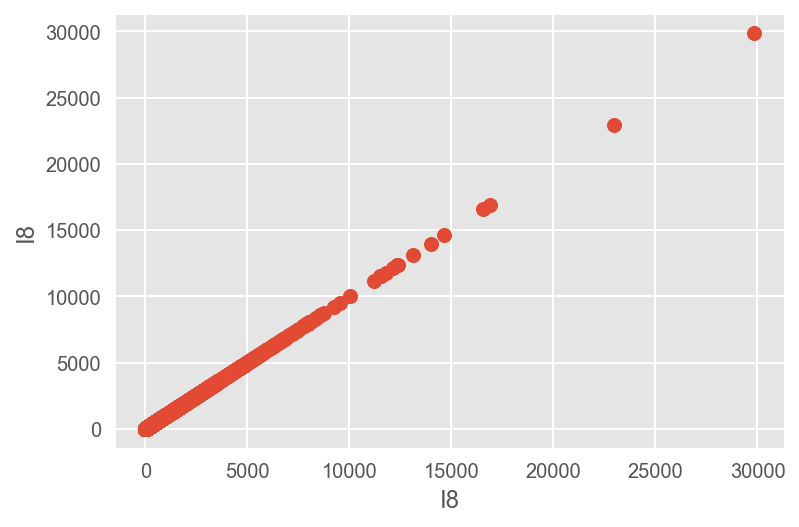

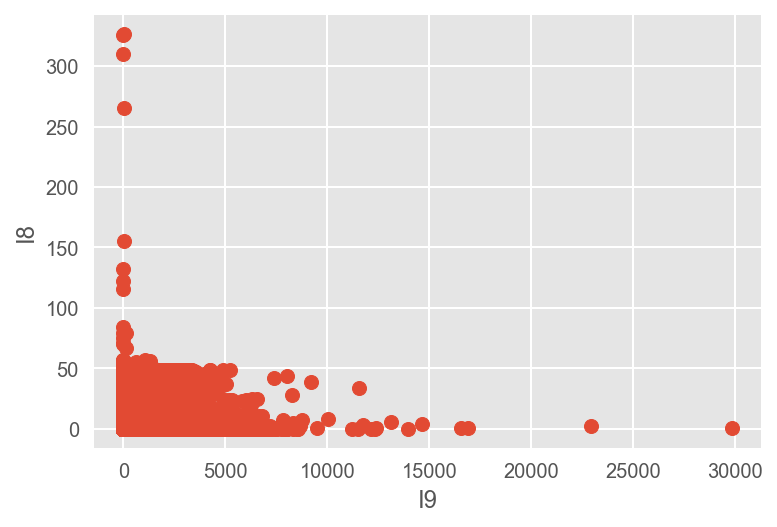

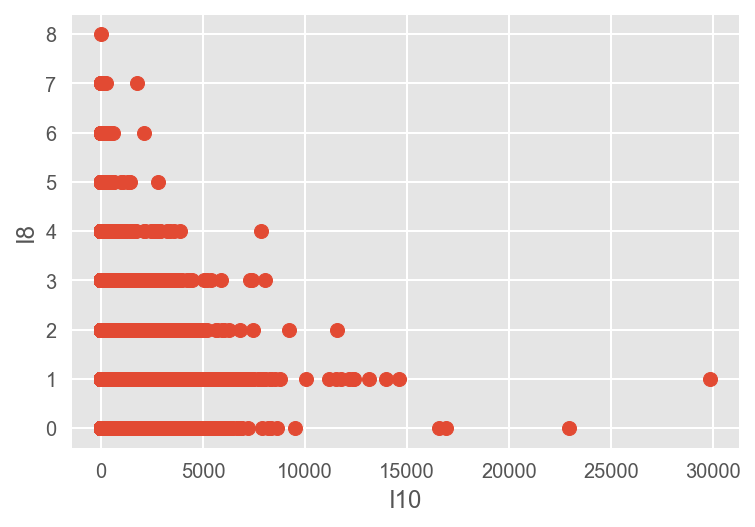

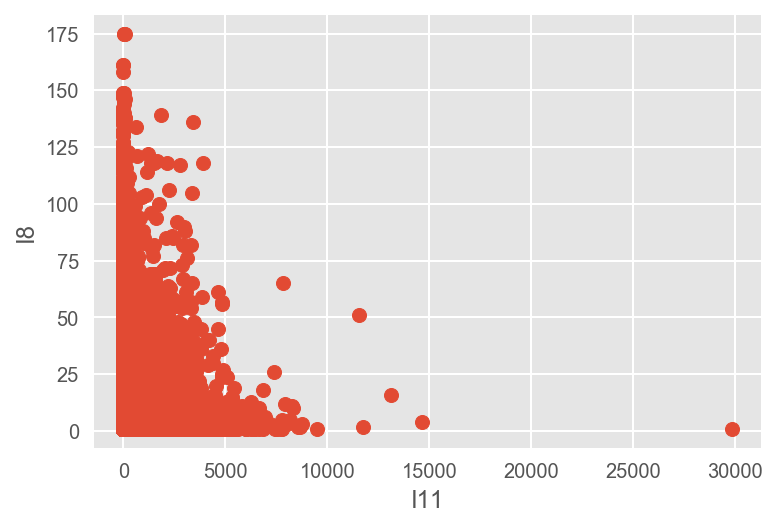

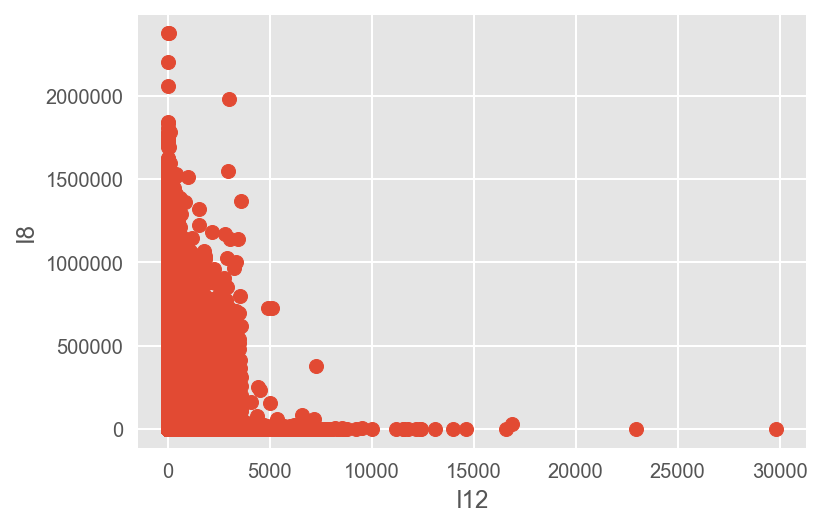

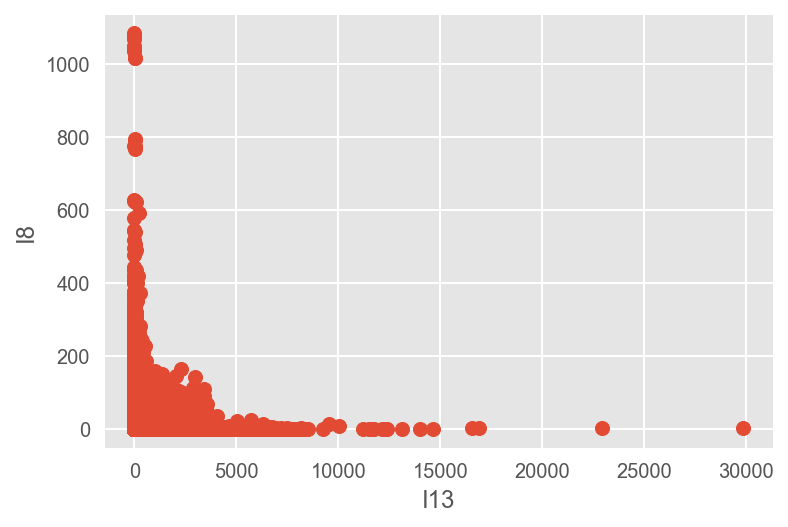

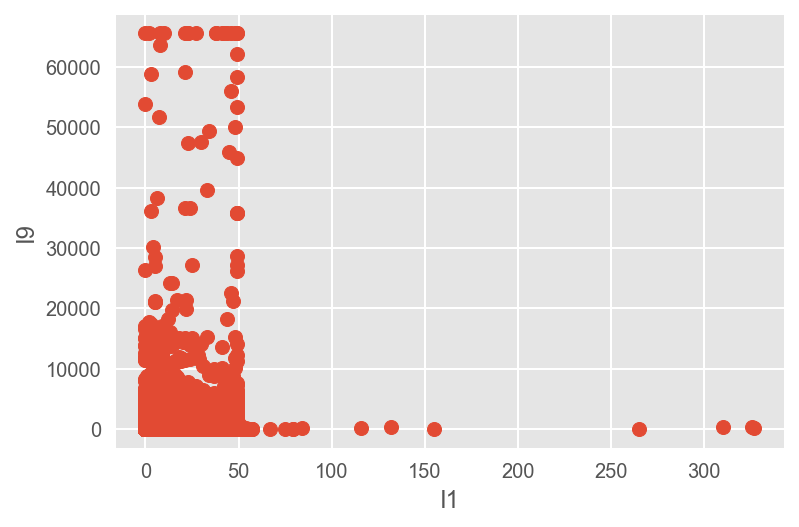

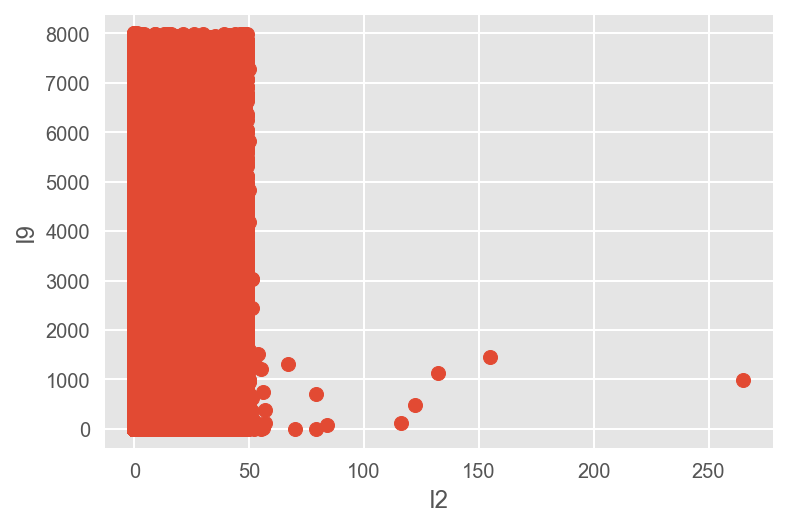

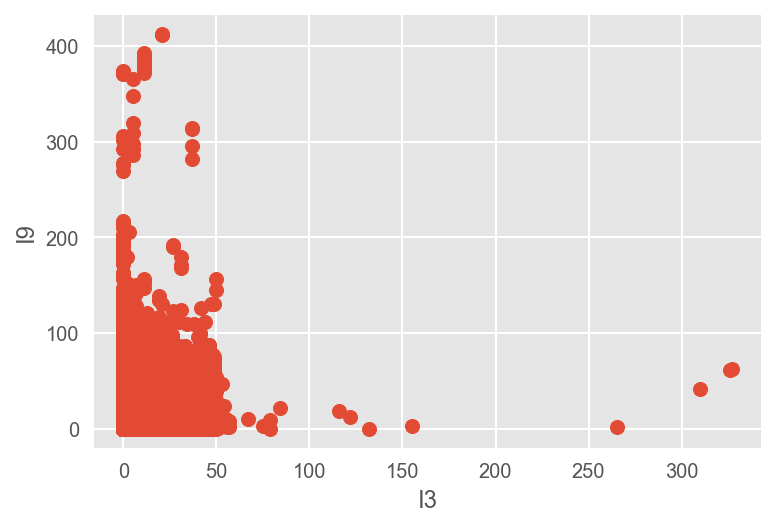

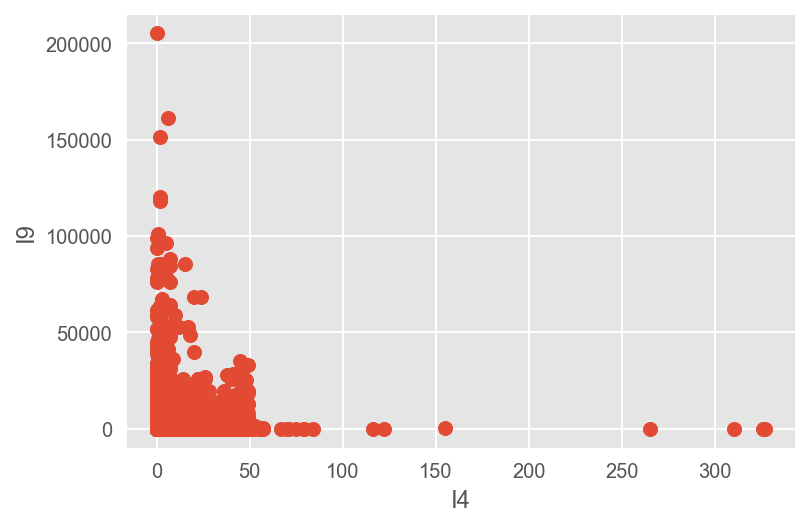

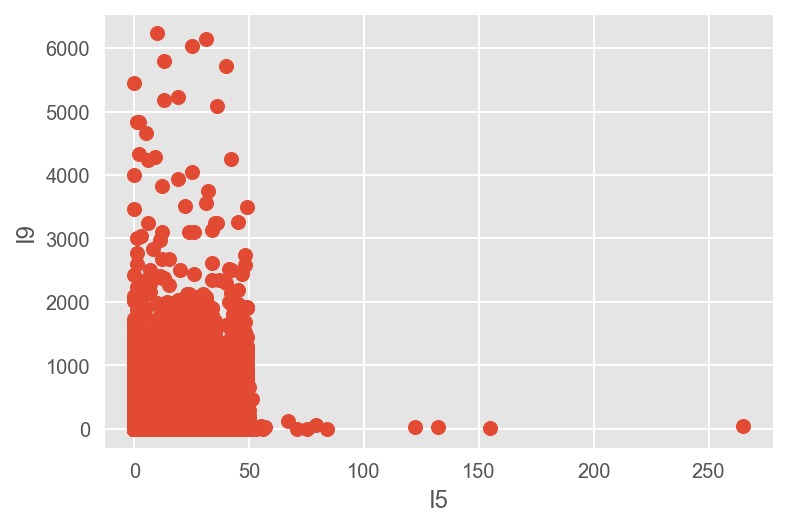

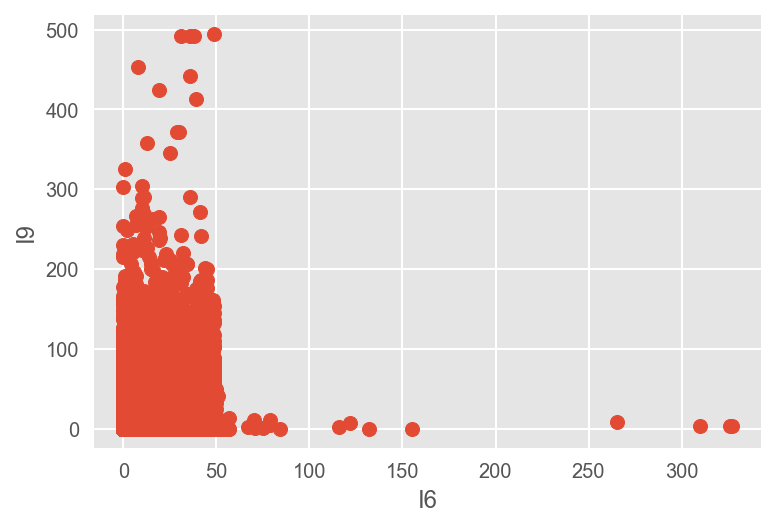

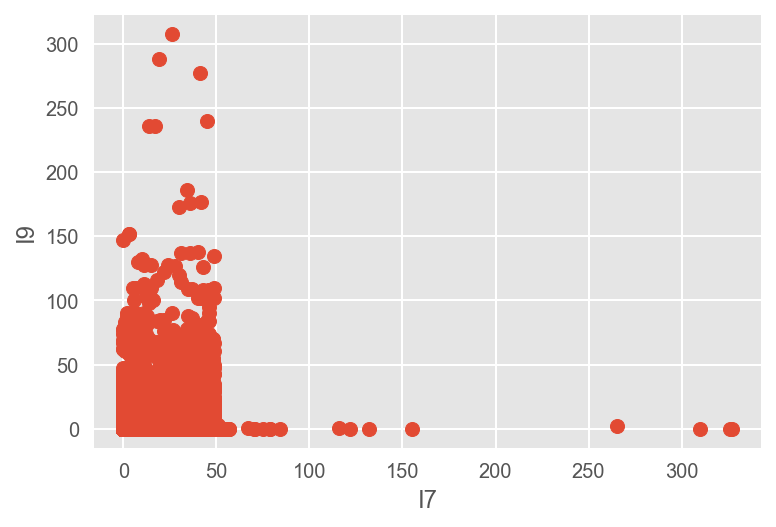

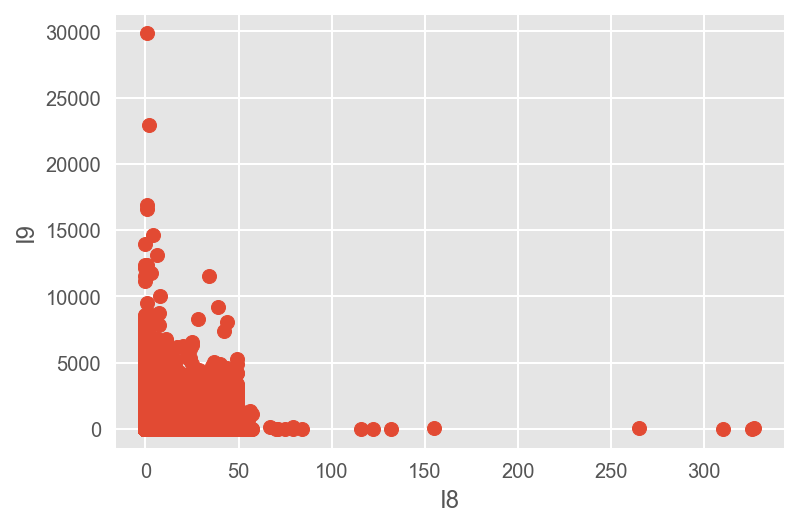

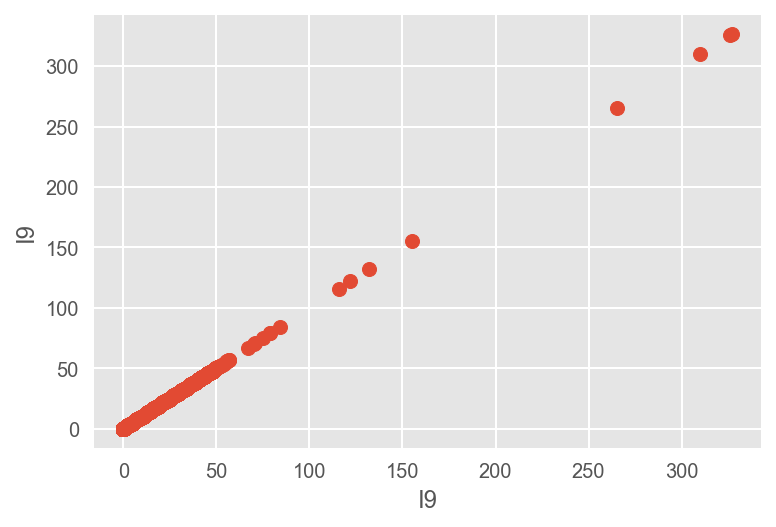

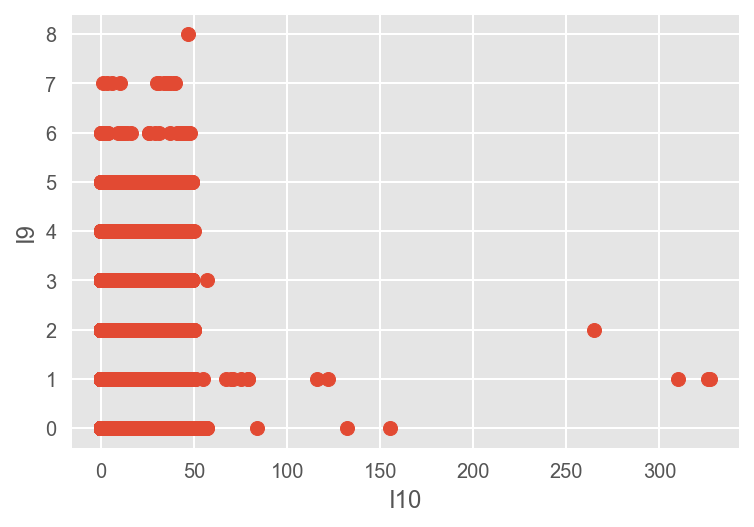

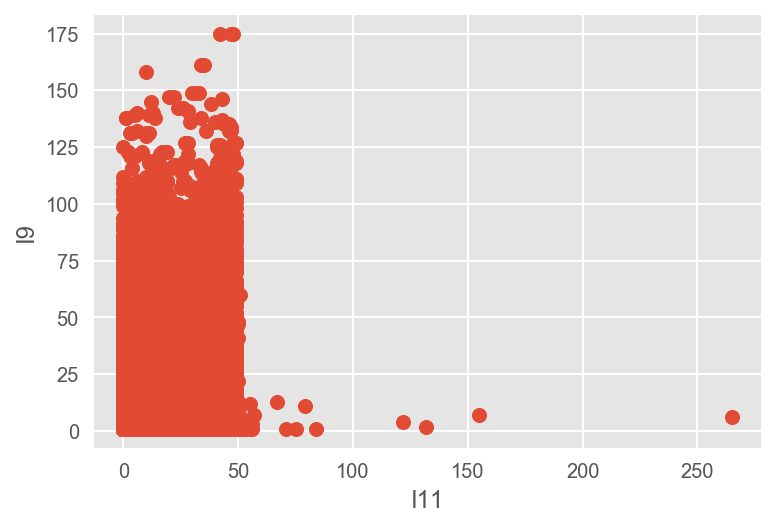

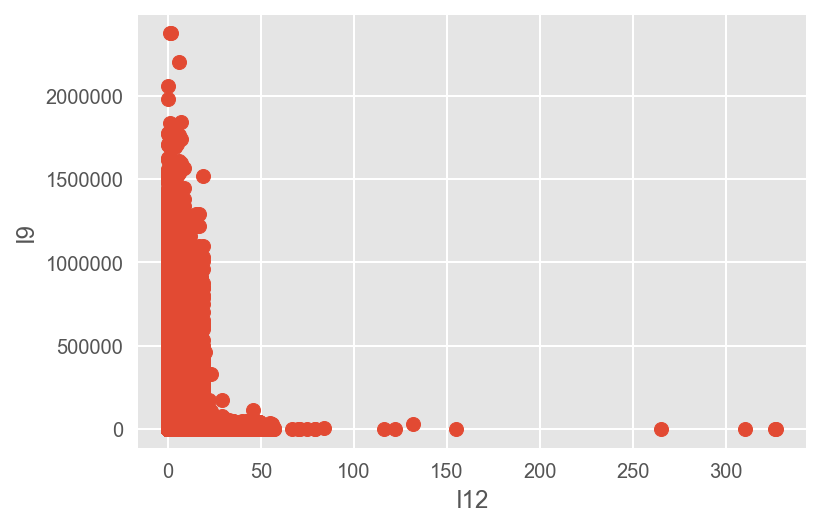

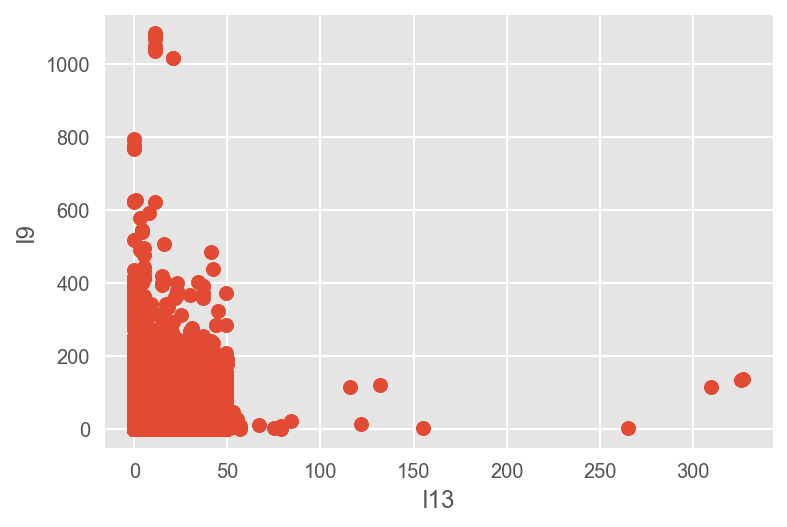

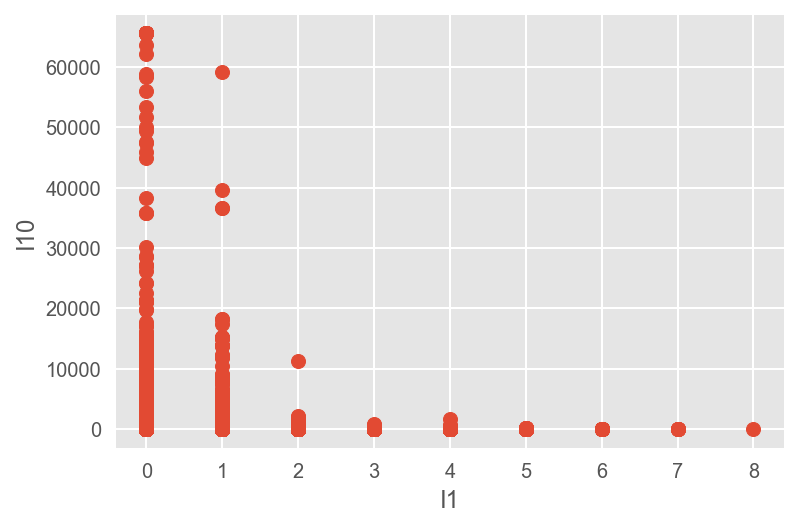

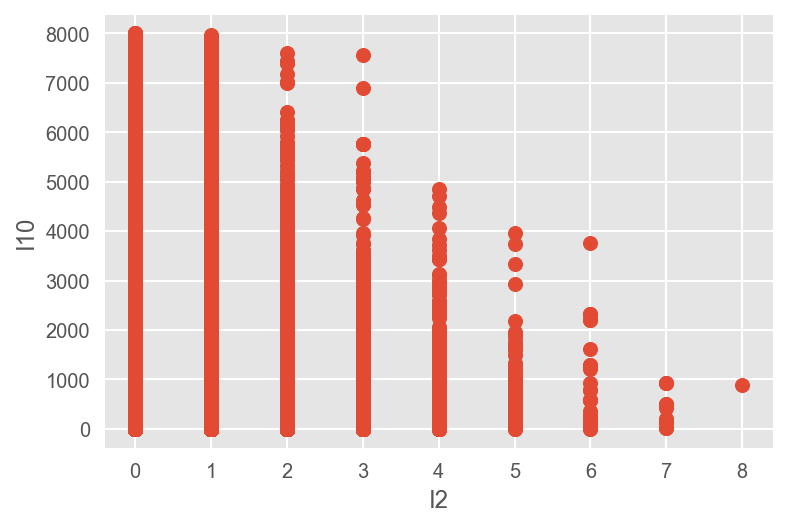

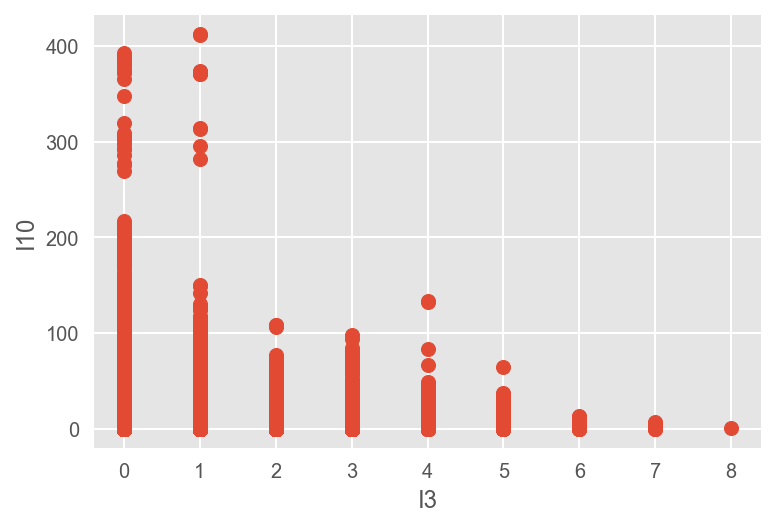

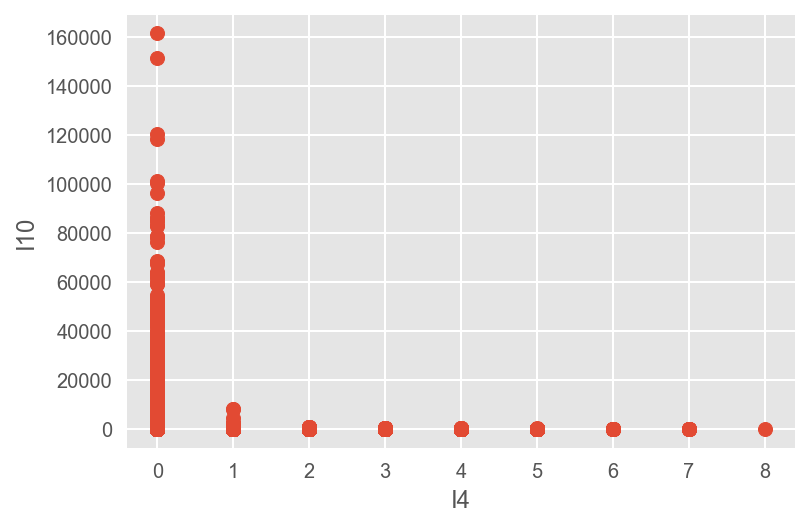

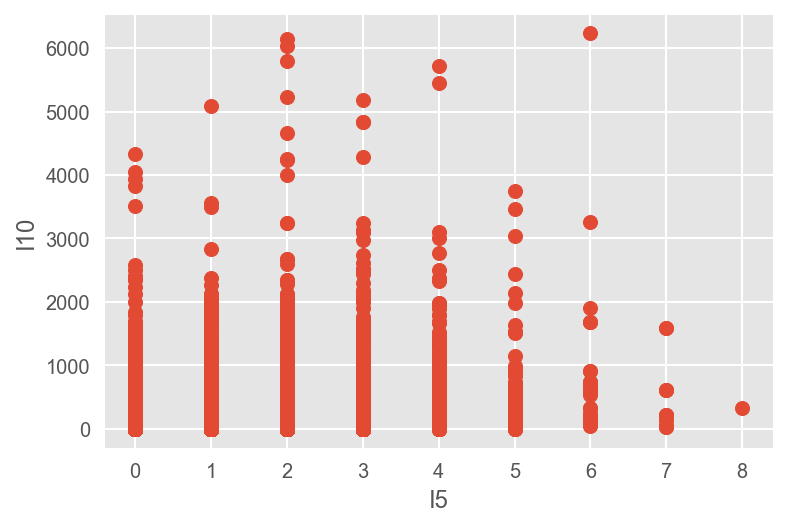

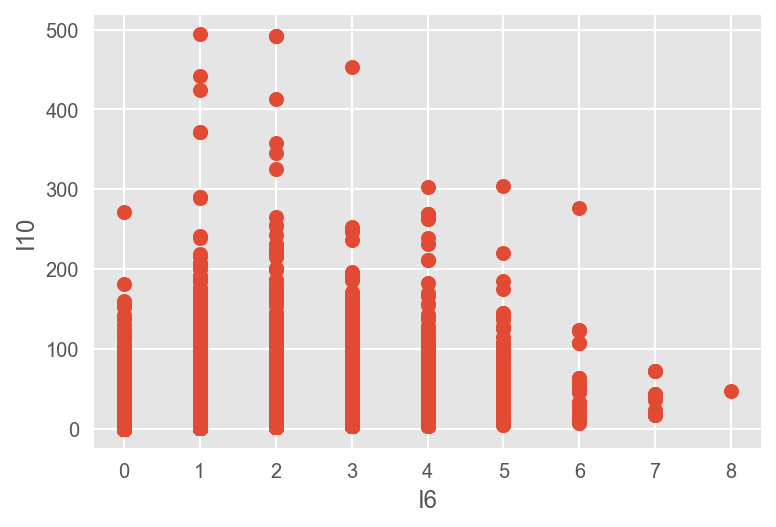

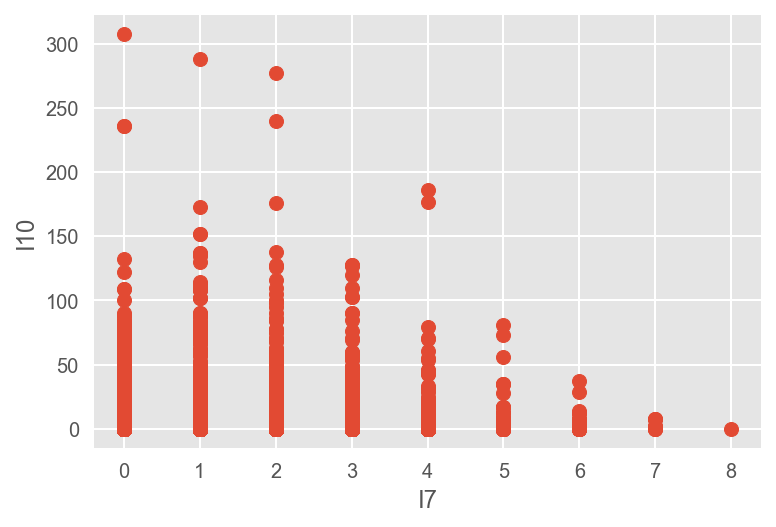

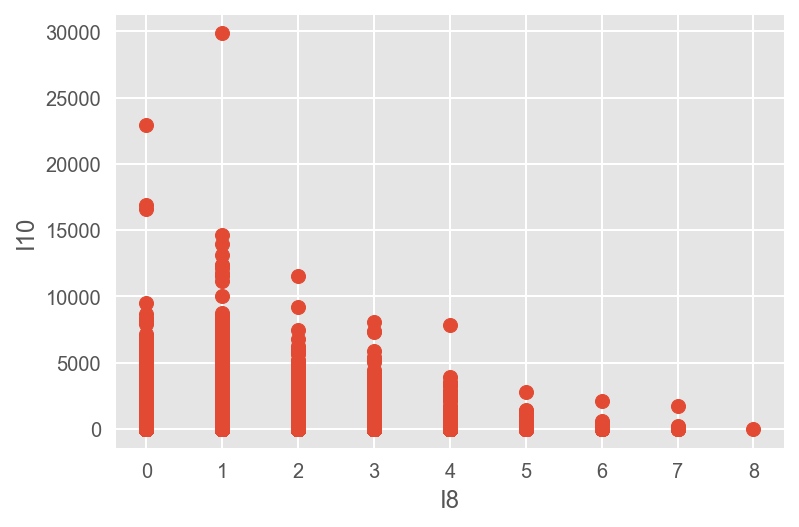

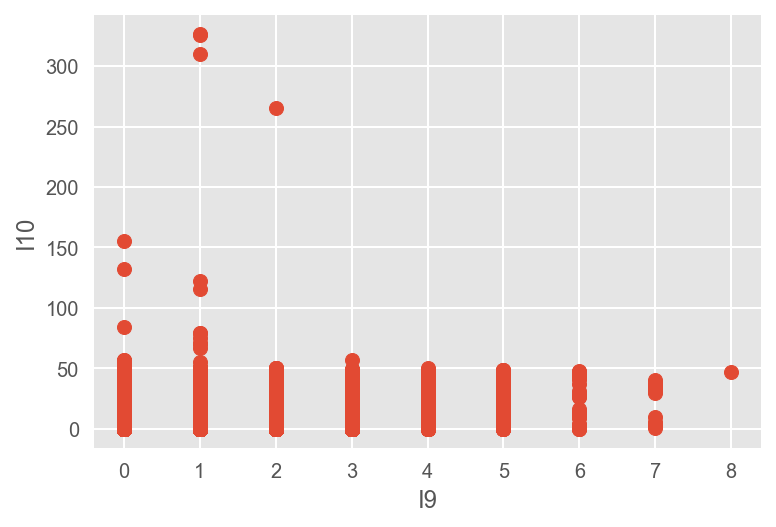

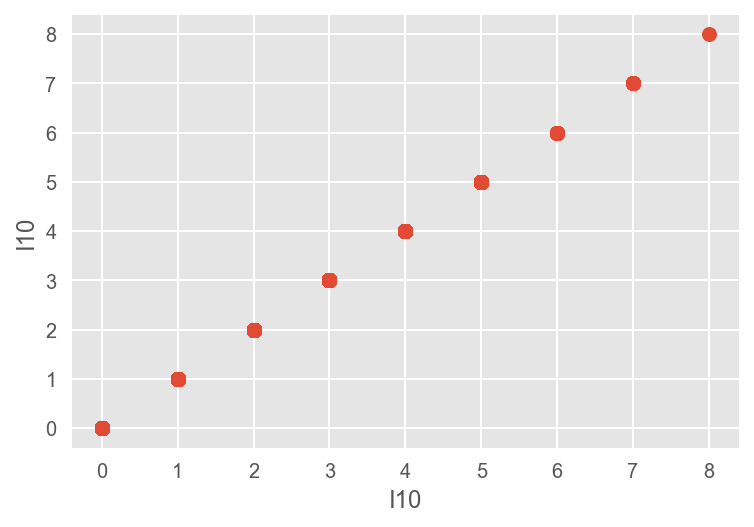

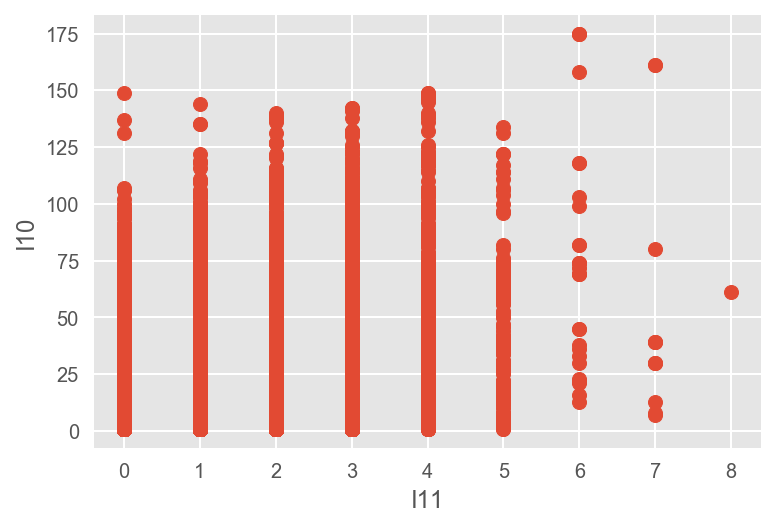

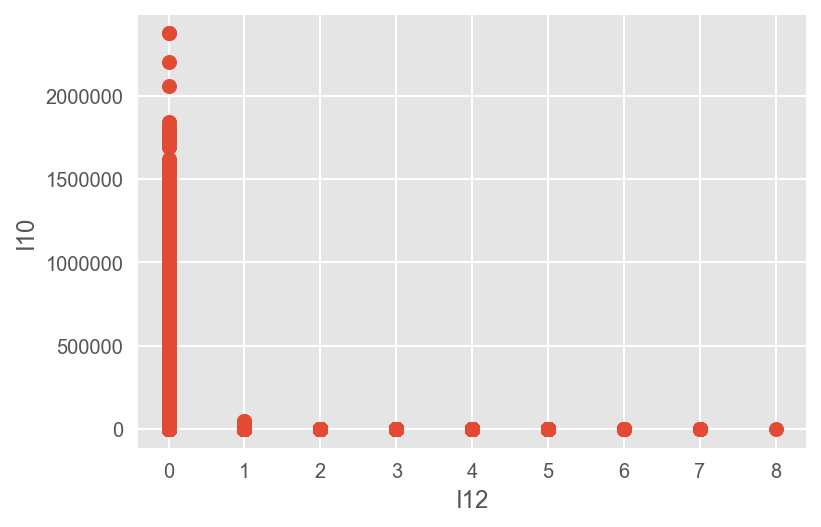

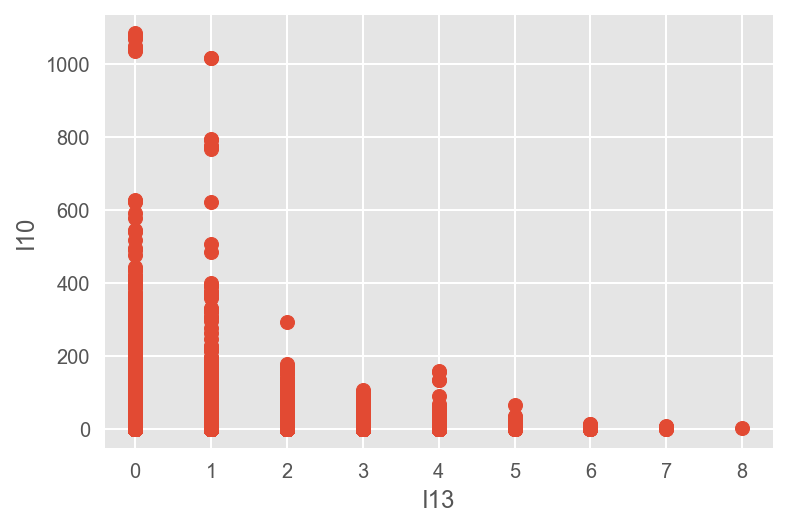

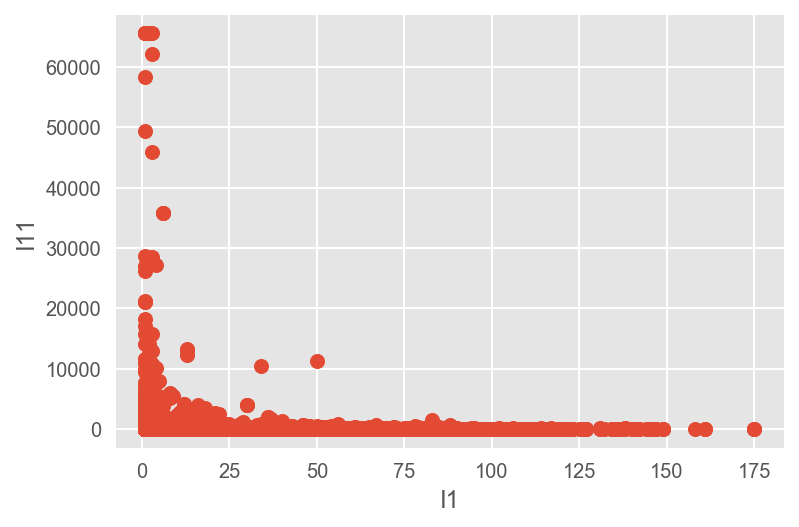

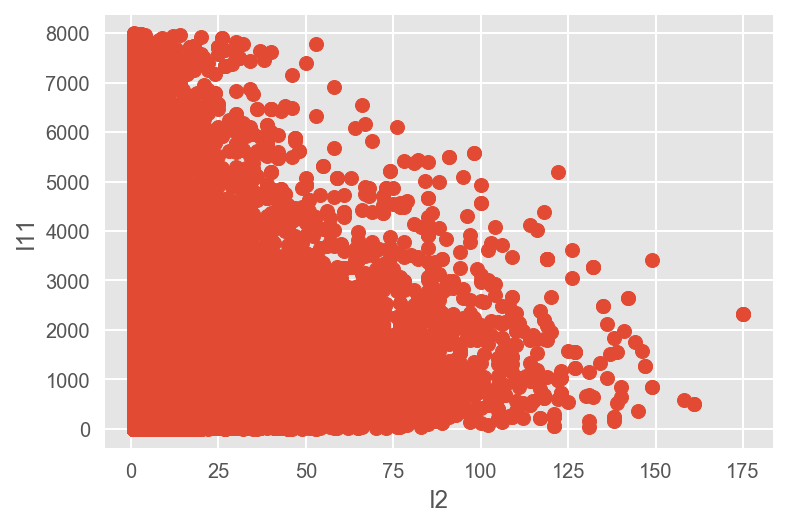

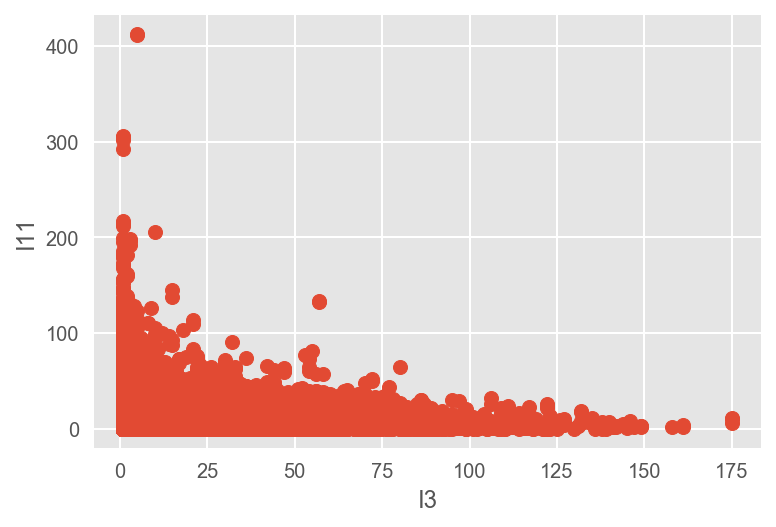

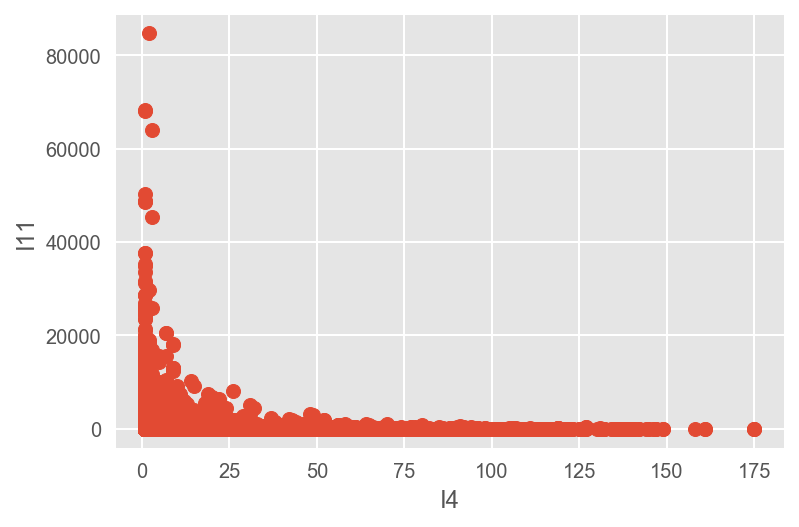

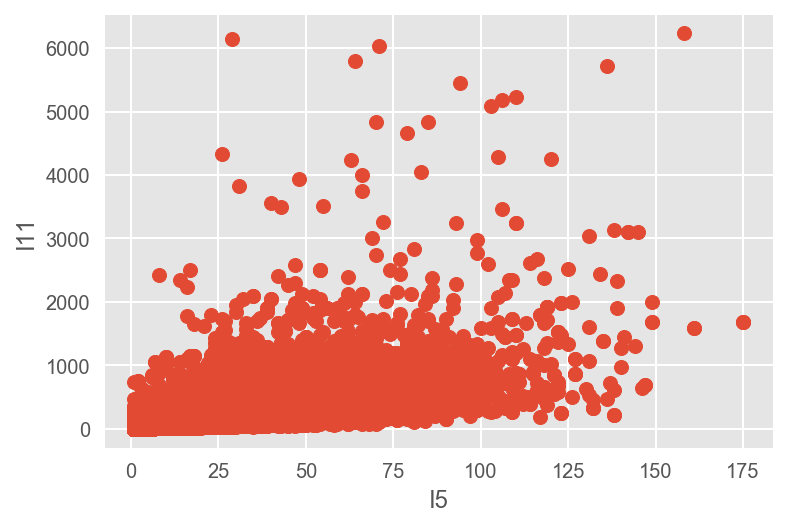

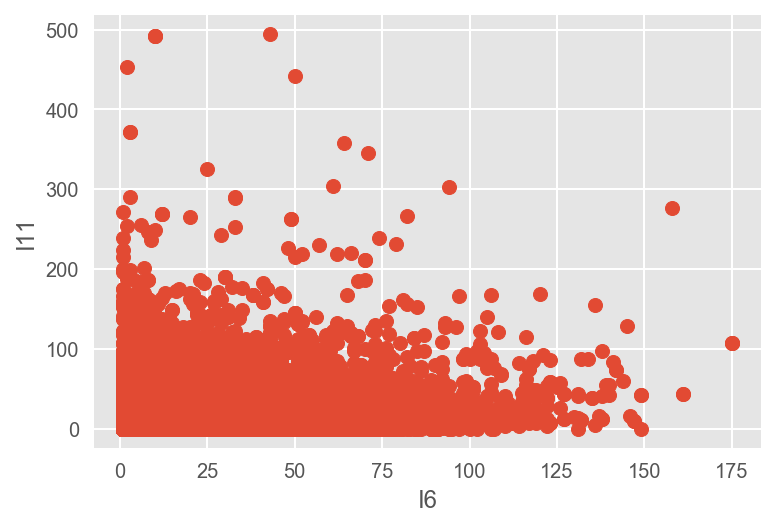

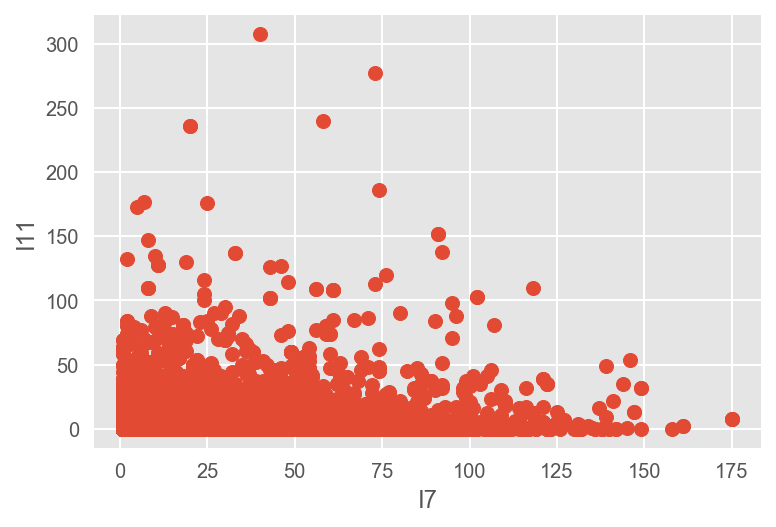

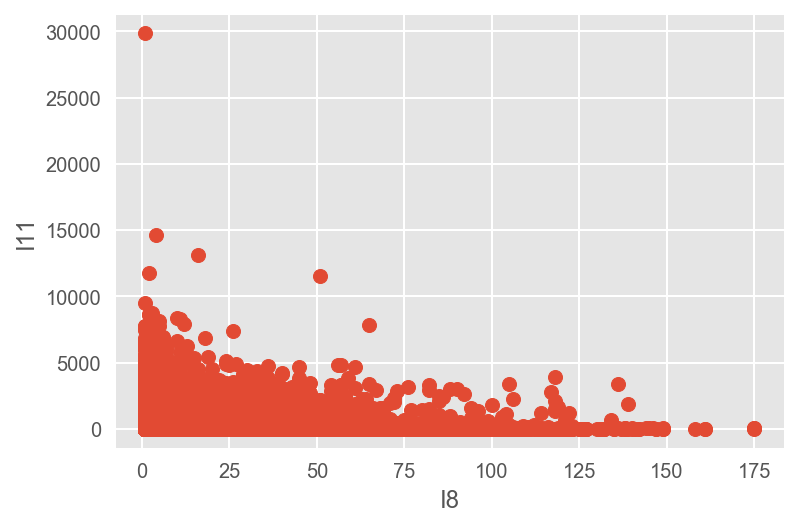

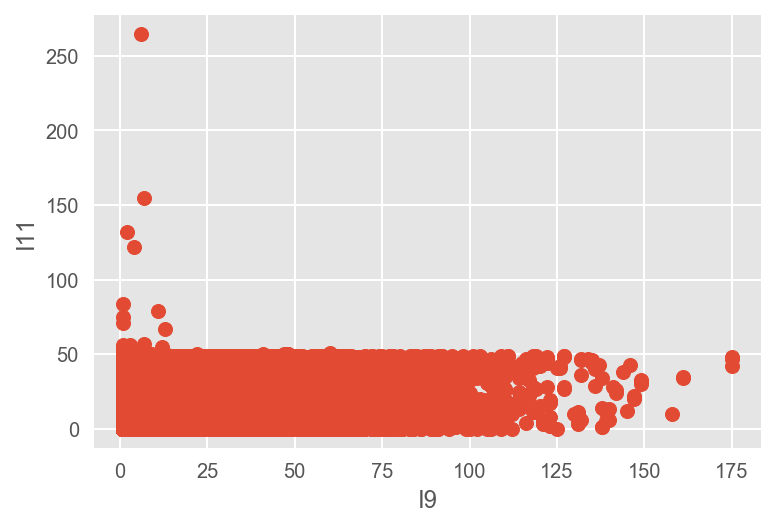

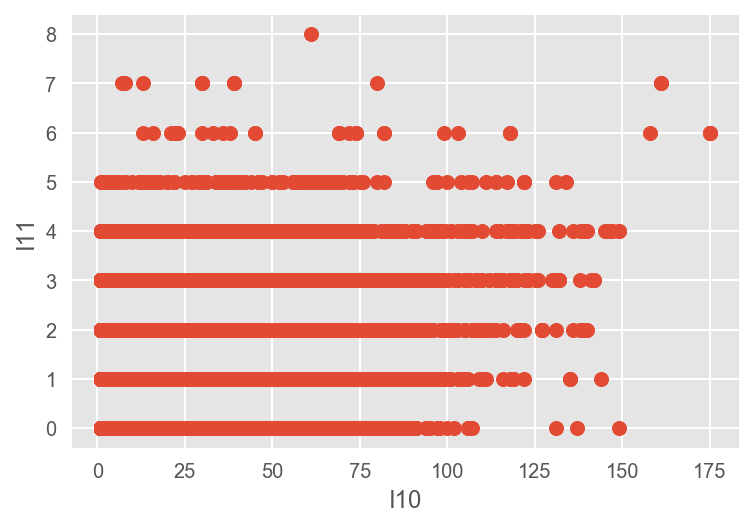

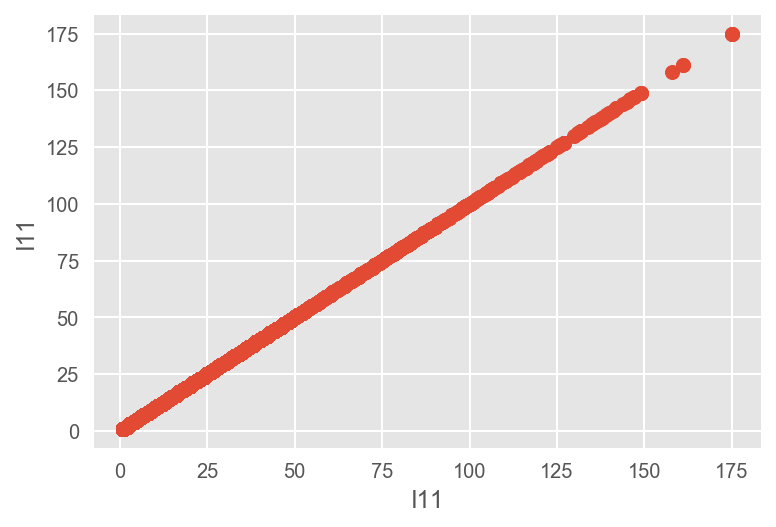

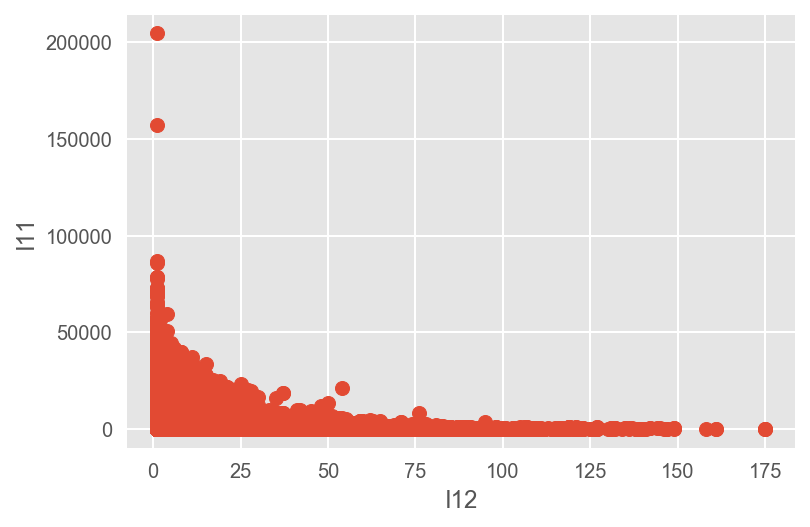

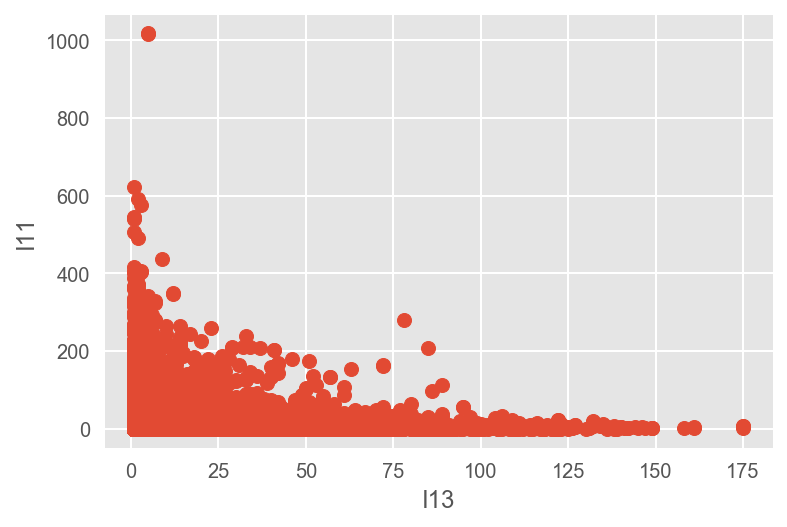

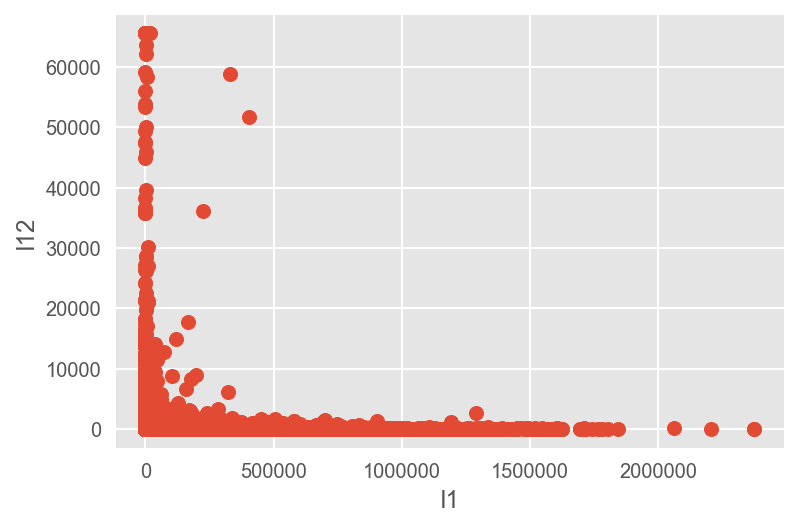

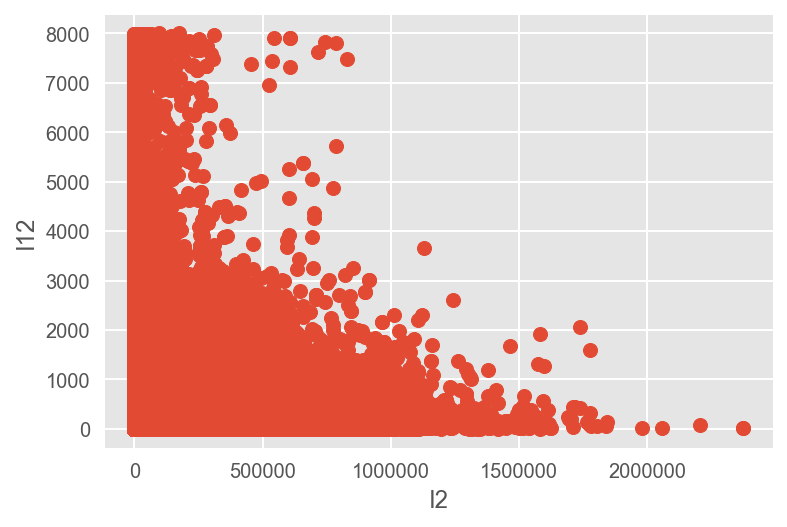

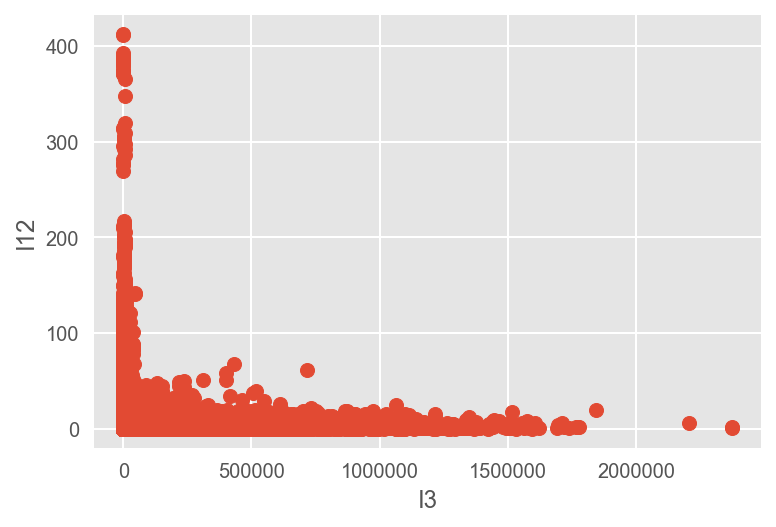

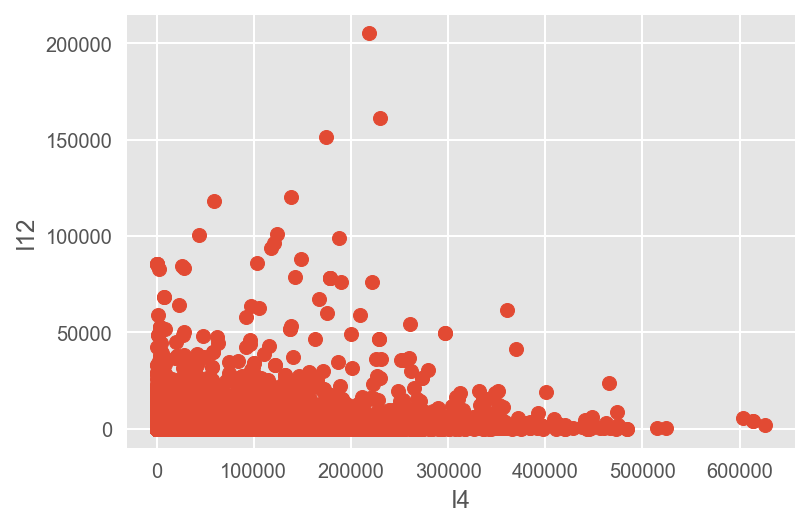

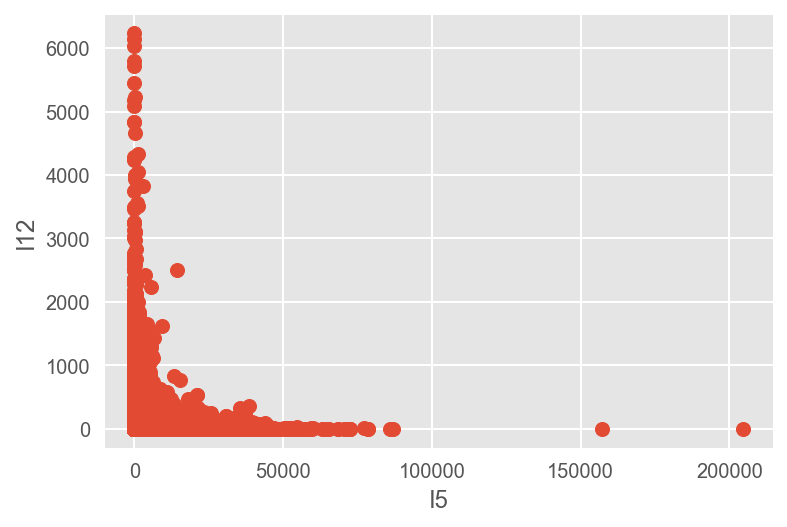

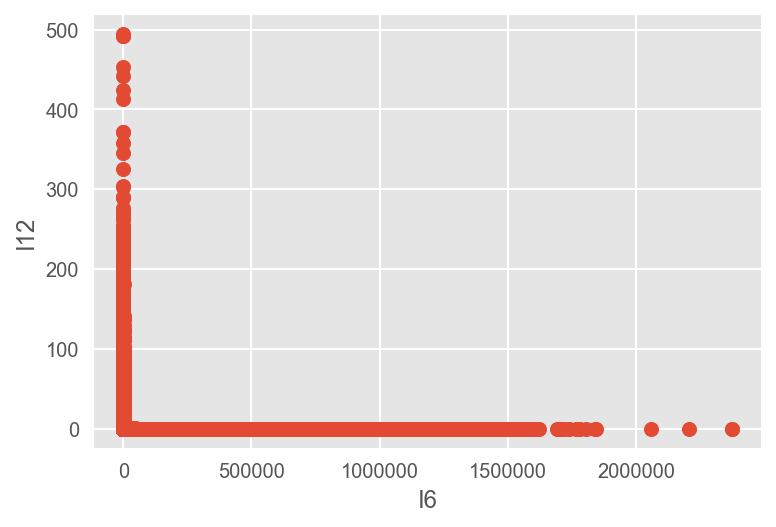

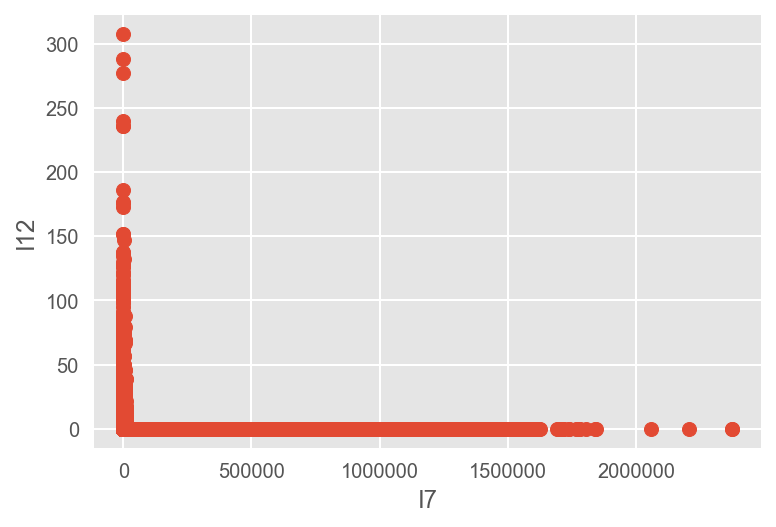

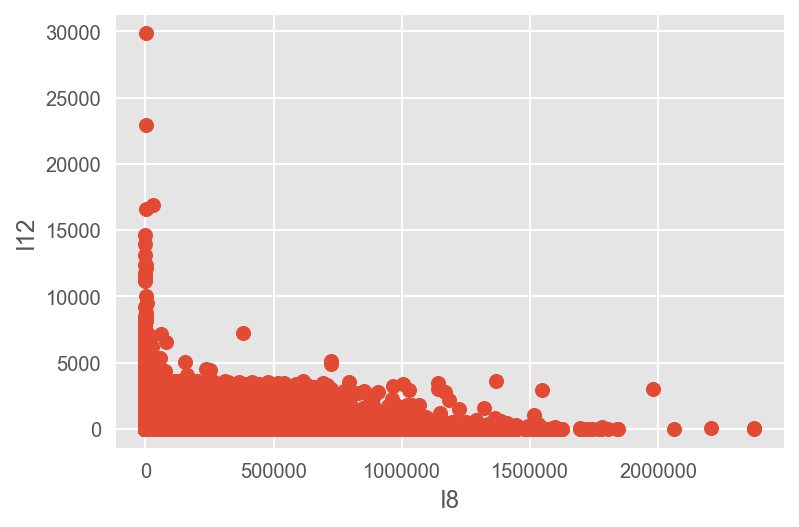

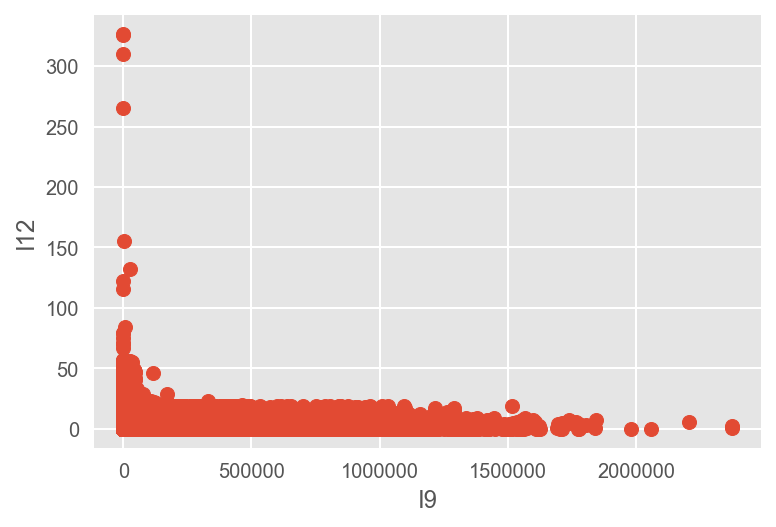

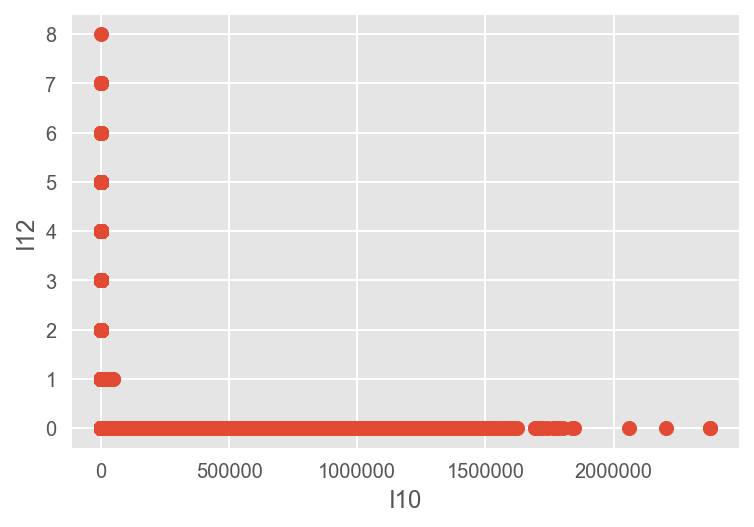

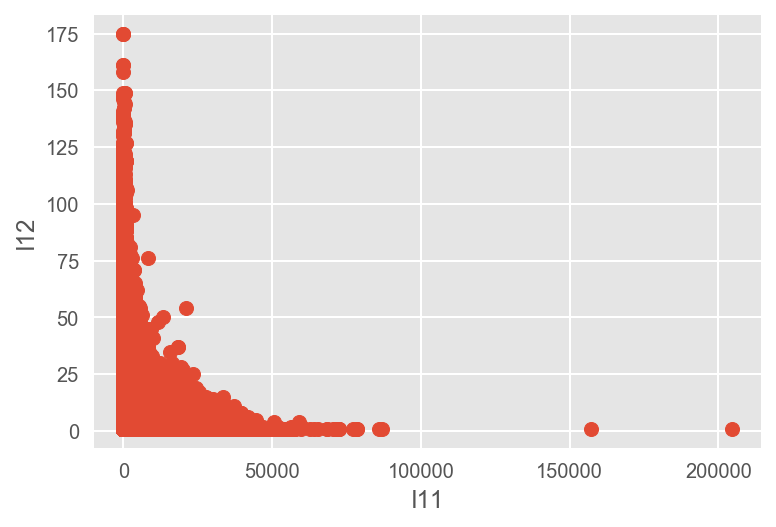

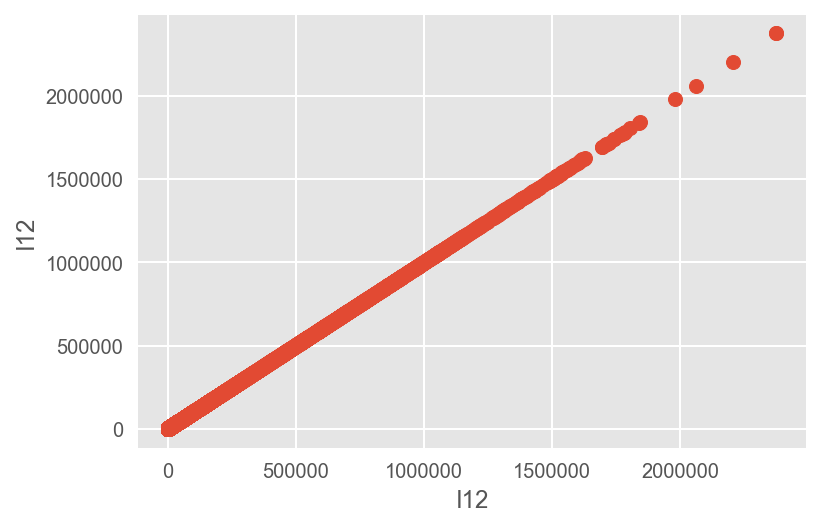

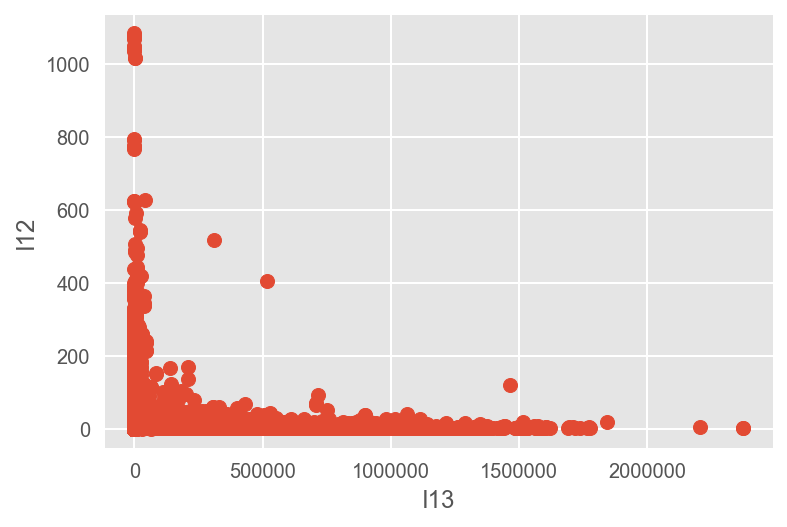

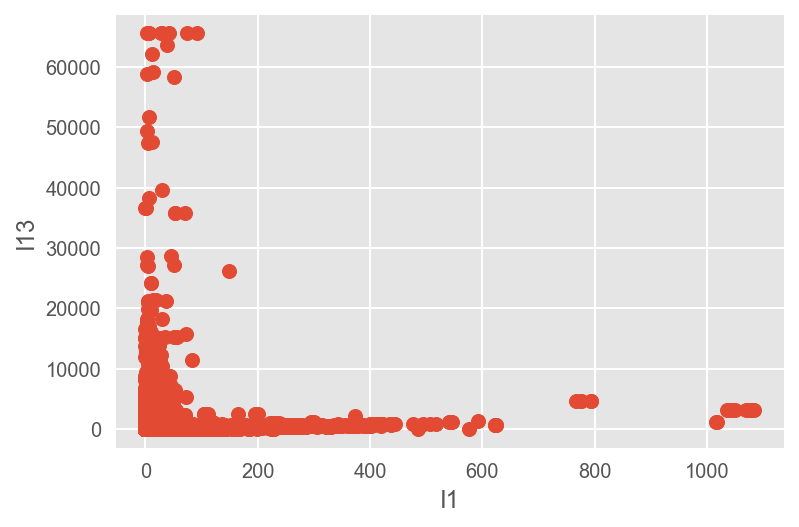

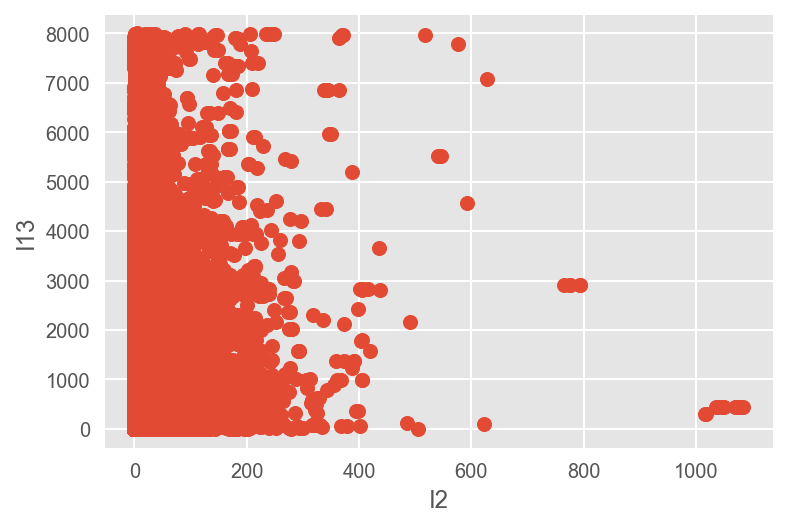

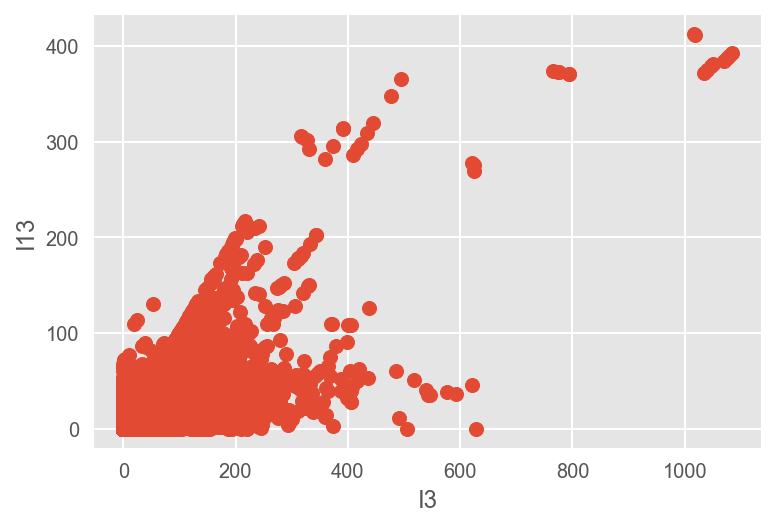

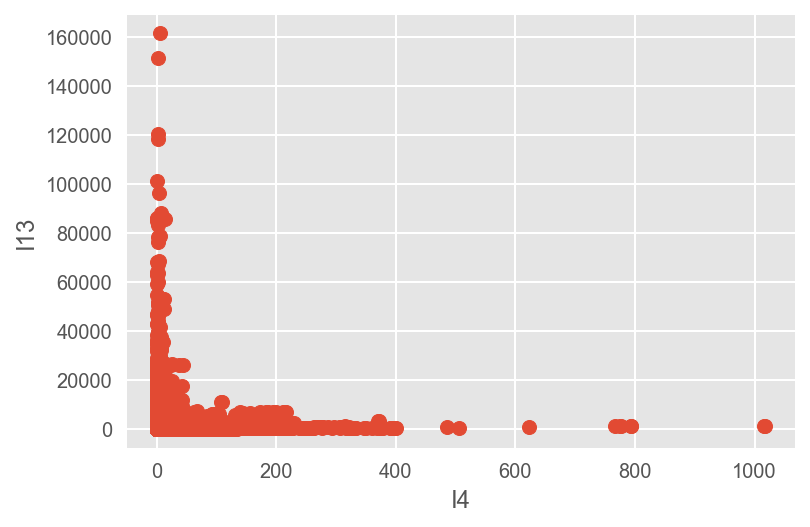

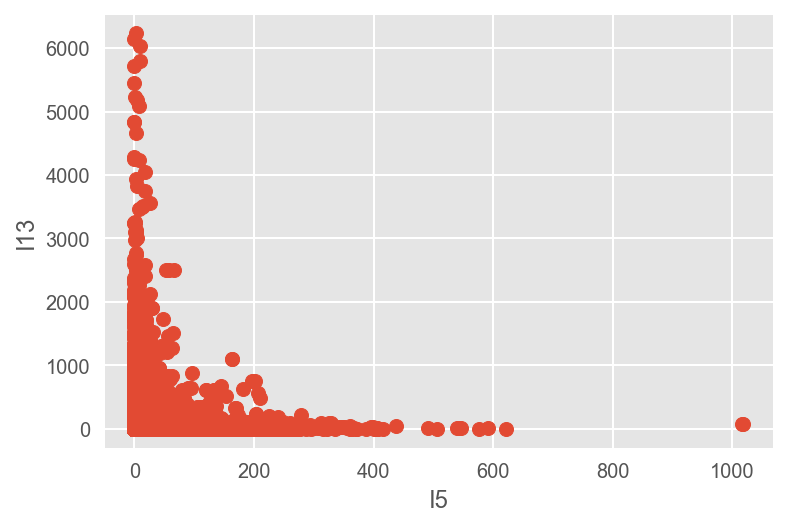

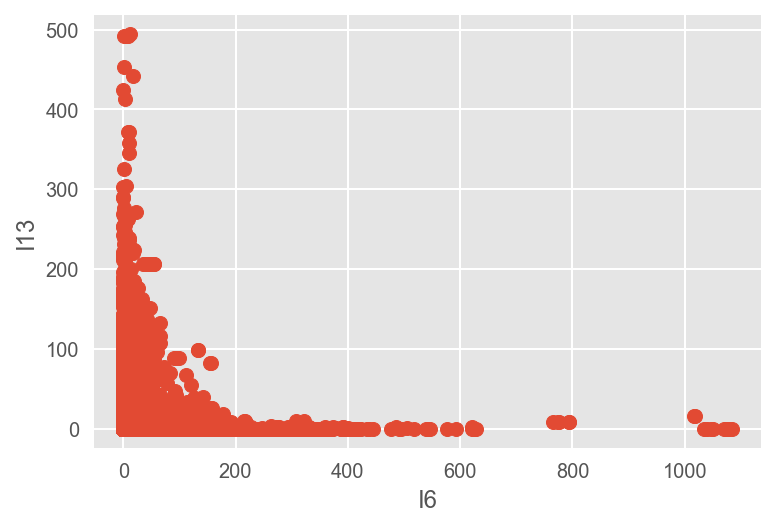

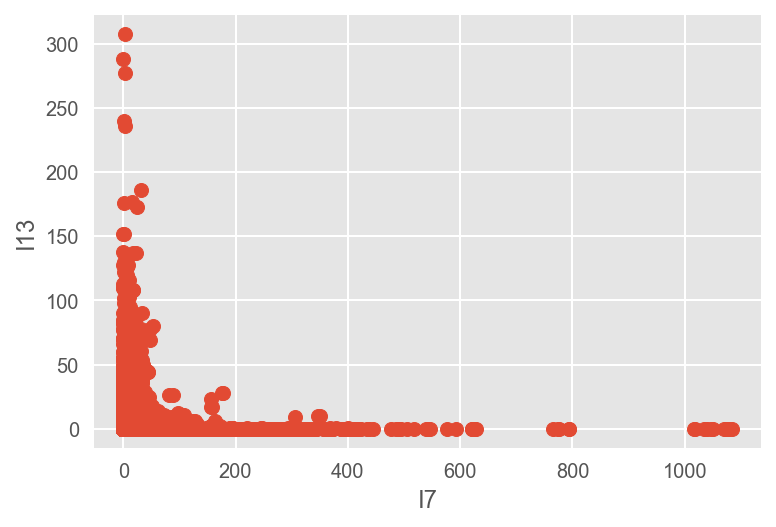

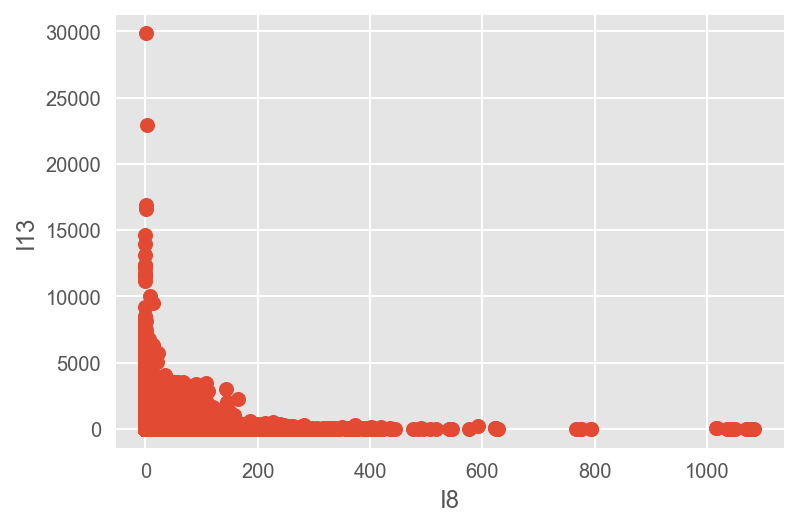

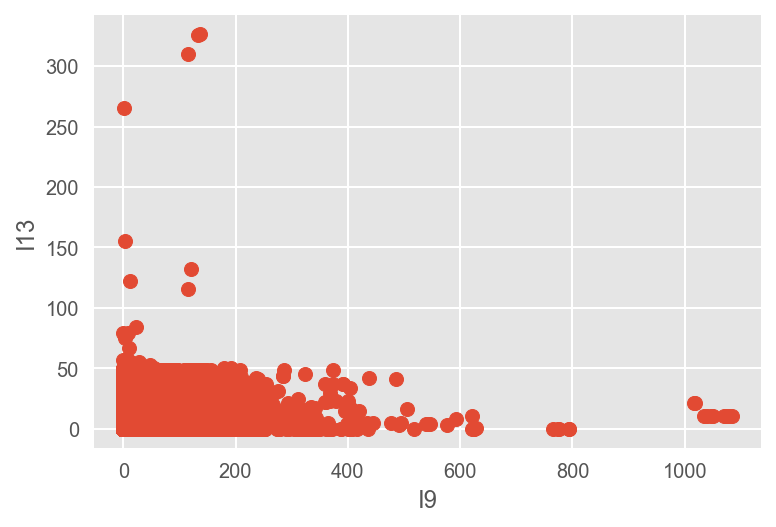

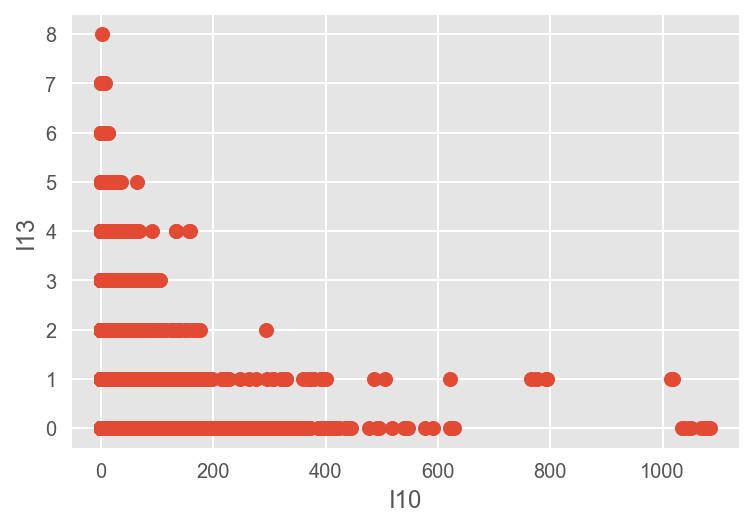

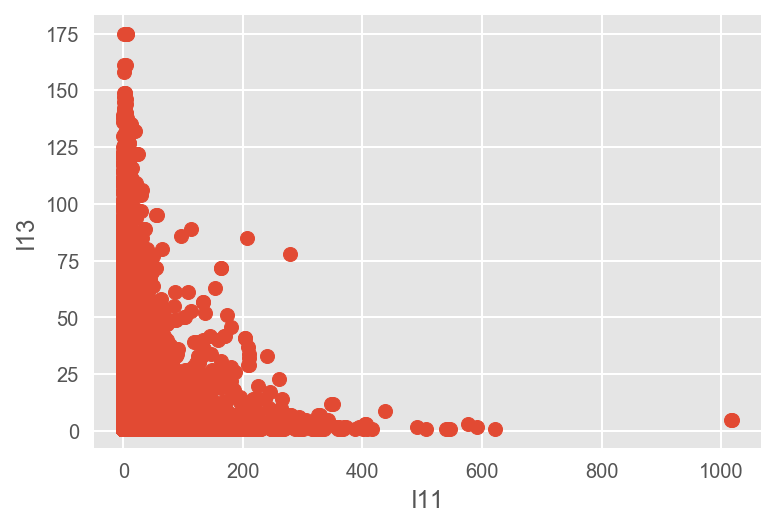

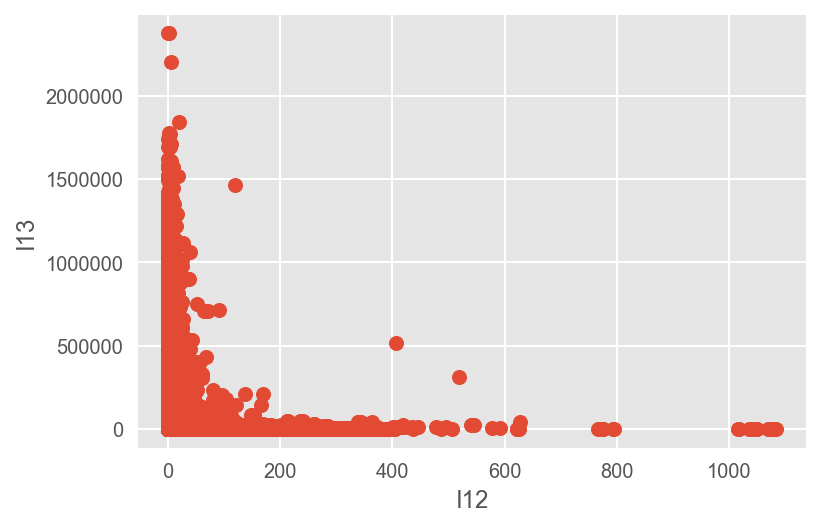

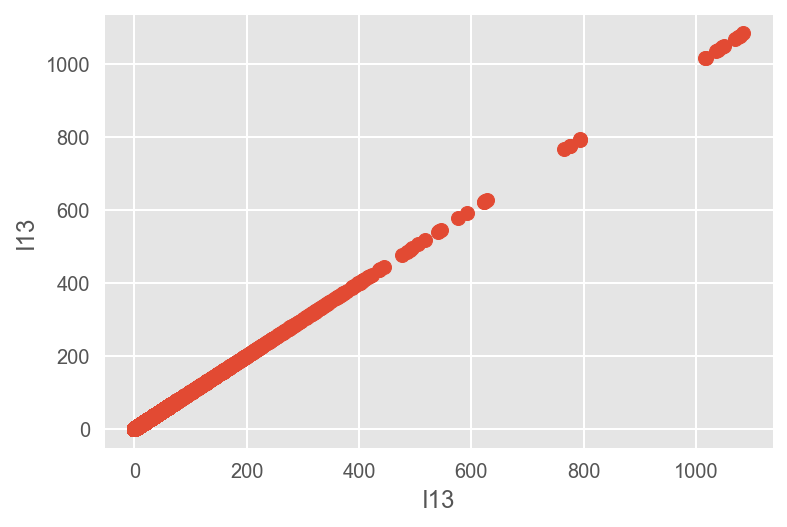

In [288]:
num_wo_label = day_21[int_cols]
for num in num_wo_label:
    for num2 in num_wo_label:
        plt.scatter(x=day_21[num], y=day_21[num2],)
        plt.ylabel(num)
        plt.xlabel(num2)
        plt.show()

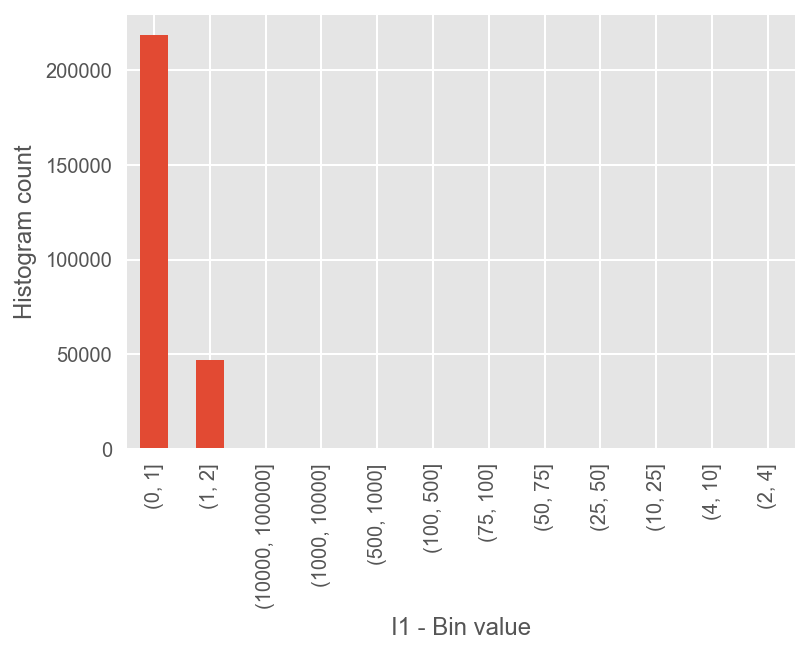

In [327]:
# Bin and plot col2 - Method #2
series = pd.Series(day_21['I1'])
bins   = pd.cut(series, [0, 1, 2, 4, 10, 25, 50, 75, 100, 500, 1000, 10000, 100000])
fig, ax = plt.subplots()
pd.Series(bins).value_counts().plot(kind='bar')
plt.xlabel('I1 - Bin value')
plt.ylabel('Histogram count')

In [ ]:
num_wo_label = day_21[int_cols]
for num in num_wo_label:
    for num2 in num_wo_label:
        sns.set_context("notebook", font_scale=1.1)
        sns.set_style("ticks")


        sns.lmplot(num, num2,
           data=day_21,
           fit_reg=False,
           dropna=True,
           hue="Label",  
           scatter_kws={"marker": "D",
                        "s": 100})
        plt.title('Histogram')
        plt.xlabel(num)
        plt.ylabel(num2)

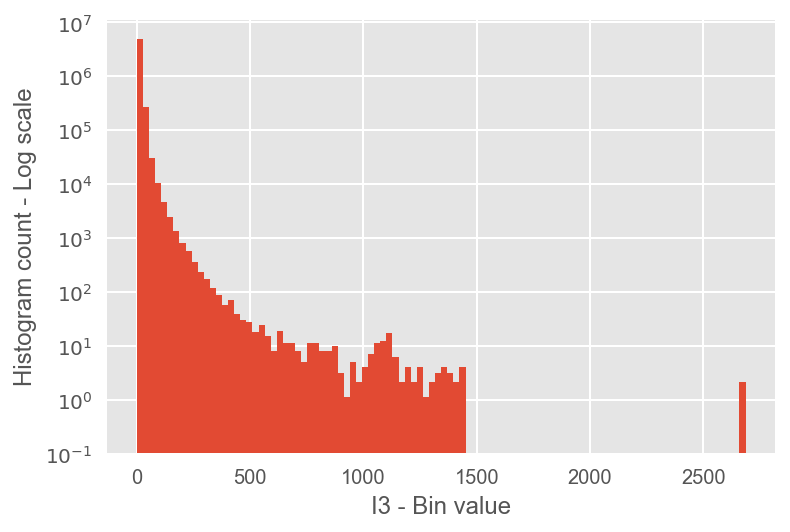

In [652]:
# Bin and plot col2 - Method #1
series = pd.Series(day_21['I13'])
fig, ax = plt.subplots()
series.hist(ax=ax, bins=100, bottom=0.1)
ax.set_yscale('log')
plt.xlabel('I3 - Bin value')
plt.ylabel('Histogram count - Log scale')

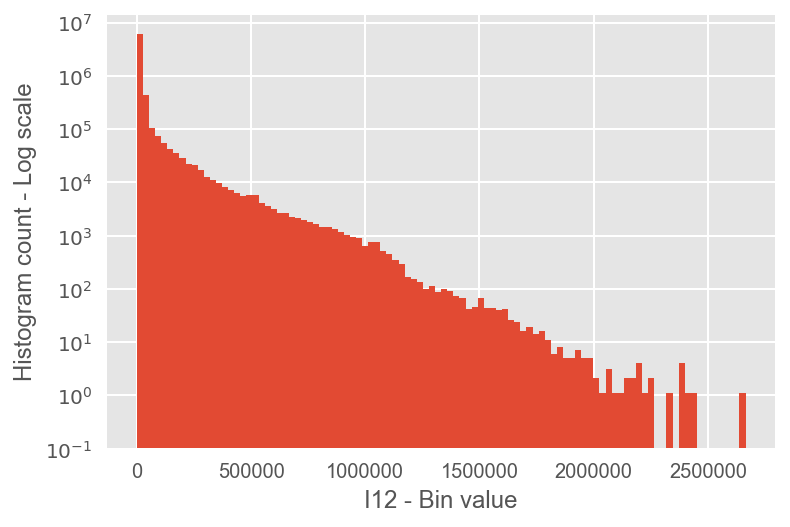

In [653]:
# Bin and plot col2 - Method #1
series = pd.Series(day_21['I12'])
fig, ax = plt.subplots()
series.hist(ax=ax, bins=100, bottom=0.1)
ax.set_yscale('log')
plt.xlabel('I12 - Bin value')
plt.ylabel('Histogram count - Log scale')

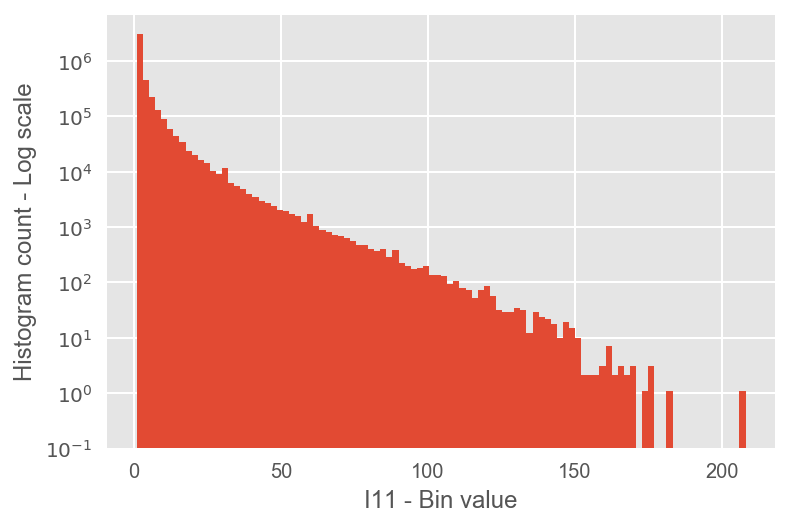

In [654]:
# Bin and plot col2 - Method #1
series = pd.Series(day_21['I11'])
fig, ax = plt.subplots()
series.hist(ax=ax, bins=100, bottom=0.1)
ax.set_yscale('log')
plt.xlabel('I11 - Bin value')
plt.ylabel('Histogram count - Log scale')

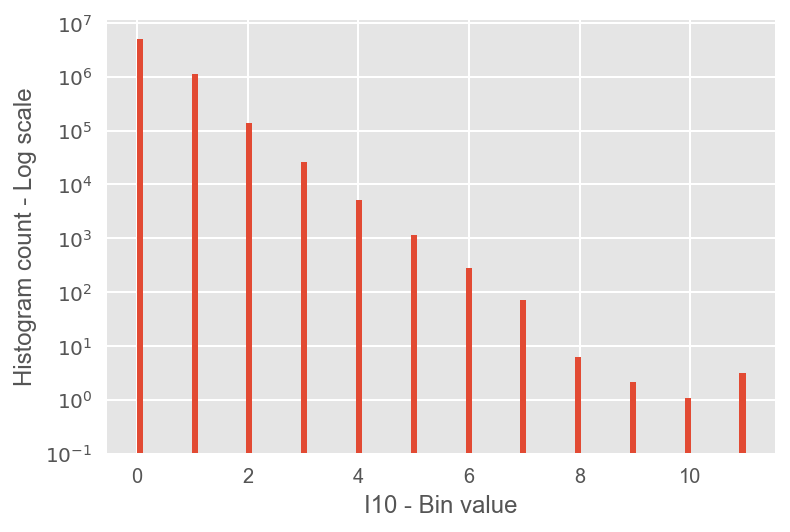

In [655]:
# Bin and plot col2 - Method #1
series = pd.Series(day_21['I10'])
fig, ax = plt.subplots()
series.hist(ax=ax, bins=100, bottom=0.1)
ax.set_yscale('log')
plt.xlabel('I10 - Bin value')
plt.ylabel('Histogram count - Log scale')

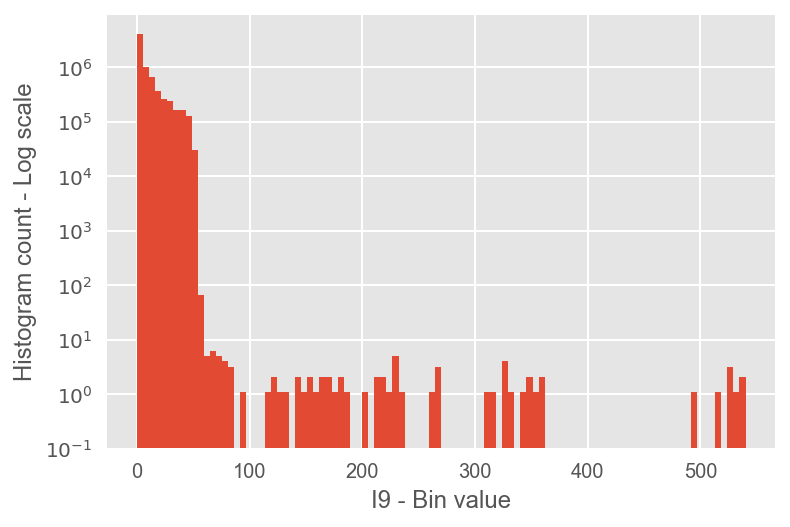

In [656]:
# Bin and plot col2 - Method #1
series = pd.Series(day_21['I9'])
fig, ax = plt.subplots()
series.hist(ax=ax, bins=100, bottom=0.1)
ax.set_yscale('log')
plt.xlabel('I9 - Bin value')
plt.ylabel('Histogram count - Log scale')

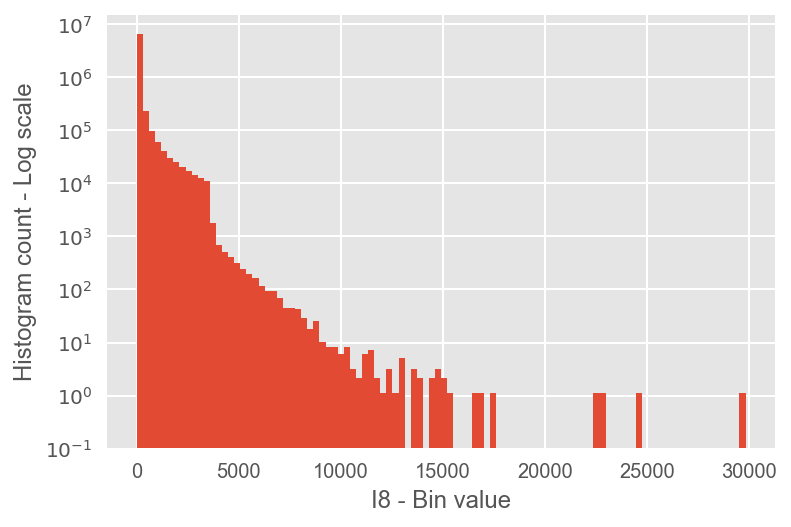

In [657]:
# Bin and plot col2 - Method #1
series = pd.Series(day_21['I8'])
fig, ax = plt.subplots()
series.hist(ax=ax, bins=100, bottom=0.1)
ax.set_yscale('log')
plt.xlabel('I8 - Bin value')
plt.ylabel('Histogram count - Log scale')

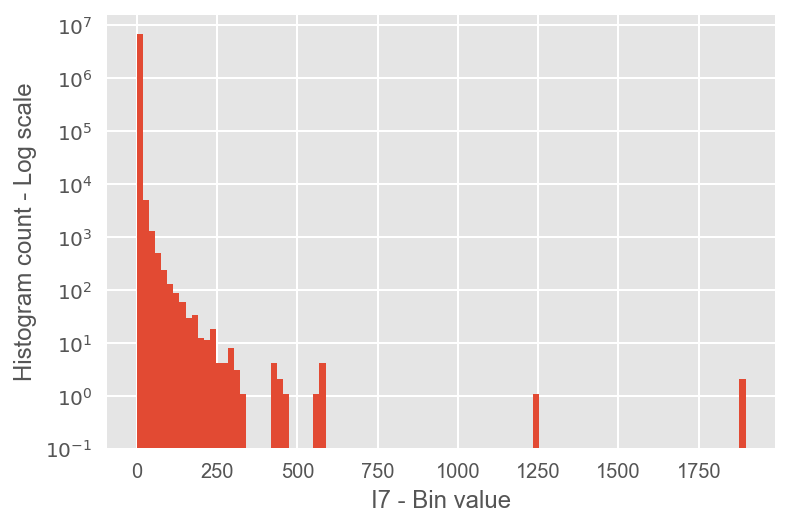

In [658]:
# Bin and plot col2 - Method #1
series = pd.Series(day_21['I7'])
fig, ax = plt.subplots()
series.hist(ax=ax, bins=100, bottom=0.1)
ax.set_yscale('log')
plt.xlabel('I7 - Bin value')
plt.ylabel('Histogram count - Log scale')

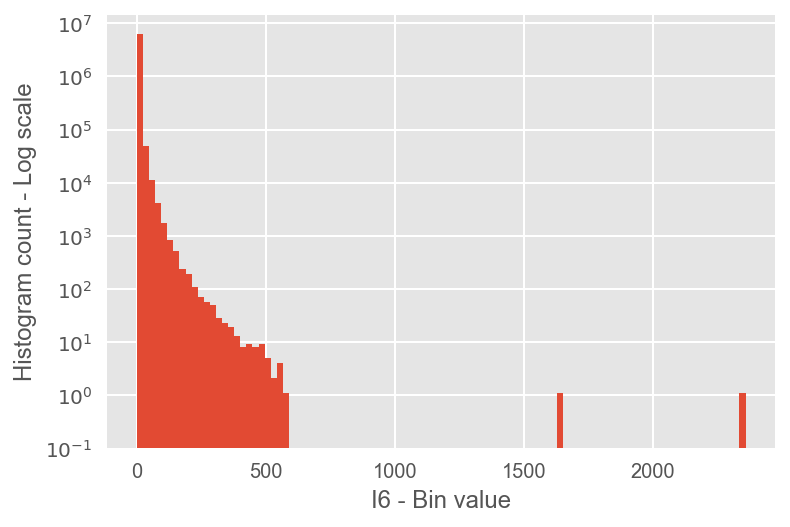

In [659]:
# Bin and plot col2 - Method #1
series = pd.Series(day_21['I6'])
fig, ax = plt.subplots()
series.hist(ax=ax, bins=100, bottom=0.1)
ax.set_yscale('log')
plt.xlabel('I6 - Bin value')
plt.ylabel('Histogram count - Log scale')

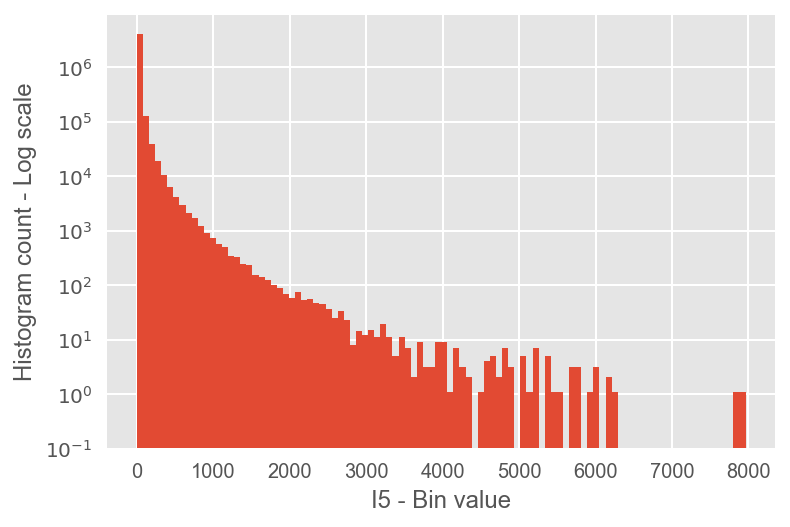

In [660]:
# Bin and plot col2 - Method #1
series = pd.Series(day_21['I5'])
fig, ax = plt.subplots()
series.hist(ax=ax, bins=100, bottom=0.1)
ax.set_yscale('log')
plt.xlabel('I5 - Bin value')
plt.ylabel('Histogram count - Log scale')

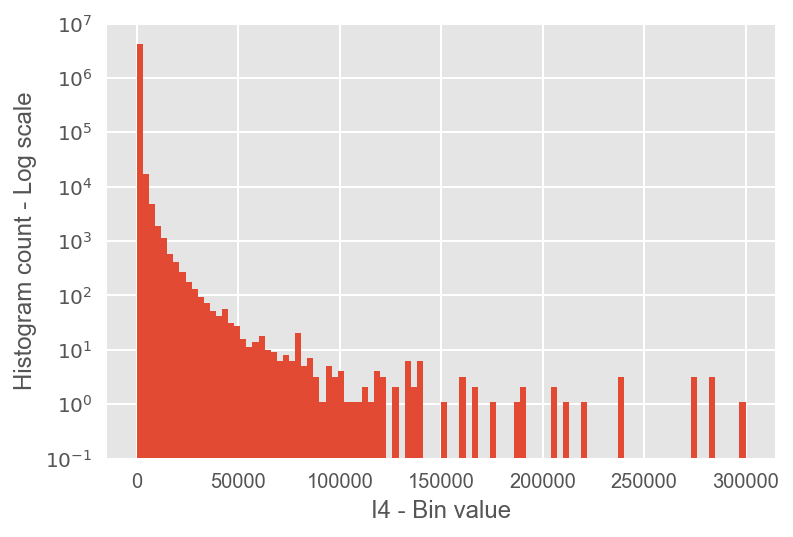

In [661]:
# Bin and plot col2 - Method #1
series = pd.Series(day_21['I4'])
fig, ax = plt.subplots()
series.hist(ax=ax, bins=100, bottom=0.1)
ax.set_yscale('log')
plt.xlabel('I4 - Bin value')
plt.ylabel('Histogram count - Log scale')

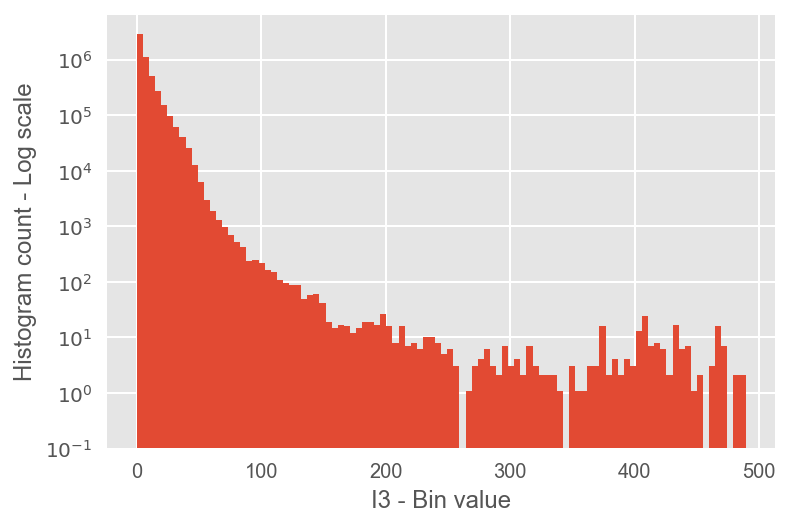

In [662]:
# Bin and plot I4 - Method #1
series = pd.Series(day_21['I3'])
fig, ax = plt.subplots()
series.hist(ax=ax, bins=100, bottom=0.1)
ax.set_yscale('log')
plt.xlabel('I3 - Bin value')
plt.ylabel('Histogram count - Log scale')

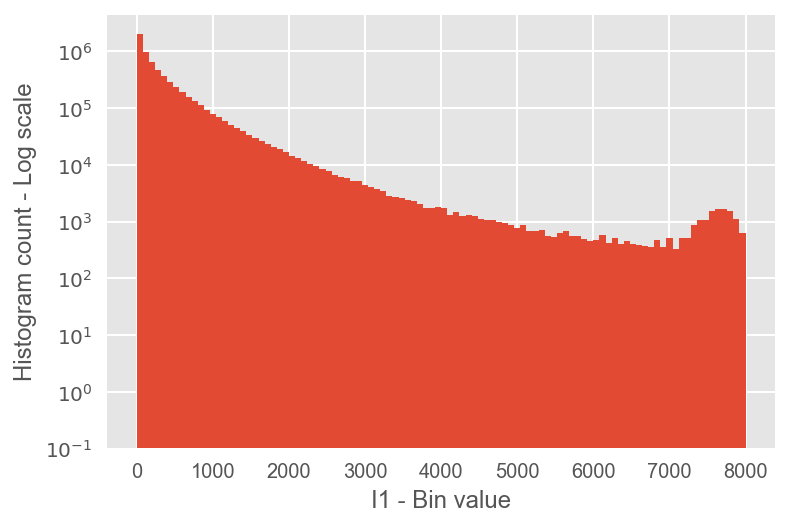

In [651]:
# Bin and plot I2 - Method #1
series = pd.Series(day_21['I2'])
fig, ax = plt.subplots()
series.hist(ax=ax, bins=100, bottom=0.1)
ax.set_yscale('log')
plt.xlabel('I2 - Bin value')
plt.ylabel('Histogram count - Log scale')

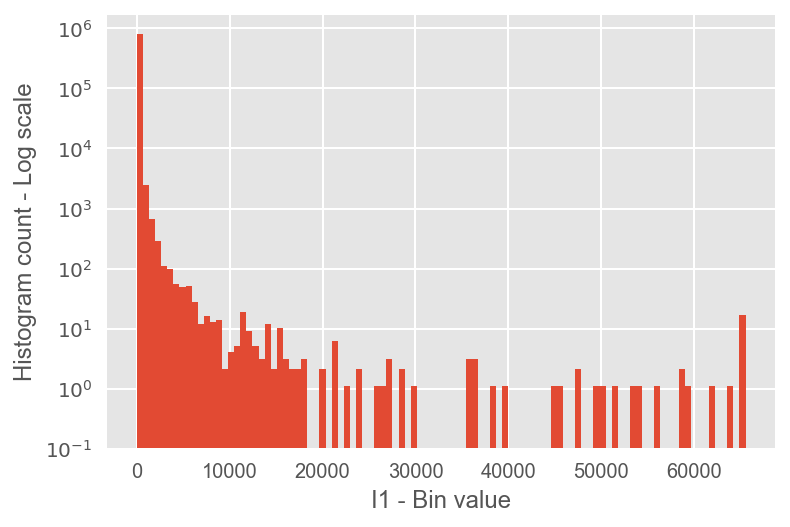

In [133]:
# Bin and plot col2 - Method #1
series = pd.Series(day_21['I1'])
fig, ax = plt.subplots()
series.hist(ax=ax, bins=100, bottom=0.1)
ax.set_yscale('log')
plt.xlabel('I1 - Bin value')
plt.ylabel('Histogram count - Log scale')

In [7]:
## prints out only numerical type columns
numeric_features = day_21.select_dtypes(include=[np.number])
numeric_features.dtypes

Label      int64
I1       float64
I2       float64
I3       float64
I4       float64
I5       float64
I6       float64
I7       float64
I8         int64
I9         int64
I10      float64
I11      float64
I12      float64
I13      float64
dtype: object

In [9]:
## Lists the top correclated features
corr = numeric_features.corr()

print (corr['Label'].sort_values(ascending=False)[:5], '\n')
print (corr['Label'].sort_values(ascending=False)[-5:])

(Label    1.000000
I11      0.070073
I10      0.069996
I5       0.042716
I6       0.040032
Name: Label, dtype: float64, '\n')
I1    -0.006017
I4    -0.016188
I3    -0.019200
I12   -0.029399
I13   -0.029878
Name: Label, dtype: float64


In [167]:
## number of unique values per total column count
def df_unique_percent(df):
    print 'shape: %d rows, %d cols\n' % df.shape 
    total = df.shape[0]
    print 'column info:'
    for col in df.columns:
        total_nun = df[col].nunique()
        nun_percent = (float(total_nun)/total) * 100.0
        print '* %s: %d unique vals, %d percent unique' % (
            col, 
            df[col].nunique(),
            nun_percent
            
        )
    print '\n------\n'

In [168]:
cat_freq(day_21)


Frequency of Categories for varible C1
ad98e872    229083
265366bf    112464
788a5d5b     34169
e5f3fd8d     31321
4f50727e     10024
62770d79      8115
8a2b1e43      7990
f669a734      6594
a549d9ac      6394
91c3c8e0      6140
217db914      4864
8680925a      4777
a97d405b      4726
f7f317e1      4323
6f88737d      4310
b2d27a4e      3974
76c16bc0      3525
b401509b      2479
0bfe8193      2131
527e5906      2126
a5ba1c3d      2096
f7c21cb6      2047
6b3aae3e      1972
161d5336      1756
372034f9      1691
fb1d0a50      1609
1ddd5ac8      1565
ad09fe24      1501
1a6c0e94      1488
0d8d1997      1390
             ...  
419666b3         1
1e6b56b8         1
460d910c         1
a1ada75b         1
2597e4a8         1
7f7ebe15         1
b16ed535         1
fdf51461         1
8ef401d2         1
d6594116         1
68ae8284         1
e7cf79d9         1
a0bba916         1
489dbec9         1
7ff0c41b         1
a476319d         1
7d8c9d8e         1
e0998dea         1
203cf321         1
3adc5f14  

In [169]:
## Nulls, unique values and most common of each column
df_counts(day_21)

shape: 1000000 rows, 40 cols

column info:
* Label: 0 nulls, 2 unique vals, most common: {0: 969300, 1: 30700}
* I1: 201272 nulls, 2457 unique vals, most common: {-0.36651292058166435: 79893, -inf: 118259}
* I2: 99652 nulls, 5900 unique vals, most common: {0.0: 10716, 0.69314718055994529: 8548}
* I3: 269735 nulls, 211 unique vals, most common: {0.0: 136895, 0.69314718055994529: 100649}
* I4: 409300 nulls, 5878 unique vals, most common: {0.0: 17973, -inf: 31958}
* I5: 411764 nulls, 1279 unique vals, most common: {0.0: 105166, 0.69314718055994529: 70098}
* I6: 112477 nulls, 226 unique vals, most common: {0.0: 66932, -inf: 681927}
* I7: 34771 nulls, 123 unique vals, most common: {0.0: 32735, -inf: 912601}
* I8: 70044 nulls, 4138 unique vals, most common: {0.0: 129520, -inf: 178130}
* I9: 0 nulls, 72 unique vals, most common: {0.0: 95818, -inf: 238161}
* I10: 112477 nulls, 9 unique vals, most common: {0.0: 159038, -inf: 704414}
* I11: 411764 nulls, 146 unique vals, most common: {0.0: 25416

In [ ]:
## This calculates the percentage of null values
df_null_percent(day_21)

In [127]:
## This calculates the percentage of unique values
df_unique_percent(day_21)

shape: 1000000 rows, 40 cols

column info:
* Label: 2 unique vals, 0 percent unique
* I1: 2457 unique vals, 0 percent unique
* I2: 5900 unique vals, 0 percent unique
* I3: 211 unique vals, 0 percent unique
* I4: 5878 unique vals, 0 percent unique
* I5: 1279 unique vals, 0 percent unique
* I6: 226 unique vals, 0 percent unique
* I7: 123 unique vals, 0 percent unique
* I8: 4139 unique vals, 0 percent unique
* I9: 72 unique vals, 0 percent unique
* I10: 9 unique vals, 0 percent unique
* I11: 146 unique vals, 0 percent unique
* I12: 92827 unique vals, 9 percent unique
* I13: 371 unique vals, 0 percent unique
* C1: 193263 unique vals, 19 percent unique
* C2: 13310 unique vals, 1 percent unique
* C3: 11906 unique vals, 1 percent unique
* C4: 6451 unique vals, 0 percent unique
* C5: 17117 unique vals, 1 percent unique
* C6: 3 unique vals, 0 percent unique
* C7: 6141 unique vals, 0 percent unique
* C8: 1164 unique vals, 0 percent unique
* C9: 39 unique vals, 0 percent unique
* C10: 146604 uniq

In [73]:
## correlation table
day_21.corr()

Label        I1        I2        I3        I4        I5        I6  \
Label  1.000000 -0.006017 -0.002317 -0.019200 -0.016188  0.042716  0.040032   
I1    -0.006017  1.000000  0.055610  0.053819  0.001820 -0.001758 -0.002056   
I2    -0.002317  0.055610  1.000000  0.123805  0.083546  0.161256  0.027071   
I3    -0.019200  0.053819  0.123805  1.000000 -0.010872  0.032568  0.060814   
I4    -0.016188  0.001820  0.083546 -0.010872  1.000000 -0.027209 -0.039108   
I5     0.042716 -0.001758  0.161256  0.032568 -0.027209  1.000000  0.430448   
I6     0.040032 -0.002056  0.027071  0.060814 -0.039108  0.430448  1.000000   
I7     0.013441 -0.002123  0.030422  0.016351 -0.004603  0.187465  0.136943   
I8     0.012580 -0.010697 -0.024640 -0.100336 -0.013782  0.001570  0.013287   
I9    -0.003405  0.041863  0.179632  0.418675 -0.016266  0.107951  0.127936   
I10    0.069996  0.000267  0.031071  0.104578 -0.086850  0.267307  0.475126   
I11    0.070073 -0.001533  0.286176  0.041040 -0.036838  0.709059  0.293650   
I12   -0.029399 -0.005309 -0.026782 -0.090397  0.225860 -0.126864 -0.060424   
I13   -0.029878  0.078780  0.150062  0.731948  0.008457  0.009198  0.007726   

             I7        I8        I9       I10       I11       I12       I13  
Label  0.013441  0.012580 -0.003405  0.069996  0.070073 -0.029399 -0.029878  
I1    -0.002123 -0.010697  0.041863  0.000267 -0.001533 -0.005309  0.078780  
I2     0.030422 -0.024640  0.179632  0.031071  0.286176 -0.026782  0.150062  
I3     0.016351 -0.100336  0.418675  0.104578  0.041040 -0.090397  0.731948  
I4    -0.004603 -0.013782 -0.016266 -0.086850 -0.036838  0.225860  0.008457  
I5     0.187465  0.001570  0.107951  0.267307  0.709059 -0.126864  0.009198  
I6     0.136943  0.013287  0.127936  0.475126  0.293650 -0.060424  0.007726  
I7     1.000000 -0.000672  0.062869  0.104917  0.202030 -0.023374  0.002665  
I8    -0.000672  1.000000 -0.042589  0.013994 -0.002101 -0.006314 -0.043868  
I9     0.062869 -0.042589  1.000000  0.186739  0.171941 -0.134800  0.273140  
I10    0.104917  0.013994  0.186739  1.000000  0.350652 -0.125566  0.006694  
I11    0.202030 -0.002101  0.171941  0.350652  1.000000 -0.209905  0.011582  
I12   -0.023374 -0.006314 -0.134800 -0.125566 -0.209905  1.000000 -0.068379  
I13    0.002665 -0.043868  0.273140  0.006694  0.011582 -0.068379  1.000000

In [ ]:
## Took the below out of model for now.

In [ ]:
## found categorical values and integer are related to each other where there is a correlation
## of 1's. Create new features
i = 10
mask = (df2.I10<=i) & (df2.C13=='bf78d0d4')

df2['new_feat']=0
df2.ix[mask,'new_feat']=1
df2['new_feat'].value_counts()

mask = (df2.I10<=i) & (df2.C13=='d49eb1df') 
df2['new_feat2']=0
df2.ix[mask,'new_feat2']=1
df2['new_feat2'].value_counts()

mask = (df2.I10<=i) & (df2.C13=='f4fc3c5e') 
df2['new_feat3']=0
df2.ix[mask,'new_feat3']=1
df2['new_feat3'].value_counts()

mask = (df2.I10<=i) &  (df2.C13=='26bb0b02')  
df2['new_feat4']=0
df2.ix[mask,'new_feat4']=1
df2['new_feat4'].value_counts()

mask = (df2.I10<=i) &  (df2.C13 == 'a77a4a56')  
df2['new_feat5']=0
df2.ix[mask,'new_feat5']=1
df2['new_feat5'].value_counts()

df2['new_feat6'] = 0
mask = (df2.I7>=10*0.9) & (df2.I10>=2)
df2.ix[mask,'new_feat6']=1
df2['new_feat6'].value_counts()

mask =  (df2.I6>=40) & (df2.I7>=15)

df2.ix[mask,'new_feat6']=1
df2['new_feat6'].value_counts()

mask = (df2.I6>=10*6) & (df2.I10>=4)

df2.ix[mask,'new_feat6']=1
df2['new_feat6'].value_counts()

df2['new_feat6'].value_counts()